In [1]:
# import the required libraries and packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score,recall_score,precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import collections
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.ensemble import RandomForestClassifier
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.stats as stats

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.feature_selection import RFE
import plotly.express as px
from IPython.display import Image
from sklearn.tree import export_graphviz
from six import StringIO

# Plot Style
from matplotlib import style
sns.set_context("paper")
style.use('fivethirtyeight')
sns.set_theme()

#Supress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

import gdown

3.1.1 Reading the train dataset

In [2]:
file_id = '1YVPSqcyqGQJAkLS9VQ_UqEAV93j3ugVI'

gdown.download(f'https://drive.google.com/uc?id={file_id}', 'fraudTrain.csv', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1YVPSqcyqGQJAkLS9VQ_UqEAV93j3ugVI
From (redirected): https://drive.google.com/uc?id=1YVPSqcyqGQJAkLS9VQ_UqEAV93j3ugVI&confirm=t&uuid=9fa870de-e841-4ead-9725-902ffd0b572d
To: C:\Users\anoop\OneDrive\OLD\Documents\Upgrad\Credit Card Fraud Analysis Capstone project\fraudTrain.csv
100%|██████████| 351M/351M [00:38<00:00, 9.22MB/s] 


'fraudTrain.csv'

In [3]:
df = pd.read_csv("fraudTrain.csv")
df.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]

3.1.2 Inspect train dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              


Insight:
There are 1296675 rows and 23 columns in the data. 
Lot of the columns are categorical type, but we need to inspect which are the numerical and categorical columns.

In [5]:
# Summary of the dataset
df.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean   6.483370e+05  4.171920e+17  7.035104e+01  4.880067e+04  3.853762e+01   
std    3.743180e+05  1.308806e+18  1.603160e+02  2.689322e+04  5.075808e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    3.241685e+05  1.800429e+14  9.650000e+00  2.623700e+04  3.462050e+01   
50%    6.483370e+05  3.521417e+15  4.752000e+01  4.817400e+04  3.935430e+01   
75%    9.725055e+05  4.642255e+15  8.314000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.978300e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06  1.296675e+06   
mean  -9.022634e+01  8.882444e+04  1.349244e+09  3.853734e+01 -9.022646e+01   
std    1.375908e+01  3.019564e+05  1.284128e+07  5.109788e+00  1.377109e+01   
min   -1.656723e+02  2.300000e+01  1.325376e+09  1.902779e+01 -1.666712e+02   
25%   -9.679800e+01  7.430000e+02  1.338751e+09  3.473357e+01 -9.689728e+01   
50%   -8.747690e+01  2.456000e+03  1.349250e+09  3.936568e+01 -8.743839e+01   
75%   -8.015800e+01  2.032800e+04  1.359385e+09  4.195716e+01 -8.023680e+01   
max   -6.795030e+01  2.906700e+06  1.371817e+09  6.751027e+01 -6.695090e+01   

           is_fraud  
count  1.296675e+06  
mean   5.788652e-03  
std    7.586269e-02  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00


3.1.3 Duplicate value analysis

In [6]:
# Checking duplicates

sum(df.duplicated(subset= 'cc_num'))==0

False

In [7]:
# checking the dimension of the datset

df.shape

(1296675, 23)

In [8]:
df.drop_duplicates()
df.shape

(1296675, 23)


Insight:
No duplicate values

3.2 Reading & Understanding the Test dataset


3.2.1 Reading the test dataset

In [9]:
file_id = '1XofsuMHVAAxcD3YumwkVZE15-UBvZZ2W'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'fraudTest.csv', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1XofsuMHVAAxcD3YumwkVZE15-UBvZZ2W
From (redirected): https://drive.google.com/uc?id=1XofsuMHVAAxcD3YumwkVZE15-UBvZZ2W&confirm=t&uuid=40d923cd-c3d5-4433-b6a5-ade66e37fcd0
To: C:\Users\anoop\OneDrive\OLD\Documents\Upgrad\Credit Card Fraud Analysis Capstone project\fraudTest.csv
100%|██████████| 150M/150M [00:24<00:00, 6.17MB/s] 


'fraudTest.csv'

In [10]:
# importing and reading the dataset

df1 = pd.read_csv("fraudTest.csv")
df1.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2020-06-21 12:14:25  2291163933867244   
1           1   2020-06-21 12:14:33  3573030041201292   
2           2   2020-06-21 12:14:53  3598215285024754   
3           3   2020-06-21 12:15:15  3591919803438423   
4           4   2020-06-21 12:15:17  3526826139003047   

                               merchant        category    amt   first  \
0                 fraud_Kirlin and Sons   personal_care   2.86    Jeff   
1                  fraud_Sporer-Keebler   personal_care  29.84  Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness  41.28  Ashley   
3                     fraud_Haley Group        misc_pos  60.05   Brian   
4                 fraud_Johnston-Casper          travel   3.19  Nathan   

       last gender                       street  ...      lat      long  \
0   Elliott      M            351 Darlene Green  ...  33.9659  -80.9355   
1  Williams      F             3638 Marsh Union  ...  40.3207 -110.4360   
2     Lopez      F         9333 Valentine Point  ...  40.6729  -73.5365   
3  Williams      M  32941 Krystal Mill Apt. 552  ...  28.5697  -80.8191   
4    Massey      M     5783 Evan Roads Apt. 465  ...  44.2529  -85.0170   

   city_pop                     job         dob  \
0    333497     Mechanical engineer  1968-03-19   
1       302  Sales professional, IT  1990-01-17   
2     34496       Librarian, public  1970-10-21   
3     54767            Set designer  1987-07-25   
4      1126      Furniture designer  1955-07-06   

                          trans_num   unix_time  merch_lat  merch_long  \
0  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391  -81.200714   
1  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498 -109.960431   
2  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810  -74.196111   
3  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398  -80.883061   
4  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148  -85.884734   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]


3.2.2 Inspect test dataset

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu


Insight:
There are 555719 rows and 23 columns in the data. 
Lot of the columns are categorical type, but we need to inspect which are the numerical and categorical columns

In [12]:
df1.describe()

Unnamed: 0        cc_num            amt            zip  \
count  555719.000000  5.557190e+05  555719.000000  555719.000000   
mean   277859.000000  4.178387e+17      69.392810   48842.628015   
std    160422.401459  1.309837e+18     156.745941   26855.283328   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%    138929.500000  1.800429e+14       9.630000   26292.000000   
50%    277859.000000  3.521417e+15      47.290000   48174.000000   
75%    416788.500000  4.635331e+15      83.010000   72011.000000   
max    555718.000000  4.992346e+18   22768.110000   99921.000000   

                 lat           long      city_pop     unix_time  \
count  555719.000000  555719.000000  5.557190e+05  5.557190e+05   
mean       38.543253     -90.231325  8.822189e+04  1.380679e+09   
std         5.061336      13.721780  3.003909e+05  5.201104e+06   
min        20.027100    -165.672300  2.300000e+01  1.371817e+09   
25%        34.668900     -96.798000  7.410000e+02  1.376029e+09   
50%        39.371600     -87.476900  2.408000e+03  1.380762e+09   
75%        41.894800     -80.175200  1.968500e+04  1.385867e+09   
max        65.689900     -67.950300  2.906700e+06  1.388534e+09   

           merch_lat     merch_long       is_fraud  
count  555719.000000  555719.000000  555719.000000  
mean       38.542798     -90.231380       0.003860  
std         5.095829      13.733071       0.062008  
min        19.027422    -166.671575       0.000000  
25%        34.755302     -96.905129       0.000000  
50%        39.376593     -87.445204       0.000000  
75%        41.954163     -80.264637       0.000000  
max        66.679297     -66.952026       1.000000


3.2.3 Duplicate value analysis

In [13]:
# checking duplicates

sum(df1.duplicated(subset="cc_num"))==0

False

In [14]:
# checking the dimension of the dataset

df1.shape

(555719, 23)

In [15]:
#deleting duplicates if present

df1.drop_duplicates()
df1.shape

(555719, 23)

INsight:
No Duplicate Values


3.3 Concatenating both the train and test data for further analysis

In [16]:
# concatenating both train and test data

fraud_dataset = pd.concat([df,df1])
fraud_dataset.head()

Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Dale Suite 530  ...  42.1808 -112.2620   
3    White      M   9443 Cynthia Court Apt. 038  ...  46.2306 -112.1138   
4   Garcia      M              408 Bradley Rest  ...  38.4207  -79.4629   

   city_pop                                job         dob  \
0      3495          Psychologist, counselling  1988-03-09   
1       149  Special educational needs teacher  1978-06-21   
2      4154        Nature conservation officer  1962-01-19   
3      1939                    Patent attorney  1967-01-12   
4        99     Dance movement psychotherapist  1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0  

[5 rows x 23 columns]


3.3.1 Inspect the merged dataset

In [17]:
fraud_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

In [18]:
fraud_dataset.shape

(1852394, 23)

In [19]:
fraud_dataset.describe()

Unnamed: 0        cc_num           amt           zip           lat  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   5.371934e+05  4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01   
std    3.669110e+05  1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    2.315490e+05  1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01   
50%    4.630980e+05  3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01   
75%    8.335758e+05  4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean  -9.022783e+01  8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01   
std    1.374789e+01  3.014876e+05  1.819508e+07  5.105604e+00  1.375969e+01   
min   -1.656723e+02  2.300000e+01  1.325376e+09  1.902742e+01 -1.666716e+02   
25%   -9.679800e+01  7.410000e+02  1.343017e+09  3.474012e+01 -9.689944e+01   
50%   -8.747690e+01  2.443000e+03  1.357089e+09  3.936890e+01 -8.744069e+01   
75%   -8.015800e+01  2.032800e+04  1.374581e+09  4.195626e+01 -8.024511e+01   
max   -6.795030e+01  2.906700e+06  1.388534e+09  6.751027e+01 -6.695090e+01   

           is_fraud  
count  1.852394e+06  
mean   5.210015e-03  
std    7.199217e-02  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00

4. Data Cleaning

4.1 Checking Null Values

In [20]:
# Checking null values present in the dataset

fraud_dataset.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Insight:
There are no null values

4.2 Dropping Unnecessary Columns

In [21]:
# Dropping unnecessary columns

fraud_dataset = fraud_dataset.drop(['Unnamed: 0'],axis=1)
fraud_dataset = fraud_dataset.drop(['first'],axis=1)
fraud_dataset = fraud_dataset.drop(['last'],axis=1)


In [22]:
# checking the dataset after dropping the columns

fraud_dataset.shape


(1852394, 20)

In [23]:
# checking for columns having only one unique value

fraud_dataset.nunique(dropna=False).sort_values()

is_fraud                       2
gender                         2
category                      14
state                         51
job                          497
merchant                     693
city_pop                     891
city                         906
long                         983
lat                          983
dob                          984
zip                          985
street                       999
cc_num                       999
amt                        60616
merch_lat                1754157
merch_long               1809753
trans_date_trans_time    1819551
unix_time                1819583
trans_num                1852394
dtype: int64

4.3 Data Manipulation


4.3.1 Converting columns to appropriate formats

In [24]:
# converting columns to appropriate formats

fraud_dataset['trans_date_trans_time'] = pd.to_datetime(fraud_dataset['trans_date_trans_time'], format= '%Y-%m-%d')
fraud_dataset['dob'] = pd.to_datetime(fraud_dataset['dob'], format= '%Y-%m-%d')

In [25]:
#checking the modified dataset

fraud_dataset.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip      lat      long  city_pop  \
0    NC  28654  36.0788  -81.1781      3495   
1    WA  99160  48.8878 -118.2105       149   
2    ID  83252  42.1808 -112.2620      4154   
3    MT  59632  46.2306 -112.1138      1939   
4    VA  24433  38.4207  -79.4629        99   

                                 job        dob  \
0          Psychologist, counselling 1988-03-09   
1  Special educational needs teacher 1978-06-21   
2        Nature conservation officer 1962-01-19   
3                    Patent attorney 1967-01-12   
4     Dance movement psychotherapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  
0         0  
1         0  
2         0  
3         0  
4         0

4.3.2 Creating two new columns for observing date and month seperately

In [26]:
fraud_dataset['trans_date'] = fraud_dataset.trans_date_trans_time.dt.date
fraud_dataset['trans_time'] = fraud_dataset.trans_date_trans_time.dt.time

In [27]:
# observing the new dataset

fraud_dataset.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip  ...  city_pop                                job        dob  \
0    NC  28654  ...      3495          Psychologist, counselling 1988-03-09   
1    WA  99160  ...       149  Special educational needs teacher 1978-06-21   
2    ID  83252  ...      4154        Nature conservation officer 1962-01-19   
3    MT  59632  ...      1939                    Patent attorney 1967-01-12   
4    VA  24433  ...        99     Dance movement psychotherapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  trans_date  trans_time  
0         0  2019-01-01    00:00:18  
1         0  2019-01-01    00:00:44  
2         0  2019-01-01    00:00:51  
3         0  2019-01-01    00:01:16  
4         0  2019-01-01    00:03:06  

[5 rows x 22 columns]

In [28]:
#converting the date format of the new column 'trans_date'

fraud_dataset['trans_date'] = pd.to_datetime(fraud_dataset['trans_date'], format= '%Y-%m-%d')

In [29]:
# checking the dataset after the date transformation

fraud_dataset.head() 

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip  ...  city_pop                                job        dob  \
0    NC  28654  ...      3495          Psychologist, counselling 1988-03-09   
1    WA  99160  ...       149  Special educational needs teacher 1978-06-21   
2    ID  83252  ...      4154        Nature conservation officer 1962-01-19   
3    MT  59632  ...      1939                    Patent attorney 1967-01-12   
4    VA  24433  ...        99     Dance movement psychotherapist 1986-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   

   is_fraud  trans_date  trans_time  
0         0  2019-01-01    00:00:18  
1         0  2019-01-01    00:00:44  
2         0  2019-01-01    00:00:51  
3         0  2019-01-01    00:01:16  
4         0  2019-01-01    00:03:06  

[5 rows x 22 columns]

In [30]:
# checking for unique credit card numbers

fraud_dataset.cc_num.nunique()

999

Insight : there are 999 unique credit card holders


4.3.3 Finding out fraud/non fraud percentage

In [31]:
# finding the percentage of fraud  and non-fraud 

fraud_dataset['is_fraud'].value_counts()/len(fraud_dataset) * 100

0    99.478999
1     0.521001
Name: is_fraud, dtype: float64


Insight:
99.5 % of transactions are non-fraud and only 0.5 % of transactions have been recorded as fraud.
This is a case of class imbalance

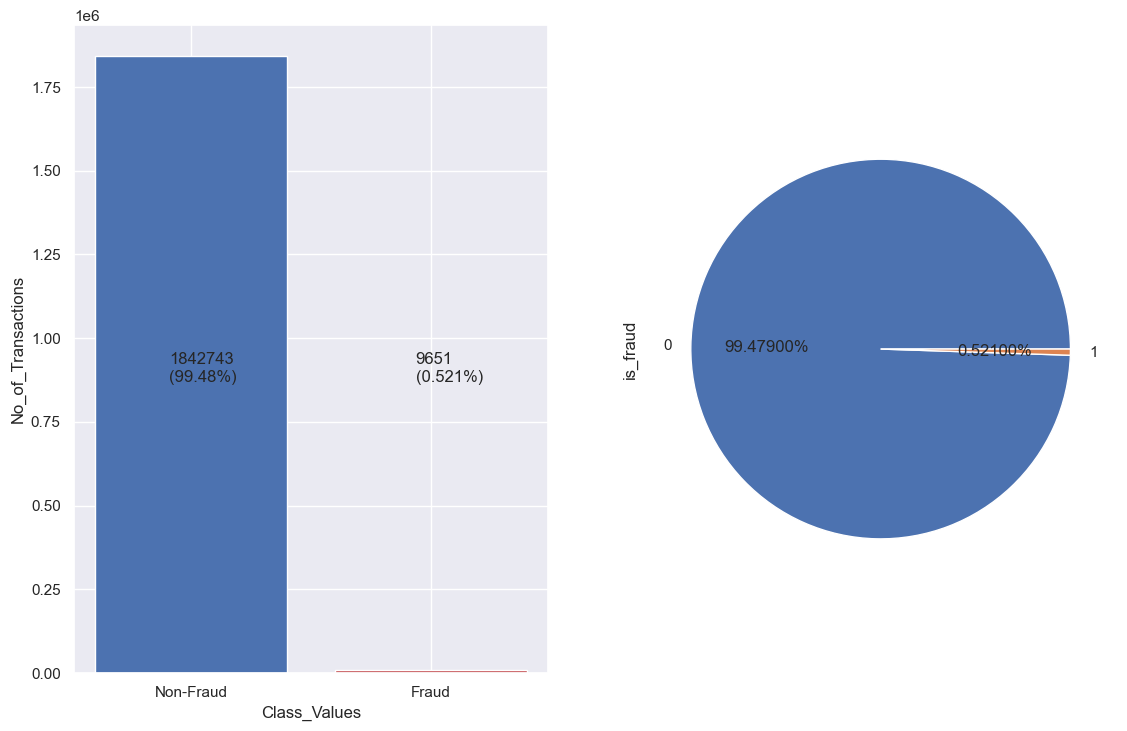

In [32]:
fig = plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.bar(['Non-Fraud','Fraud'], fraud_dataset['is_fraud'].value_counts(), color=['b','r'])
plt.xlabel('Class_Values')
plt.ylabel('No_of_Transactions')
plt.annotate( '{}\n({:.4}%)'.format(fraud_dataset['is_fraud'].value_counts()[0],
                                     fraud_dataset['is_fraud'].value_counts()[0]/fraud_dataset['is_fraud'].count()*100),
                                (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}\n({:.4}%)'.format(fraud_dataset['is_fraud'].value_counts()[1],
                                  fraud_dataset['is_fraud'].value_counts()[1]/fraud_dataset['is_fraud'].count()*100),
                                 (0.72, 0.45),xycoords='axes fraction')

plt.subplot(1,2,2)
fraud_dataset['is_fraud'].value_counts().plot.pie(autopct="%1.5f%%")
plt.show()



The dataset contains a total of 18,52,394 transactions, out of which only 9,651 are fraudulent transactions.
The dataset is highly imbalanced, with the positive class (frauds) accounting for only 0.52% of the total transactions.
Since the data set is highly imbalanced, we need to handle it before model building.

The feature 'amt' represents the transaction amount. 
The feature 'is_fraud' represents class labelling and takes the value 1, if the transaction is a fraudulent transaction and 0, otherwise.


4.3.4 Checking the Skewness of variables

In [33]:
# Checking the Skewness of following variables 'job', 'city', 'category', 'state'

df2 = fraud_dataset[['job', 'city', 'category', 'state']]

for i in df2.columns:
    print('**********************************')
    print("--------------%s--------------" %i)
    print(df2[i].value_counts(normalize=True))

**********************************
--------------job--------------
Film/video editor             0.007503
Exhibition designer           0.007108
Surveyor, land/geomatics      0.006713
Naval architect               0.006712
Materials engineer            0.006322
                                ...   
Veterinary surgeon            0.000004
Engineer, water               0.000004
Contracting civil engineer    0.000004
Ship broker                   0.000004
Warehouse manager             0.000004
Name: job, Length: 497, dtype: float64
**********************************
--------------city--------------
Birmingham     0.004340
San Antonio    0.003947
Utica          0.003946
Phoenix        0.003939
Meridian       0.003935
                 ...   
Chattanooga    0.000004
Karns City     0.000004
Vacaville      0.000004
Streator       0.000004
Wever          0.000003
Name: city, Length: 906, dtype: float64
**********************************
--------------category--------------
gas_transport     0.1


4.3.5 Binning of job column

In [34]:
fraud_dataset['job'].describe()

count               1852394
unique                  497
top       Film/video editor
freq                  13898
Name: job, dtype: object

Job column has only 497 unique values. Hence binning the other values

In [35]:
pd.set_option("display.max_rows", None)

In [36]:
fraud_dataset['job'].value_counts(normalize=True)

Film/video editor                                              0.007503
Exhibition designer                                            0.007108
Surveyor, land/geomatics                                       0.006713
Naval architect                                                0.006712
Materials engineer                                             0.006322
Designer, ceramics/pottery                                     0.006310
Environmental consultant                                       0.005924
Financial adviser                                              0.005918
Systems developer                                              0.005918
IT trainer                                                     0.005907
Copywriter, advertising                                        0.005529
Scientist, audiological                                        0.005525
Chartered public finance accountant                            0.005512
Chief Executive Officer                                        0

In [37]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(Teacher|teacher|Lecturer|lecturer|Professor|professor)',regex=True)].value_counts()

Secondary school teacher                  8056
Early years teacher                       8041
Special educational needs teacher         7283
Teacher, special educational needs        6578
Further education lecturer                5865
English as a second language teacher      5837
Lecturer, further education               5130
Private music teacher                     5119
Lecturer, higher education                4404
Teacher, early years/pre                  3662
Teacher, secondary school                 3655
Teacher, primary school                   2194
Teacher, English as a foreign language    1469
TEFL teacher                               760
Primary school teacher                     737
English as a foreign language teacher      737
Teacher, adult education                   737
Professor Emeritus                         734
Associate Professor                        734
Name: job, dtype: int64

In [38]:
fraud_dataset['job'].replace(['Secondary school teacher','Early years teacher','Special educational needs teacher','Teacher, special educational needs',
                             'Further education lecturer','English as a second language teacher','Lecturer, further education',
                             'Private music teacher','Lecturer, higher education','Teacher, early years/pre','Teacher, secondary school',
                             'Teacher, primary school','Teacher, English as a foreign language','TEFL teacher','Primary school teacher',
                             'English as a foreign language teacher','Teacher, adult education','Professor Emeritus','Associate Professor'],'Teacher',
                            inplace=True)

In [39]:

fraud_dataset['job'][fraud_dataset['job'].str.contains('(Engineering|engineering|Engineer|engineer)',
                                                        regex=True)].value_counts()

Materials engineer                       11711
Mining engineer                           8762
Water engineer                            8740
Mechanical engineer                       8062
Engineer, automotive                      8050
Petroleum engineer                        8046
Energy engineer                           8038
Chemical engineer                         7334
Engineer, biomedical                      7330
Drilling engineer                         7321
Electrical engineer                       7301
Engineer, production                      6584
Engineer, control and instrumentation     6579
Engineering geologist                     5857
Structural engineer                       5116
Engineer, mining                          5112
Engineer, electronics                     5107
Geologist, engineering                    4392
Site engineer                             4391
Engineer, land                            4381
Electronics engineer                      4380
Manufacturing

In [40]:

fraud_dataset['job'].replace(["Materials engineer","Mining engineer","Water engineer","Engineer, land",
        "Mechanical engineer","Engineer, automotive","Petroleum engineer","Energy engineer",
        "Chemical engineer","Engineer, biomedical","Drilling engineer","Electrical engineer",
        "Engineer, production","Engineer, control and instrumentation","Engineering geologist",
        "Structural engineer","Engineer, mining","Engineer, electronics","Site engineer",
        "Geologist, engineering","Electronics engineer","Manufacturing engineer","Engineer, site",
        "Maintenance engineer","Engineer, petroleum","Communications engineer","Network engineer",
        "Civil engineer, contracting","Engineer, technical sales","Biomedical engineer",
        "Engineer, drilling","Aeronautical engineer","Production engineer","Engineer, maintenance",
        "Engineer, agricultural","Engineer, civil (contracting)","Engineer, communications",
        "Building services engineer","Control and instrumentation engineer","Engineer, structural",
        "Engineer, building services","Manufacturing systems engineer","Engineer, aeronautical",
        "Engineer, broadcasting (operations)","Engineer, manufacturing","Broadcast engineer",
        "Engineer, civil (consulting)","Engineer, materials","Software engineer","Engineer, water",
        'Contracting civil engineer'], 'Engineer', inplace=True)

In [41]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(Scientist|scientist)',
                                                                        regex=True)].value_counts()

Scientist, audiological                                        10234
Audiological scientist                                          8801
Scientist, research (maths)                                     8768
Geoscientist                                                    8041
Research scientist (physical sciences)                          7319
Scientist, marine                                               7306
Scientist, biomedical                                           5862
Biomedical scientist                                            4384
Product/process development scientist                           4374
Soil scientist                                                  3669
Scientist, physiological                                        2926
Research scientist (life sciences)                              2923
Scientist, research (physical sciences)                         2914
Physiological scientist                                         2194
Research scientist (maths)        

In [42]:
fraud_dataset['job'].replace(["Scientist, audiological","Audiological scientist","Data scientist",
            "Scientist, research (maths)","Geoscientist","Research scientist (physical sciences)",
            "Scientist, marine","Scientist, biomedical","Biomedical scientist",
            "Product/process development scientist","Soil scientist","Scientist, physiological",
            "Research scientist (life sciences)","Scientist, research (physical sciences)",
            "Physiological scientist","Research scientist (maths)","Research scientist (medical)",
            "Scientist, research (medical)","Water quality scientist",
            "Scientist, clinical (histocompatibility and immunogenetics)"],'Scientist', inplace=True)

In [43]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(Officer|officer)',regex=True)].value_counts()

Chief Executive Officer                                  10199
Historic buildings inspector/conservation officer         8787
Prison officer                                            8054
Trading standards officer                                 6611
Race relations officer                                    6583
Chief Strategy Officer                                    6577
Probation officer                                         5856
Exhibitions officer, museum/gallery                       5841
Research officer, trade union                             5134
Research officer, political party                         5123
Fisheries officer                                         5121
Education officer, museum                                 4404
Chief Operating Officer                                   4388
Careers information officer                               4387
Regulatory affairs officer                                4386
Human resources officer                                

In [44]:
fraud_dataset['job'].replace(['Chief Executive Officer','Armed forces technical officer',
            'Personnel officer','Information officer','Local government officer',"Police officer",
            'Public relations officer','Education officer, community',"Tourism officer",
            'Field trials officer','Charity officer','Nature conservation officer',
            'Environmental education officer',"Environmental education officer",
            "Museum education officer","Medical technical officer","Chief Operating Officer",
           'Race relations officer','Prison officer','Chief Strategy Officer',"Immigration officer", 
            'Probation officer','Exhibitions officer, museum/gallery','Fisheries officer',     
            'Research officer, trade union ','Research officer, political party',   
            "Historic buildings inspector/conservation officer","Trading standards officer",
            "Careers information officer","Regulatory affairs officer","Human resources officer",
            "Armed forces training and education officer","Chief Technology Officer",
            "Chief Financial Officer","Equality and diversity officer","Waste management officer",
            "Chief Marketing Officer","Museum/gallery exhibitions officer",
            "Sports development officer","Arts development officer","Community education officer",
     "Emergency planning/management officer","Armed forces logistics/support/administrative officer",
           "Conservation officer, historic buildings","Training and development officer",
            "Social research officer, government",'Education officer, museum'],
                          'Officer', inplace=True)

In [45]:
fraud_dataset['job'].value_counts(normalize=True)

Engineer                                            0.107049
Officer                                             0.082633
Scientist                                           0.047388
Teacher                                             0.038724
Film/video editor                                   0.007503
Exhibition designer                                 0.007108
Surveyor, land/geomatics                            0.006713
Naval architect                                     0.006712
Designer, ceramics/pottery                          0.006310
Environmental consultant                            0.005924
Financial adviser                                   0.005918
Systems developer                                   0.005918
IT trainer                                          0.005907
Copywriter, advertising                             0.005529
Chartered public finance accountant                 0.005512
Podiatrist                                          0.005142
Comptroller             

In [46]:

fraud_dataset['job'][fraud_dataset['job'].str.contains('(Surveyor|surveyor)',regex=True)].value_counts()

Surveyor, land/geomatics             12436
Building surveyor                     8786
Quantity surveyor                     8080
Land/geomatics surveyor               8052
Surveyor, minerals                    6589
Insurance risk surveyor               5133
Commercial/residential surveyor       4382
Building control surveyor             3670
Surveyor, rural practice              3643
Planning and development surveyor     2192
Surveyor, mining                      2191
Rural practice surveyor               2190
Hydrographic surveyor                 1469
Minerals surveyor                      740
Surveyor, hydrographic                 735
Name: job, dtype: int64

In [47]:
fraud_dataset['job'].replace(["Surveyor, land/geomatics","Building surveyor","Quantity surveyor",
            "Land/geomatics surveyor","Surveyor, minerals","Insurance risk surveyor",
            "Commercial/residential surveyor","Building control surveyor","Surveyor, rural practice",
            "Planning and development surveyor","Surveyor, mining","Rural practice surveyor",
            "Hydrographic surveyor","Minerals surveyor","Surveyor, hydrographic"],
                          'Surveyor', inplace=True)


In [48]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(Designer|designer)',regex=True)].value_counts()

Exhibition designer              13167
Designer, ceramics/pottery       11688
Ceramics designer                 6569
Designer, industrial/product      5856
Designer, jewellery               4391
Designer, exhibition/display      4378
Designer, furniture               4372
Web designer                      3662
Product designer                  3661
Glass blower/designer             2940
Furniture designer                2934
Industrial/product designer       2920
Set designer                      2208
Designer, interior/spatial        2198
Jewellery designer                1479
Designer, multimedia              1473
Designer, textile                 1468
Interior and spatial designer      740
Designer, television/film set      740
Textile designer                   735
Name: job, dtype: int64

In [49]:
fraud_dataset['job'].replace(["Exhibition designer","Designer, ceramics/pottery","Ceramics designer",
            "Designer, industrial/product","Designer, jewellery","Designer, exhibition/display",
            "Designer, furniture","Web designer","Product designer","Glass blower/designer",
            "Furniture designer","Industrial/product designer","Set designer","Designer, textile",
            "Designer, interior/spatial","Jewellery designer","Designer, multimedia",
            "Designer, television/film set","Interior and spatial designer","Textile designer"],
                          'Designer', inplace=True)

In [50]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(manager|Manager)',regex=True)].value_counts()

Facilities manager                      5846
Travel agency manager                   5128
Call centre manager                     5122
Heritage manager                        5119
Production manager                      4397
Energy manager                          4392
Television floor manager                4385
Leisure centre manager                  4382
Tourist information centre manager      4375
Fitness centre manager                  3672
Health service manager                  3656
Information systems manager             2933
Farm manager                            2931
Theme park manager                      2930
Public house manager                    2916
Pension scheme manager                  2916
Records manager                         2199
Logistics and distribution manager      2195
Location manager                        2193
Quarry manager                          2192
Theatre manager                         2187
Art gallery manager                     1470
Retail man

In [51]:
fraud_dataset['job'].replace(["Facilities manager","Travel agency manager","Call centre manager",
            "Heritage manager","Production manager","Energy manager","Television floor manager",
            "Leisure centre manager","Tourist information centre manager","Farm manager",
            "Fitness centre manager","Health service manager","Information systems manager",
            "Theme park manager","Pension scheme manager","Public house manager","Quarry manager",
            "Records manager","Logistics and distribution manager","Location manager",
            "Theatre manager","Retail manager","Art gallery manager","Stage manager","Tour manager",
            "Outdoor activities/education manager","Product manager","Hotel manager",
            "Restaurant manager, fast food","Purchasing manager","Catering manager",
            "Environmental manager","Estate manager/land agent","Forest/woodland manager",
                           "Warehouse manager"],'Manager', inplace=True)

In [52]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(psychologist|Psychologist)',regex=True)].value_counts()

Psychologist, forensic              8044
Counselling psychologist            6590
Educational psychologist            6588
Occupational psychologist           5848
Forensic psychologist               5127
Psychologist, counselling           5121
Sport and exercise psychologist     2941
Psychologist, sport and exercise    2936
Psychologist, clinical              2200
Clinical psychologist               1461
Name: job, dtype: int64

In [53]:
fraud_dataset['job'].replace(["Psychologist, forensic","Counselling psychologist",
            "Educational psychologist","Occupational psychologist","Forensic psychologist",
            "Psychologist, counselling","Sport and exercise psychologist",
            "Psychologist, sport and exercise","Psychologist, clinical","Clinical psychologist"],
                          'Psychologist', inplace=True)

In [54]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(editor|Editor)',regex=True)].value_counts()

Film/video editor            13898
Magazine features editor      9506
Editor, commissioning         5117
Video editor                  4386
Editor, film/video            2928
Editor, magazine features     2921
Commissioning editor          2202
Name: job, dtype: int64

In [55]:
fraud_dataset['job'].replace(["Film/video editor","Magazine features editor","Editor, commissioning",
                    "Video editor","Editor, film/video","Editor, magazine features",
                    "Commissioning editor"],'Editor', inplace=True)

In [56]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(Producer|producer)',regex=True)].value_counts()

Radio producer                     6579
Television/film/video producer     5871
Producer, radio                    4394
Producer, television/film/video     736
Name: job, dtype: int64

In [57]:
fraud_dataset['job'].replace(['Radio producer','Television/film/video producer',
                'Producer, television/film/video','Producer, radio'],'Producer', inplace=True)

In [58]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(therapist|Therapist)',regex=True)].value_counts()

Psychotherapist, child            8036
Therapist, occupational           6594
Physiotherapist                   6566
Child psychotherapist             5839
Phytotherapist                    4389
Therapist, horticultural          3676
Therapist, art                    3650
Therapist, sports                 3647
Music therapist                   3643
Horticultural therapist           2941
Nutritional therapist             2934
Art therapist                     2926
Dance movement psychotherapist    2922
Psychotherapist                   2921
Therapist, drama                  2913
Therapist, music                  2203
Occupational therapist             738
Name: job, dtype: int64

In [59]:
fraud_dataset['job'].replace(['Psychotherapist, child','Therapist, occupational','Physiotherapist','Child psychotherapist',
                            'Phytotherapist','Therapist, horticultural','Therapist, art','Therapist, sports','Music therapist','Horticultural therapist',
                            'Nutritional therapist','Art therapist','Dance movement psychotherapist','Psychotherapist',
                            'Therapist, drama','Therapist, music','Occupational therapist'],'Therapist',inplace=True)

In [60]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(nurse|Nurse)',regex=True,)].value_counts()

Learning disability nurse    5122
Nurse, children's            3684
Paediatric nurse             3663
Mental health nurse          3662
Psychiatric nurse            2201
Nurse, mental health         1461
Name: job, dtype: int64

In [61]:
fraud_dataset['job'].replace(["Learning disability nurse","Nurse, children's","Paediatric nurse",
                    "Mental health nurse","Psychiatric nurse","Nurse, mental health"],
                          'Nurse', inplace=True)

In [62]:
fraud_dataset['job'].value_counts(normalize=True)

Engineer                                            0.107049
Officer                                             0.082633
Manager                                             0.047814
Scientist                                           0.047388
Designer                                            0.041880
Teacher                                             0.038724
Surveyor                                            0.037944
Therapist                                           0.035920
Psychologist                                        0.025295
Editor                                              0.022111
Nurse                                               0.010685
Producer                                            0.009490
Naval architect                                     0.006712
Environmental consultant                            0.005924
Financial adviser                                   0.005918
Systems developer                                   0.005918
IT trainer              

In [63]:

fraud_dataset['job'][fraud_dataset['job'].str.contains('(executive|Executive)',regex=True)].value_counts()

Public relations account executive               5841
Advertising account executive                    2213
Sales executive                                  2206
Chartered legal executive (England and Wales)    1464
Marketing executive                               736
Sales promotion account executive                  14
Name: job, dtype: int64

In [64]:
fraud_dataset['job'].replace(["Public relations account executive","Advertising account executive",
                    "Sales executive","Chartered legal executive (England and Wales)",
                    "Marketing executive","Sales promotion account executive"],
                          'Executive', inplace=True)

In [65]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(assistant|Assistant)',regex=True)].value_counts()

Television production assistant     7297
Radio broadcast assistant           6582
Politician's assistant              2944
Production assistant, radio         1466
Production assistant, television     738
Name: job, dtype: int64

In [66]:
fraud_dataset['job'].replace(["Television production assistant","Radio broadcast assistant",
                    "Politician's assistant","Production assistant, radio",
                    "Production assistant, television"], 'Assistant', inplace=True)

In [67]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(librarian|Librarian)',regex=True)].value_counts()

Librarian, public      8773
Librarian, academic    7307
Public librarian       2196
Academic librarian     1467
Name: job, dtype: int64

In [68]:
fraud_dataset['job'].replace(["Librarian, public","Librarian, academic","Public librarian",
                           "Academic librarian"], 'Librarian', inplace=True)

In [69]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(conservator|Conservator)',regex=True)].value_counts()

Museum/gallery conservator        2940
Furniture conservator/restorer    1462
Conservator, museum/gallery        743
Conservator, furniture             735
Name: job, dtype: int64

In [70]:
fraud_dataset['job'].replace(["Museum/gallery conservator","Furniture conservator/restorer",
                "Conservator, museum/gallery","Conservator, furniture"], 'Conservator', inplace=True)

In [71]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(researcher|Researcher)',regex=True)].value_counts()

Social researcher                                6580
Programme researcher, broadcasting/film/video    5832
Market researcher                                3658
Operational researcher                           3657
Telecommunications researcher                    2922
Name: job, dtype: int64

In [72]:
fraud_dataset['job'].replace(["Social researcher","Programme researcher, broadcasting/film/video",
                    "Market researcher","Operational researcher","Telecommunications researcher"],
                          'Researcher', inplace=True)

In [73]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(consultant|Consultant)',regex=True)].value_counts()

Environmental consultant     10974
Agricultural consultant       9500
Pensions consultant           8036
Public affairs consultant     2935
Management consultant         2195
IT consultant                 1462
Horticultural consultant       746
Name: job, dtype: int64

In [74]:
fraud_dataset['job'].replace(["Environmental consultant","Agricultural consultant","IT consultant",
                    "Pensions consultant","Public affairs consultant","Management consultant",
                    "Horticultural consultant"], 'Consultant', inplace=True)

In [75]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(banker|Banker)',regex=True)].value_counts()

Investment banker, corporate      2930
Corporate investment banker       2917
Retail banker                     2916
Investment banker, operational     733
Operational investment banker       11
Name: job, dtype: int64

In [76]:
fraud_dataset['job'].replace(["Investment banker, corporate","Corporate investment banker",
                "Retail banker","Investment banker, operational","Operational investment banker"], 
                'Banker', inplace=True)

In [77]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(chemist|Chemist)',regex=True)].value_counts()

Geochemist              3677
Clinical biochemist     2929
Biochemist, clinical    1472
Chemist, analytical     1463
Analytical chemist       735
Name: job, dtype: int64

In [78]:
fraud_dataset['job'].replace(["Geochemist","Clinical biochemist","Biochemist, clinical",
                    "Chemist, analytical","Analytical chemist"], 'Chemist', inplace=True)

In [79]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(Accountant|accountant)',regex=True)].value_counts()

Chartered public finance accountant     10211
Accountant, chartered public finance     3657
Chartered accountant                     2204
Accountant, chartered certified           751
Accountant, chartered                      11
Name: job, dtype: int64

In [80]:
fraud_dataset['job'].replace(["Chartered public finance accountant","Chartered accountant",
                    "Accountant, chartered public finance","Accountant, chartered certified",
                    "Accountant, chartered"], 'Chartered Accountant', inplace=True)

In [81]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(administrator|Administrator)',regex=True)].value_counts()

Administrator                                       5115
Administrator, local government                     3677
Administrator, education                            3672
Administrator, charities/voluntary organisations    3662
Database administrator                              3657
Secretary/administrator                             2931
Education administrator                             1467
Sports administrator                                1467
Civil Service administrator                          739
Administrator, arts                                  736
Name: job, dtype: int64

In [82]:
fraud_dataset['job'].replace(["Administrator","Administrator, local government",
                "Administrator, education","Administrator, charities/voluntary organisations",
                "Database administrator","Secretary/administrator","Sports administrator",
                "Education administrator","Civil Service administrator","Administrator, arts"], 
                          'Administrator', inplace=True)

In [83]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(Writer|writer)',regex=True)].value_counts()

Copywriter, advertising    10241
Science writer              7332
Insurance underwriter       7301
Advertising copywriter      1466
Writer                       741
Name: job, dtype: int64

In [84]:
fraud_dataset['job'].replace(["Copywriter, advertising","Science writer","Insurance underwriter",
                    "Advertising copywriter","Writer"], 'Writer', inplace=True)

In [85]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(Doctor|doctor|Surgeon|surgeon)',regex=True)].value_counts()

Surgeon                     5852
Hospital doctor             5127
Tree surgeon                4403
Doctor, general practice    3649
Doctor, hospital            3648
General practice doctor     2934
Neurosurgeon                2934
Veterinary surgeon             8
Name: job, dtype: int64

In [86]:
fraud_dataset['job'].replace(["Surgeon","Hospital doctor","Doctor, general practice","Doctor, hospital",
                "Tree surgeon","Neurosurgeon","Veterinary surgeon","General practice doctor"], 
                          'Doctor', inplace=True)

In [87]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(buyer|Buyer)',regex=True)].value_counts()

Buyer, industrial    5857
Media buyer          3651
Retail buyer         2928
Buyer, retail         734
Industrial buyer       10
Name: job, dtype: int64

In [88]:
fraud_dataset['job'].replace(["Buyer, industrial","Media buyer","Retail buyer","Buyer, retail","Industrial buyer"], 
                                                                                  'Buyer', inplace=True)

In [89]:
fraud_dataset['job'].value_counts(normalize=True)

Engineer                                 0.107049
Officer                                  0.082633
Manager                                  0.047814
Scientist                                0.047388
Designer                                 0.041880
Teacher                                  0.038724
Surveyor                                 0.037944
Therapist                                0.035920
Psychologist                             0.025295
Editor                                   0.022111
Consultant                               0.019352
Doctor                                   0.015415
Administrator                            0.014642
Writer                                   0.014619
Researcher                               0.012227
Nurse                                    0.010685
Librarian                                0.010658
Assistant                                0.010272
Producer                                 0.009490
Chartered Accountant                     0.009088


In [90]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(Geneticist|geneticist)',regex=True)].value_counts()

Cytogeneticist              7297
Plant breeder/geneticist    1466
Geneticist, molecular        745
Clinical cytogeneticist      744
Name: job, dtype: int64

In [91]:
fraud_dataset['job'].replace(["Cytogeneticist","Plant breeder/geneticist","Geneticist, molecular",
                        "Clinical cytogeneticist"], 'Geneticist', inplace=True)

In [92]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(pharmacist|Pharmacist)',regex=True)].value_counts()

Pharmacist, community    2924
Community pharmacist     2205
Pharmacist, hospital     1483
Hospital pharmacist      1470
Name: job, dtype: int64

In [93]:
fraud_dataset['job'].replace(["Pharmacist, community","Community pharmacist","Pharmacist, hospital",
                           "Hospital pharmacist"], 'Pharmacist', inplace=True)

In [94]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(physicist|Physicist)',regex=True)].value_counts()

Physicist, medical                 5110
Health physicist                   4374
Medical physicist                  2196
Geophysicist/field seismologist    2188
Name: job, dtype: int64

In [95]:
fraud_dataset['job'].replace(["Physicist, medical","Health physicist","Medical physicist",
                           "Geophysicist/field seismologist"], 'Physicist', inplace=True)

In [96]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(analyst|Analyst)',regex=True)].value_counts()

Systems analyst         5132
Risk analyst            3665
Investment analyst      3654
Intelligence analyst    3641
Name: job, dtype: int64

In [97]:
fraud_dataset['job'].replace(["Systems analyst","Risk analyst","Investment analyst","Intelligence analyst"], 
                                                                          'Analyst', inplace=True)

In [98]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(technologist|Technologist)',regex=True)].value_counts()

Clothing/textile technologist    8765
Colour technologist              5146
Animal technologist              2919
Garment/textile technologist     2193
Architectural technologist       1466
Name: job, dtype: int64

In [99]:
fraud_dataset['job'].replace(["Clothing/textile technologist","Colour technologist","Animal technologist",
                "Garment/textile technologist","Architectural technologist"], 'Technologist', inplace=True)

In [100]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(technician|Technician)',regex=True)].value_counts()

Accounting technician               6595
Scientific laboratory technician    2932
Teaching laboratory technician      2197
Name: job, dtype: int64

In [101]:
fraud_dataset['job'].replace(["Accounting technician","Scientific laboratory technician",
                           "Teaching laboratory technician"], 'Technician', inplace=True)

In [102]:
fraud_dataset['job'][fraud_dataset['job'].str.contains('(horticulturist|Horticulturist)',regex=True)].value_counts()

Amenity horticulturist        5111
Commercial horticulturist     4399
Horticulturist, commercial    2925
Name: job, dtype: int64

In [103]:
fraud_dataset['job'].replace(['Amenity horticulturist','Commercial horticulturist','Horticulturist, commercial'], 
                                                                      'Horticulturist', inplace=True)

fraud_dataset['job'].replace(['Retail merchandiser','Merchandiser, retail','Visual merchandiser'], 
                                                                      'Merchandiser', inplace=True)

fraud_dataset['job'].replace(['Cabin crew','Air cabin crew'],'Cabin crew', inplace=True)

In [104]:
fraud_dataset['job'].value_counts(normalize=True)

Engineer                                 0.107049
Officer                                  0.082633
Manager                                  0.047814
Scientist                                0.047388
Designer                                 0.041880
Teacher                                  0.038724
Surveyor                                 0.037944
Therapist                                0.035920
Psychologist                             0.025295
Editor                                   0.022111
Consultant                               0.019352
Doctor                                   0.015415
Administrator                            0.014642
Writer                                   0.014619
Researcher                               0.012227
Technologist                             0.011061
Nurse                                    0.010685
Librarian                                0.010658
Assistant                                0.010272
Producer                                 0.009490


In [105]:
job_freqs = fraud_dataset.job.value_counts(normalize=True)

In [106]:
job_freqs.cumsum()

Engineer                                 0.107049
Officer                                  0.189682
Manager                                  0.237495
Scientist                                0.284883
Designer                                 0.326764
Teacher                                  0.365488
Surveyor                                 0.403432
Therapist                                0.439352
Psychologist                             0.464647
Editor                                   0.486758
Consultant                               0.506110
Doctor                                   0.521525
Administrator                            0.536167
Writer                                   0.550787
Researcher                               0.563014
Technologist                             0.574074
Nurse                                    0.584760
Librarian                                0.595418
Assistant                                0.605689
Producer                                 0.615180


In [107]:
#Checking the top 90% uniques values of the variable -job

In [108]:
top_jobs = job_freqs.cumsum()[:91].index
top_jobs

Index(['Engineer', 'Officer', 'Manager', 'Scientist', 'Designer', 'Teacher',
       'Surveyor', 'Therapist', 'Psychologist', 'Editor', 'Consultant',
       'Doctor', 'Administrator', 'Writer', 'Researcher', 'Technologist',
       'Nurse', 'Librarian', 'Assistant', 'Producer', 'Chartered Accountant',
       'Analyst', 'Physicist', 'Buyer', 'Executive', 'Horticulturist',
       'Naval architect', 'Technician', 'Financial adviser',
       'Systems developer', 'IT trainer', 'Chemist', 'Geneticist',
       'Podiatrist', 'Comptroller', 'Banker', 'Paramedic', 'Sub', 'Musician',
       'Barrister', 'Immunologist', 'Pharmacist', 'Financial trader',
       'Sales professional, IT', 'Counsellor', 'Claims inspector/assessor',
       'Make', 'Firefighter', 'Merchandiser', 'Medical sales representative',
       'Trade mark attorney', 'Chartered loss adjuster', 'Dealer',
       'Multimedia programmer', 'Fine artist', 'Technical brewer',
       'Toxicologist', 'Conservator', 'Senior tax professional/t

In [109]:
fraud_dataset.job.value_counts(normalize=True)

Engineer                                 0.107049
Officer                                  0.082633
Manager                                  0.047814
Scientist                                0.047388
Designer                                 0.041880
Teacher                                  0.038724
Surveyor                                 0.037944
Therapist                                0.035920
Psychologist                             0.025295
Editor                                   0.022111
Consultant                               0.019352
Doctor                                   0.015415
Administrator                            0.014642
Writer                                   0.014619
Researcher                               0.012227
Technologist                             0.011061
Nurse                                    0.010685
Librarian                                0.010658
Assistant                                0.010272
Producer                                 0.009490


In [110]:
fraud_dataset['job'].describe()

count      1852394
unique         176
top       Engineer
freq        198297
Name: job, dtype: object

Keeping the unique values as it is , as they explain 90% of the 'job' variable.
We merge teh remaining values as 'Others'

In [111]:
fraud_dataset['job'] = np.where(fraud_dataset.job.isin(top_jobs), fraud_dataset.job, 'OTHERS')

In [112]:
fraud_dataset.job.describe()

count      1852394
unique          92
top       Engineer
freq        198297
Name: job, dtype: object

Insight:
'Job' variable now has 92 unique values

In [113]:
fraud_dataset.job.value_counts(normalize=True)

Engineer                                 0.107049
OTHERS                                   0.098896
Officer                                  0.082633
Manager                                  0.047814
Scientist                                0.047388
Designer                                 0.041880
Teacher                                  0.038724
Surveyor                                 0.037944
Therapist                                0.035920
Psychologist                             0.025295
Editor                                   0.022111
Consultant                               0.019352
Doctor                                   0.015415
Administrator                            0.014642
Writer                                   0.014619
Researcher                               0.012227
Technologist                             0.011061
Nurse                                    0.010685
Librarian                                0.010658
Assistant                                0.010272


In [114]:
fraud_dataset.shape

(1852394, 22)

# analysing STATE variable

In [115]:
fraud_dataset['state'].describe()

count     1852394
unique         51
top            TX
freq       135269
Name: state, dtype: object

In [116]:
fraud_dataset['state'].value_counts()

TX    135269
NY    119419
PA    114173
CA     80495
OH     66627
MI     65825
IL     62212
FL     60775
AL     58521
MO     54904
MN     45433
AR     44611
NC     43134
VA     41756
WI     41738
SC     41731
KY     40981
IN     39539
IA     38804
OK     38050
MD     37345
GA     37340
WV     36529
NJ     35131
NE     34425
KS     32939
MS     30021
LA     29953
WY     27776
WA     27040
OR     26408
TN     24913
ME     23433
NM     23427
ND     21183
CO     19766
SD     17574
MA     17562
VT     16812
MT     16806
AZ     15362
UT     15357
NH     11727
CT     10979
NV      8058
ID      8035
DC      5130
HI      3649
AK      2963
RI       745
DE         9
Name: state, dtype: int64

4.3.6 Binning of state column

Classifying the states into five major regions

In [117]:
def label_states(row):
    if row['state'] in ['CT','ME','MA','NH','NJ','NY','PA','RI','VT']:
        return 'Northeast'
    if row['state'] in ['IL','IN','IA','KS','MI','MN','MO','NE','ND','OH','SD','WI']:
        return 'Midwest'
    if row['state'] in ['AL','AR','DE','DC','FL','GA','KY','LA','MD','MS','NC','OK','SC','TN','Tx','VA','WV']:
        return 'South'
    else:
        return 'West'

In [118]:
# transforming the state variable to bins

fraud_dataset['state_bin'] = fraud_dataset.apply(lambda x:label_states(x), axis=1)

In [119]:
fraud_dataset.head(10)

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   
5   2019-01-01 00:04:08  4767265376804500    fraud_Stroman, Hudson and Erdman   
6   2019-01-01 00:04:42    30074693890476               fraud_Rowe-Vandervort   
7   2019-01-01 00:05:08  6011360759745864                fraud_Corwin-Collins   
8   2019-01-01 00:05:18  4922710831011201                    fraud_Herzog Ltd   
9   2019-01-01 00:06:01  2720830304681674   fraud_Schoen, Kuphal and Nitzsche   

        category     amt gender                          street  \
0       misc_net    4.97      F                  561 Perry Cove   
1    grocery_pos  107.23      F    43039 Riley Greens Suite 393   
2  entertainment  220.11      M        594 White Dale Suite 530   
3  gas_transport   45.00      M     9443 Cynthia Court Apt. 038   
4       misc_pos   41.96      M                408 Bradley Rest   
5  gas_transport   94.63      F               4655 David Island   
6    grocery_net   44.54      F     889 Sarah Station Suite 624   
7  gas_transport   71.65      M       231 Flores Pass Suite 720   
8       misc_pos    4.27      F     6888 Hicks Stream Suite 954   
9    grocery_pos  198.39      F  21326 Taylor Squares Suite 708   

             city state    zip  ...              job        dob  \
0  Moravian Falls    NC  28654  ...     Psychologist 1988-03-09   
1          Orient    WA  99160  ...          Teacher 1978-06-21   
2      Malad City    ID  83252  ...          Officer 1962-01-19   
3         Boulder    MT  59632  ...           OTHERS 1967-01-12   
4        Doe Hill    VA  24433  ...        Therapist 1986-03-28   
5          Dublin    PA  18917  ...           OTHERS 1961-06-19   
6         Holcomb    KS  67851  ...  Arboriculturist 1993-08-16   
7        Edinburg    VA  22824  ...         Designer 1947-08-21   
8           Manor    PA  15665  ...       Consultant 1941-03-07   
9     Clarksville    TN  37040  ...           OTHERS 1974-03-28   

                          trans_num   unix_time  merch_lat  merch_long  \
0  0b242abb623afc578575680df30655b9  1325376018  36.011293  -82.048315   
1  1f76529f8574734946361c461b024d99  1325376044  49.159047 -118.186462   
2  a1a22d70485983eac12b5b88dad1cf95  1325376051  43.150704 -112.154481   
3  6b849c168bdad6f867558c3793159a81  1325376076  47.034331 -112.561071   
4  a41d7549acf90789359a9aa5346dcb46  1325376186  38.674999  -78.632459   
5  189a841a0a8ba03058526bcfe566aab5  1325376248  40.653382  -76.152667   
6  83ec1cc84142af6e2acf10c44949e720  1325376282  37.162705 -100.153370   
7  6d294ed2cc447d2c71c7171a3d54967c  1325376308  38.948089  -78.540296   
8  fc28024ce480f8ef21a32d64c93a29f5  1325376318  40.351813  -79.958146   
9  3b9014ea8fb80bd65de0b1463b00b00e  1325376361  37.179198  -87.485381   

   is_fraud  trans_date  trans_time  state_bin  
0         0  2019-01-01    00:00:18      South  
1         0  2019-01-01    00:00:44       West  
2         0  2019-01-01    00:00:51       West  
3         0  2019-01-01    00:01:16       West  
4         0  2019-01-01    00:03:06      South  
5         0  2019-01-01    00:04:08  Northeast  
6         0  2019-01-01    00:04:42    Midwest  
7         0  2019-01-01    00:05:08      South  
8         0  2019-01-01    00:05:18  Northeast  
9         0  2019-01-01    00:06:01      South  

[10 rows x 23 columns]

In [120]:
# analysing the variable - state_bin
fraud_dataset.state_bin.describe()

count     1852394
unique          4
top         South
freq       570799
Name: state_bin, dtype: object

Insight:
State variable now has 4 unique value

In [121]:
#checking the shape of the dataset
fraud_dataset.shape

(1852394, 23)

Insight:
Changing of dtatypes done.
Binning on state and job variables done.
the dataset now has 1852394 rows and 23 columns

5. Exploratory Data Analysis

In [122]:
#checking null values

fraud_dataset.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
trans_date               0
trans_time               0
state_bin                0
dtype: int64

INsight: there are no null values

5.1 Checking the coorelations between the variables

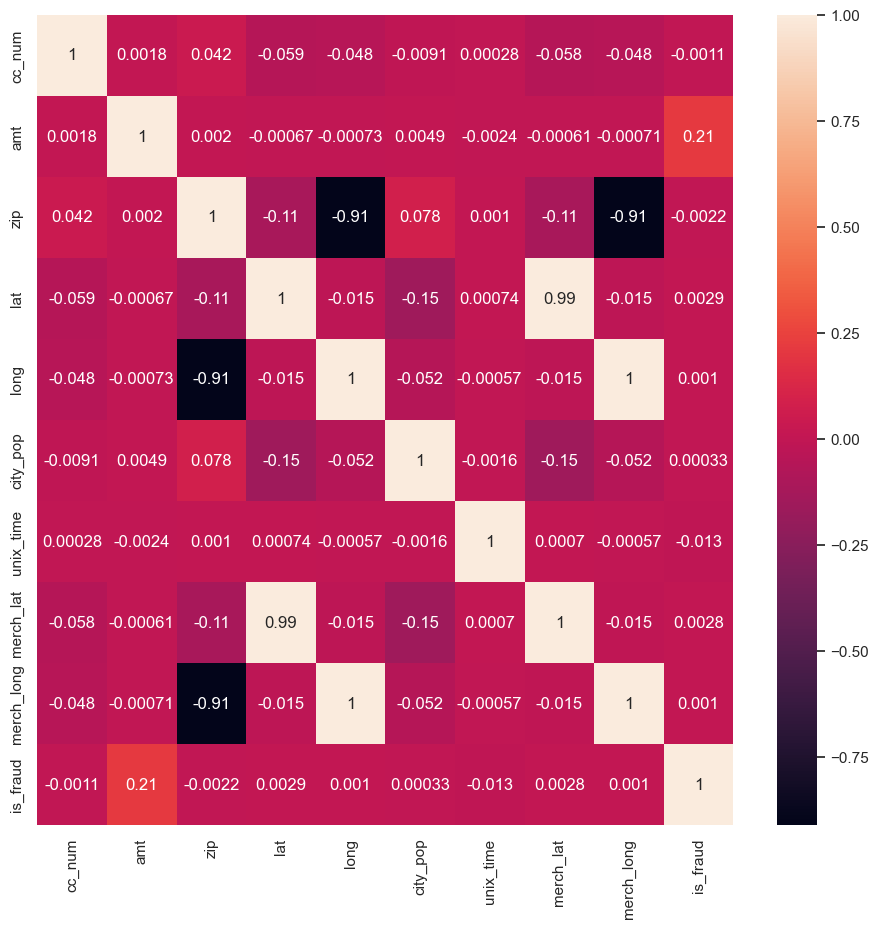

In [123]:
# Checking the coorelations between the variables
plt.figure(figsize=(10,10))
sns.heatmap(fraud_dataset.corr(), annot= True)
plt.show()

Insight:
Variables - 'amt', 'unix_time', are positively correlated with 'is_fraud'.

5.2 Univariate Analysis


5.2.1 Univariate Analysis - Numerical Variables

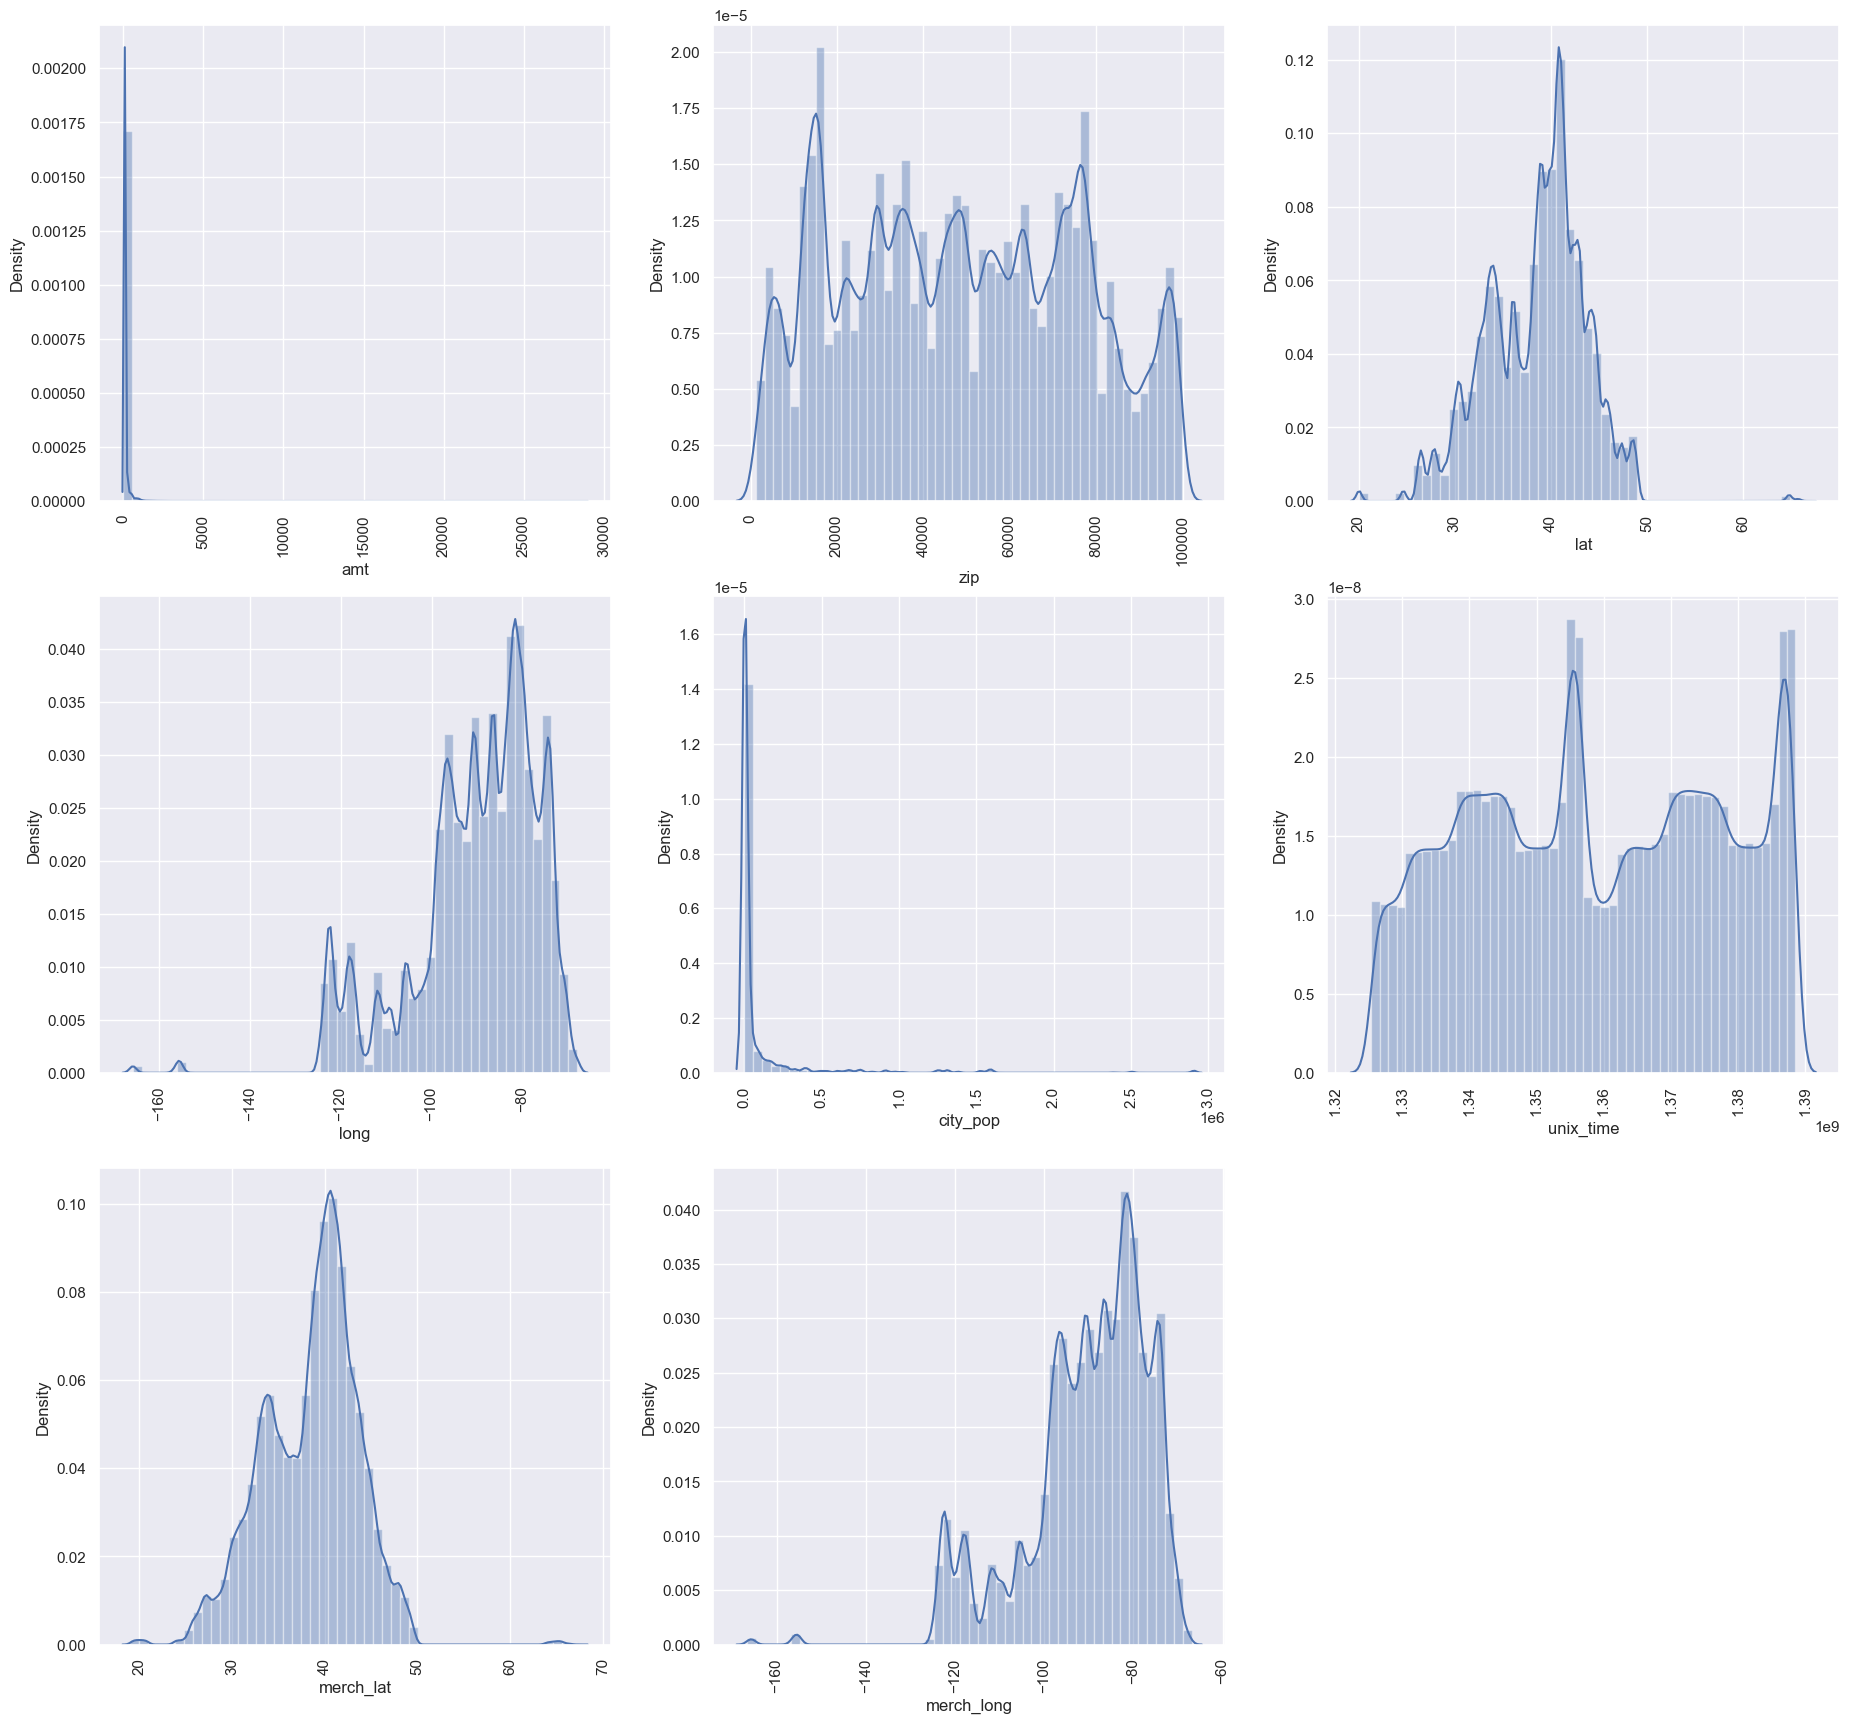

In [124]:
fig = plt.figure(figsize=[20,20])
plt.subplot(3,3,1)
sns.distplot(fraud_dataset['amt'])
plt.xticks(rotation=90)

plt.subplot(3,3,2)
sns.distplot(fraud_dataset['zip'])
plt.xticks(rotation=90)

plt.subplot(3,3,3)
sns.distplot(fraud_dataset['lat'])
plt.xticks(rotation=90)

plt.subplot(3,3,4)
sns.distplot(fraud_dataset['long'])
plt.xticks(rotation = 90)

plt.subplot(3,3,5)
sns.distplot(fraud_dataset['city_pop'])
plt.xticks(rotation = 90)

plt.subplot(3,3,6)
sns.distplot(fraud_dataset['unix_time'])
plt.xticks(rotation = 90)

plt.subplot(3,3,7)
sns.distplot(fraud_dataset['merch_lat'])
plt.xticks(rotation = 90)

plt.subplot(3,3,8)
sns.distplot(fraud_dataset['merch_long'])
plt.xticks(rotation = 90)
plt.show()

Insight:

1. The above plot shows the distribution of the variables - 'amt, zip', 'lat', 'long', 'city_pop', unix_time', 'merch_lat' and 'merch_long'
2. The variables - 'amt' and 'city_pop' are highly skewed

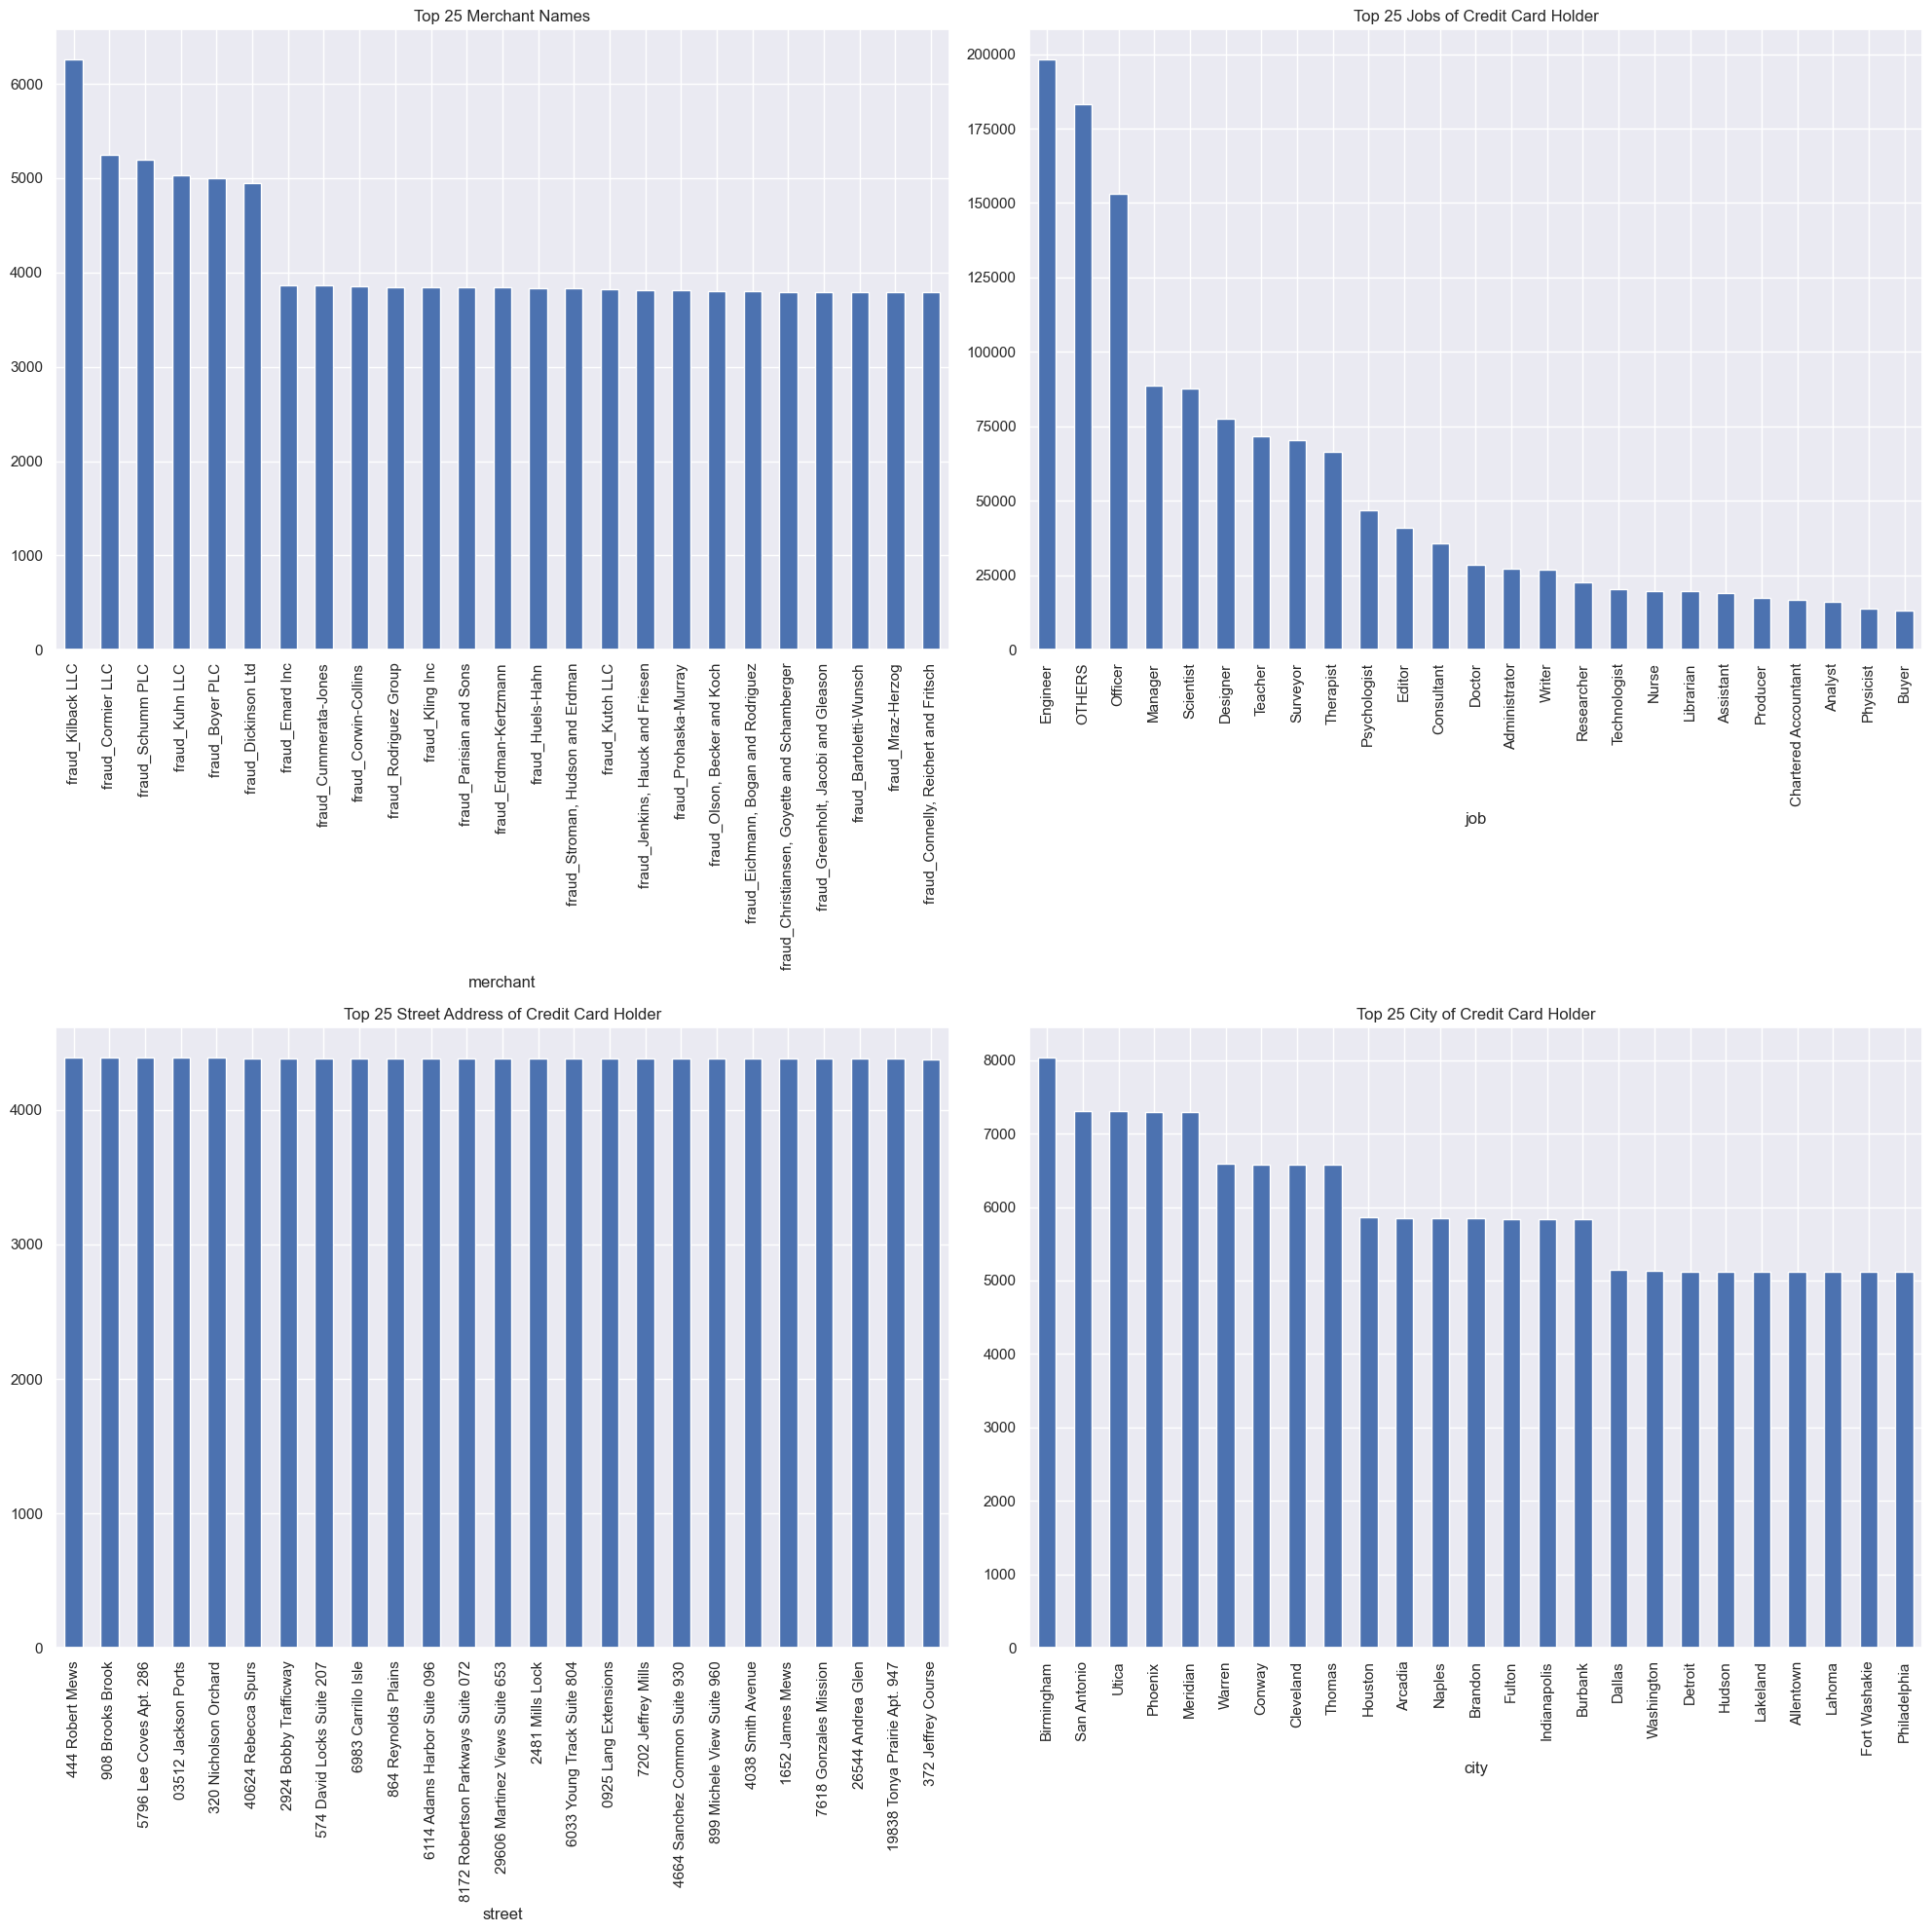

In [125]:
fig= plt.figure(figsize=(20, 20))
plt.subplot(2,2,1)
fraud_dataset['merchant'].value_counts().head(25).plot.bar()
plt.xlabel('merchant')
plt.title('Top 25 Merchant Names')
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
fraud_dataset['job'].value_counts().head(25).plot.bar()
plt.xlabel('job')
plt.title('Top 25 Jobs of Credit Card Holder')
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(2,2,3)
fraud_dataset['street'].value_counts().head(25).plot.bar()
plt.xlabel('street')
plt.title('Top 25 Street Address of Credit Card Holder')
plt.xticks(rotation = 90)

plt.subplot(2,2,4)
fraud_dataset['city'].value_counts().head(25).plot.bar()
plt.xlabel('city')
plt.title('Top 25 City of Credit Card Holder')
plt.xticks(rotation = 90)
fig.tight_layout()
plt.show()

Insight:

The above graphs show the top 25 Merchants, jobs , Street address and city of credit card holders.

5.2.2 Univariate Analysis - Categorical Variables

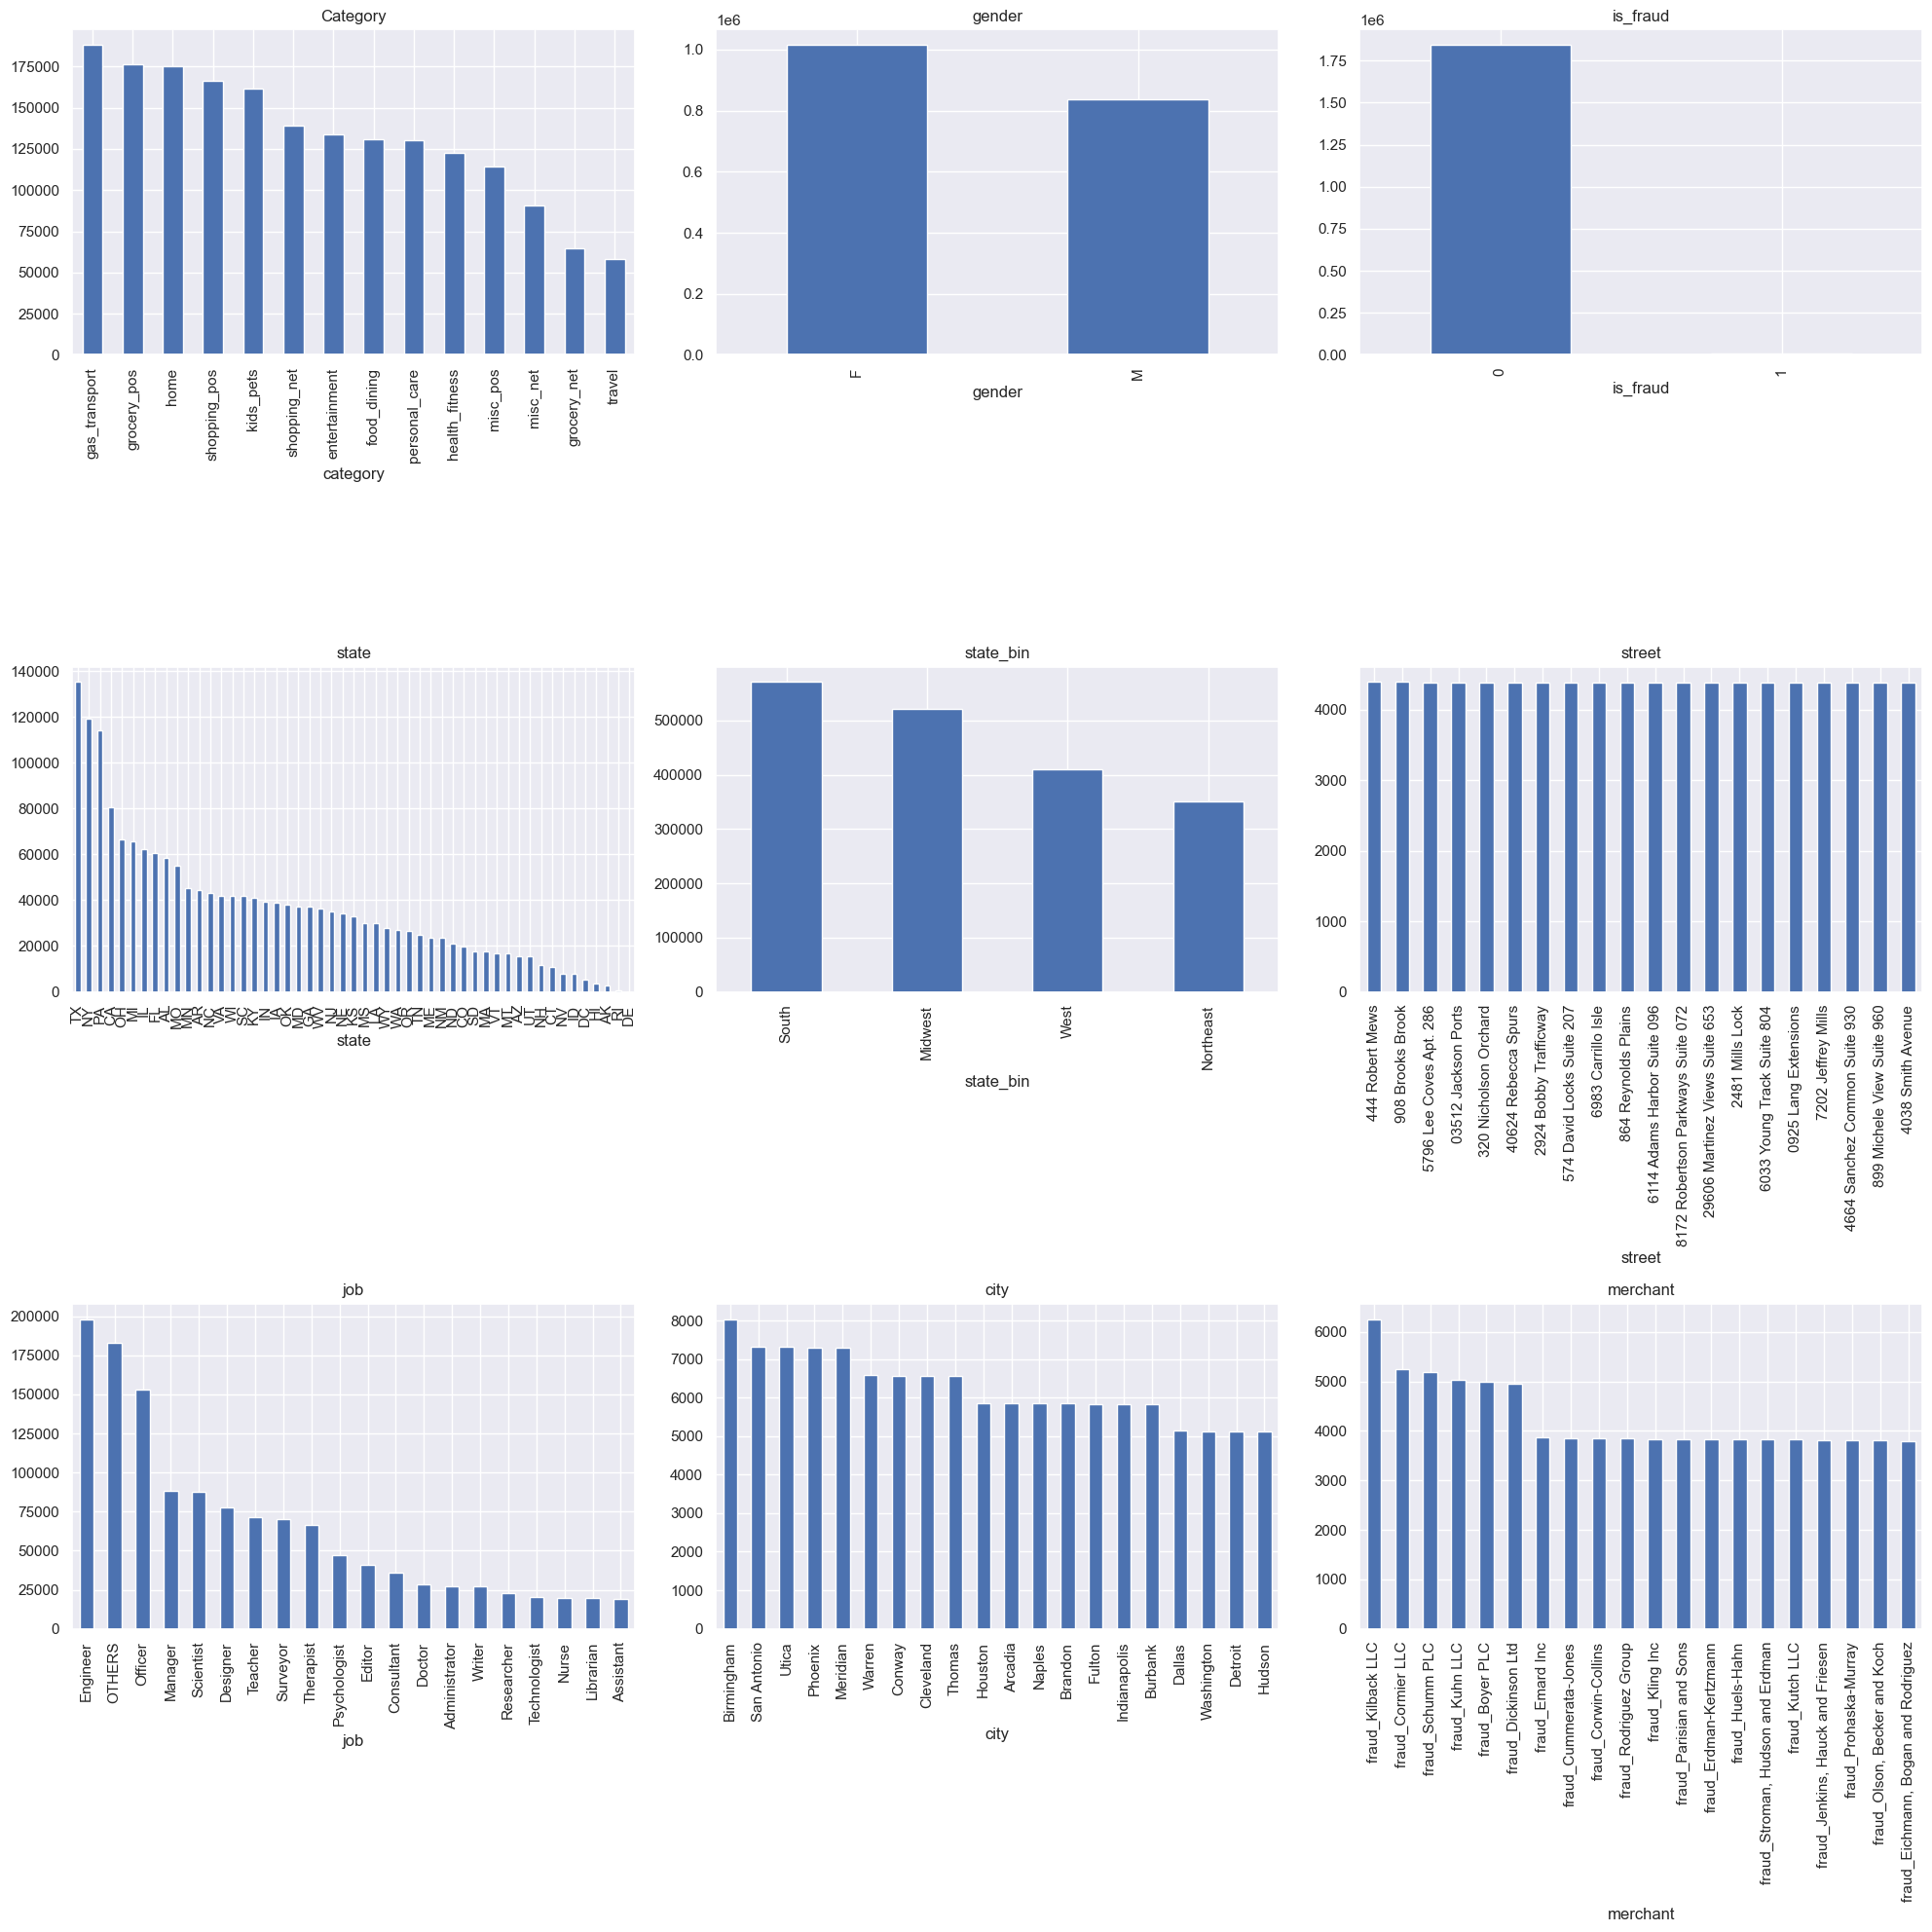

In [126]:
fig= plt.figure(figsize=(20, 20))

plt.subplot(3,3,1)
fraud_dataset['category'].value_counts().plot.bar()
plt.xlabel('category')
plt.title('Category')
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
fraud_dataset['gender'].value_counts().plot.bar()
plt.xlabel('gender')
plt.title('gender')
plt.xticks(rotation = 90)

plt.subplot(3,3,3)
fraud_dataset['is_fraud'].value_counts().plot.bar()
plt.xlabel('is_fraud')
plt.title('is_fraud')
plt.xticks(rotation = 90)


plt.subplot(3,3,4)
fraud_dataset['state'].value_counts().plot.bar()
plt.xlabel('state')
plt.title('state')
plt.xticks(rotation = 90)

plt.subplot(3,3,5)
fraud_dataset['state_bin'].value_counts().plot.bar()
plt.xlabel('state_bin')
plt.title('state_bin')
plt.xticks(rotation = 90)

plt.subplot(3,3,6)
fraud_dataset['street'].value_counts().head(20).plot.bar()
plt.xlabel('street')
plt.title('street')
plt.xticks(rotation = 90)

plt.subplot(3,3,7)
fraud_dataset['job'].value_counts().head(20).plot.bar()
plt.xlabel('job')
plt.title('job')
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(3,3,8)
fraud_dataset['city'].value_counts().head(20).plot.bar()
plt.xlabel('city')
plt.title('city')
plt.xticks(rotation = 90)

plt.subplot(3,3,9)
fraud_dataset['merchant'].value_counts().head(20).plot.bar()
plt.xlabel('merchant')
plt.title('merchant')
plt.xticks(rotation = 90)

fig.tight_layout()
plt.show()

Insight:

The above graphs depicts the counts of transactions based on categorical variables : category, is_fraud,gender, state, state_bin.
The graphs also depicts the counts of transactions in top 25 of street, job, city, merchant.


Inference: The above plot shows:
The count of transaction based on categorical varibales i.e category, is_fraud,gender, state, state_bin.


5.3 Multivariate Analysis

5.3.1 Multivariate Analysis- Numerical Variables

In [127]:
#checking numerical variables
fraud_dataset.describe()

cc_num           amt           zip           lat          long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00  1.374789e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01   
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  
mean   8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01  5.210015e-03  
std    3.014876e+05  1.819508e+07  5.105604e+00  1.375969e+01  7.199217e-02  
min    2.300000e+01  1.325376e+09  1.902742e+01 -1.666716e+02  0.000000e+00  
25%    7.410000e+02  1.343017e+09  3.474012e+01 -9.689944e+01  0.000000e+00  
50%    2.443000e+03  1.357089e+09  3.936890e+01 -8.744069e+01  0.000000e+00  
75%    2.032800e+04  1.374581e+09  4.195626e+01 -8.024511e+01  0.000000e+00  
max    2.906700e+06  1.388534e+09  6.751027e+01 -6.695090e+01  1.000000e+00

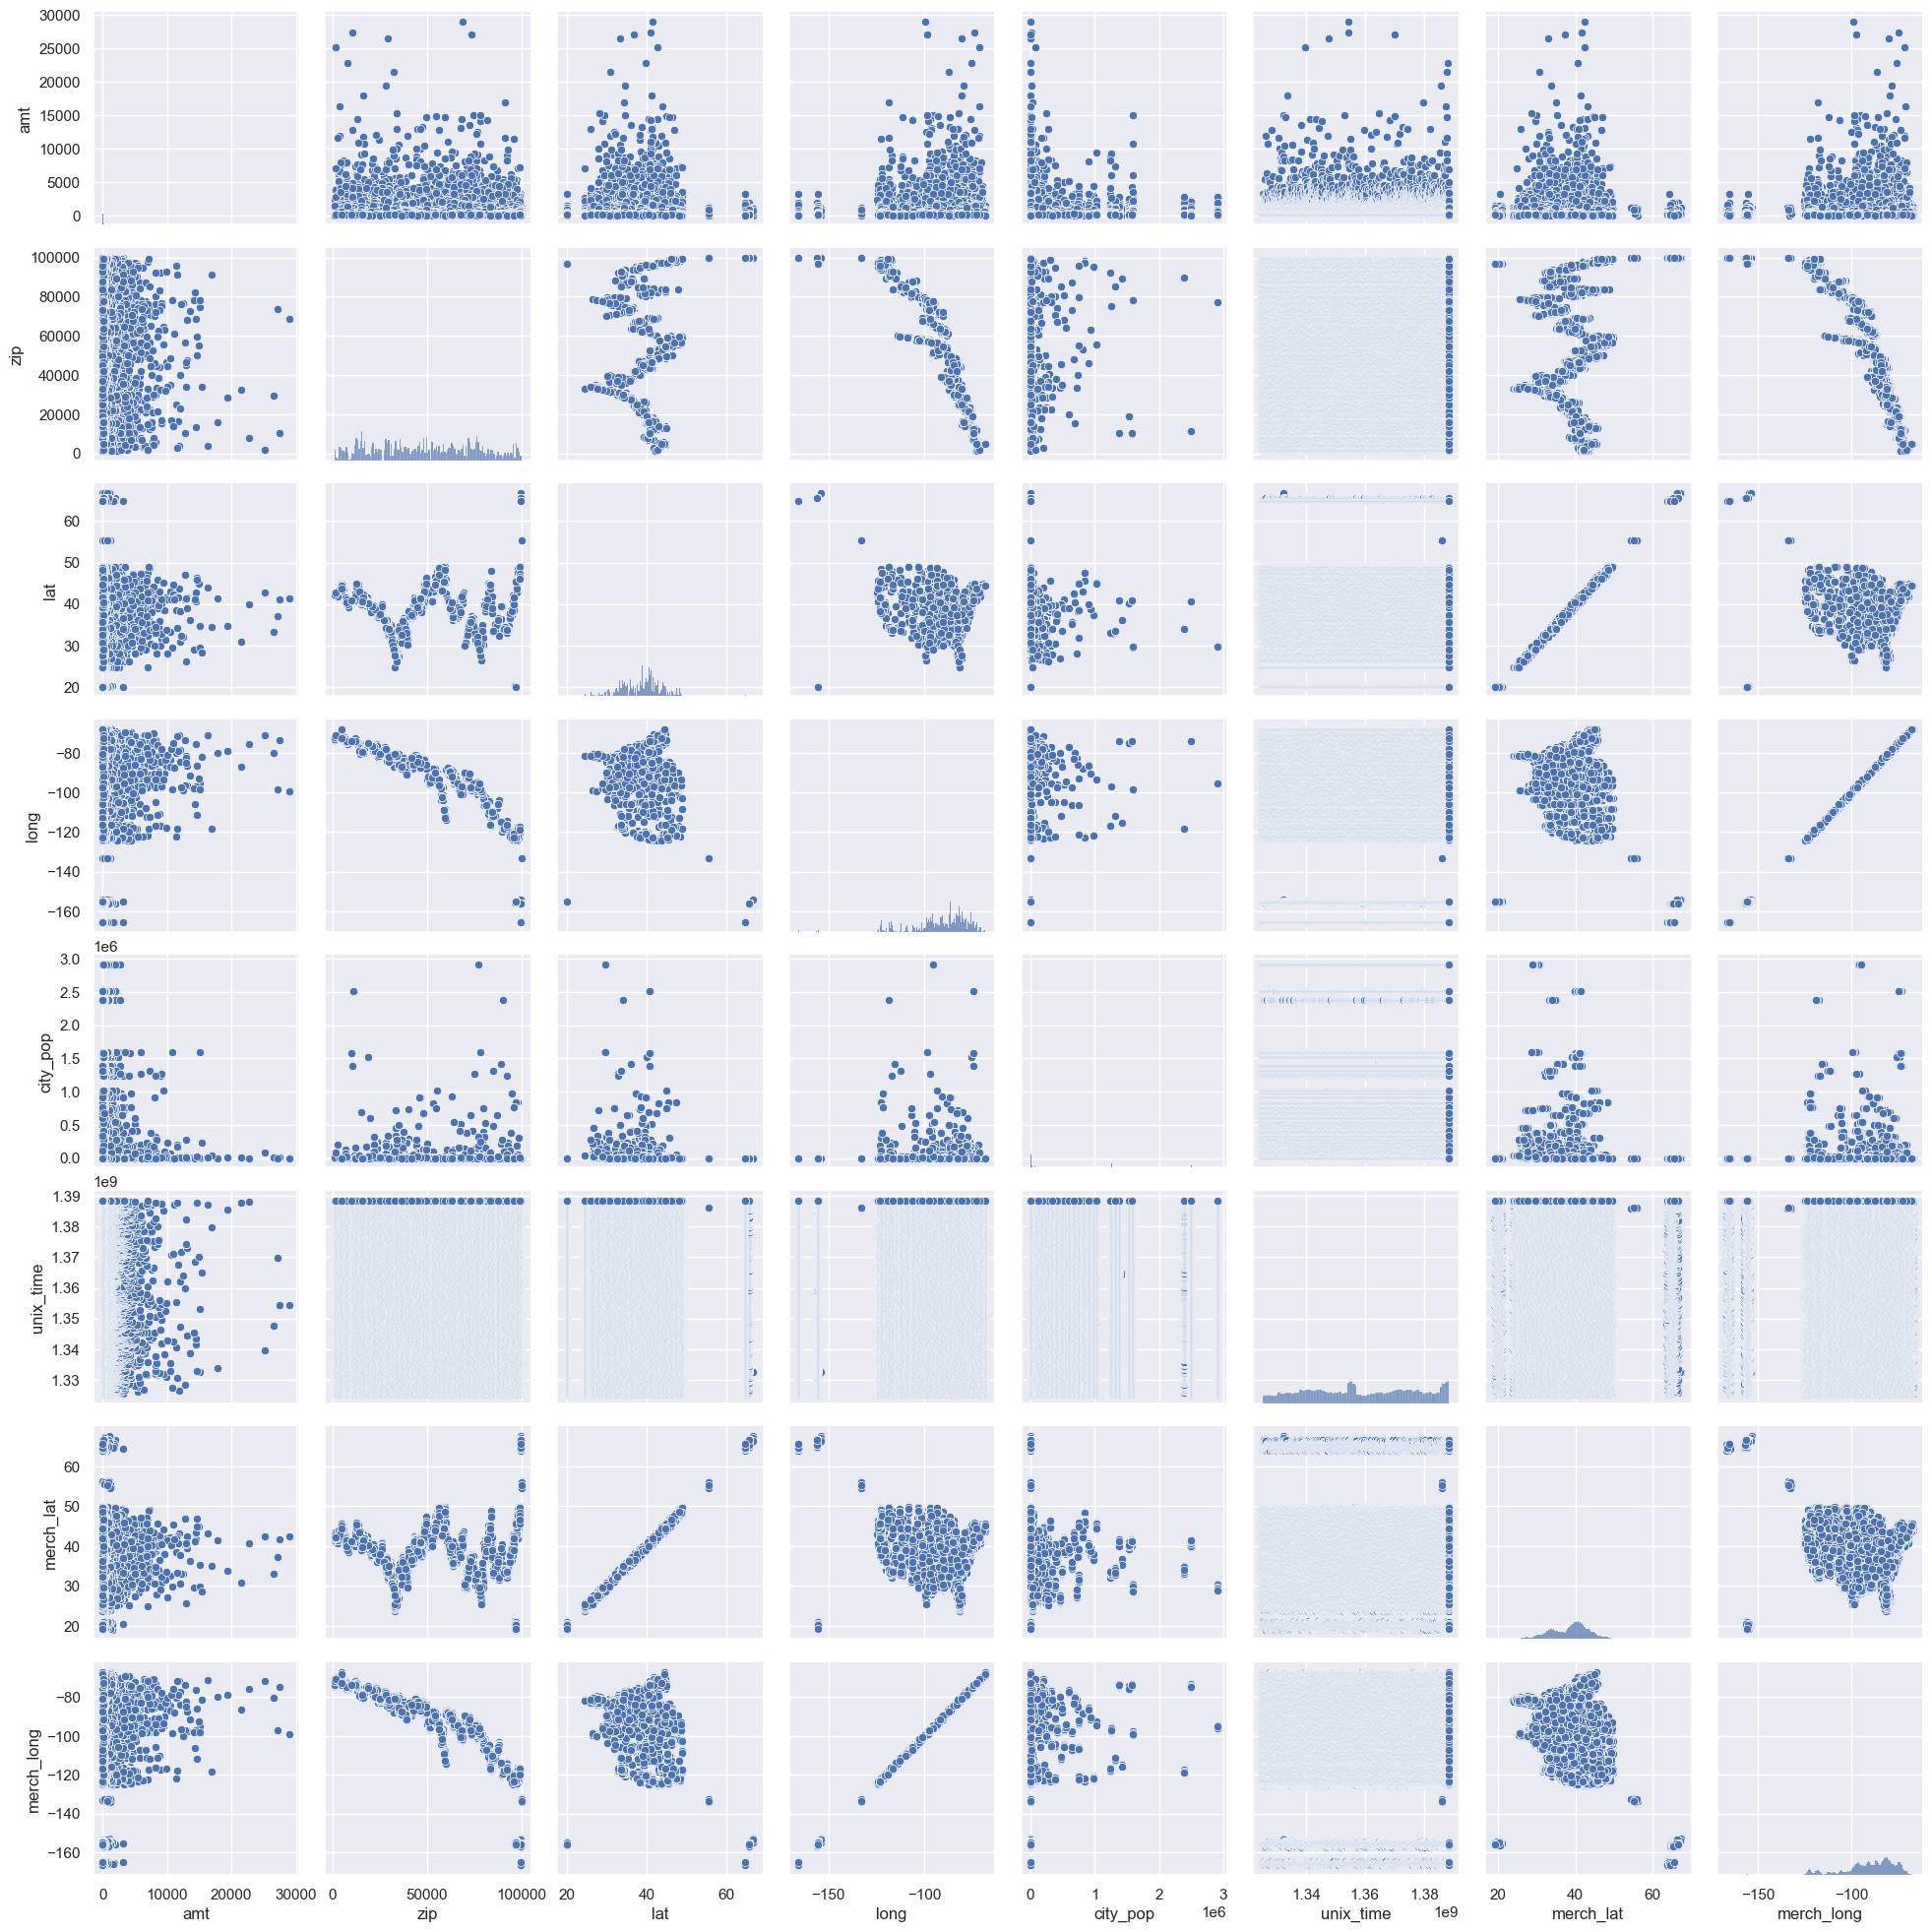

In [128]:
# making a pairplot of all the numeric variables
num_var=fraud_dataset[['amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']]
sns.pairplot(num_var)
plt.show()


Insight:
The above pairplot of numeric variables shows relation between each other.


5.3.2 Multivariate Analysis- Categorical Variables

In [129]:
#checking the columns for identifying categorical columns
fraud_dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   trans_date_trans_time  datetime64[ns]
 1   cc_num                 int64         
 2   merchant               object        
 3   category               object        
 4   amt                    float64       
 5   gender                 object        
 6   street                 object        
 7   city                   object        
 8   state                  object        
 9   zip                    int64         
 10  lat                    float64       
 11  long                   float64       
 12  city_pop               int64         
 13  job                    object        
 14  dob                    datetime64[ns]
 15  trans_num              object        
 16  unix_time              int64         
 17  merch_lat              float64       
 18  merch_long             

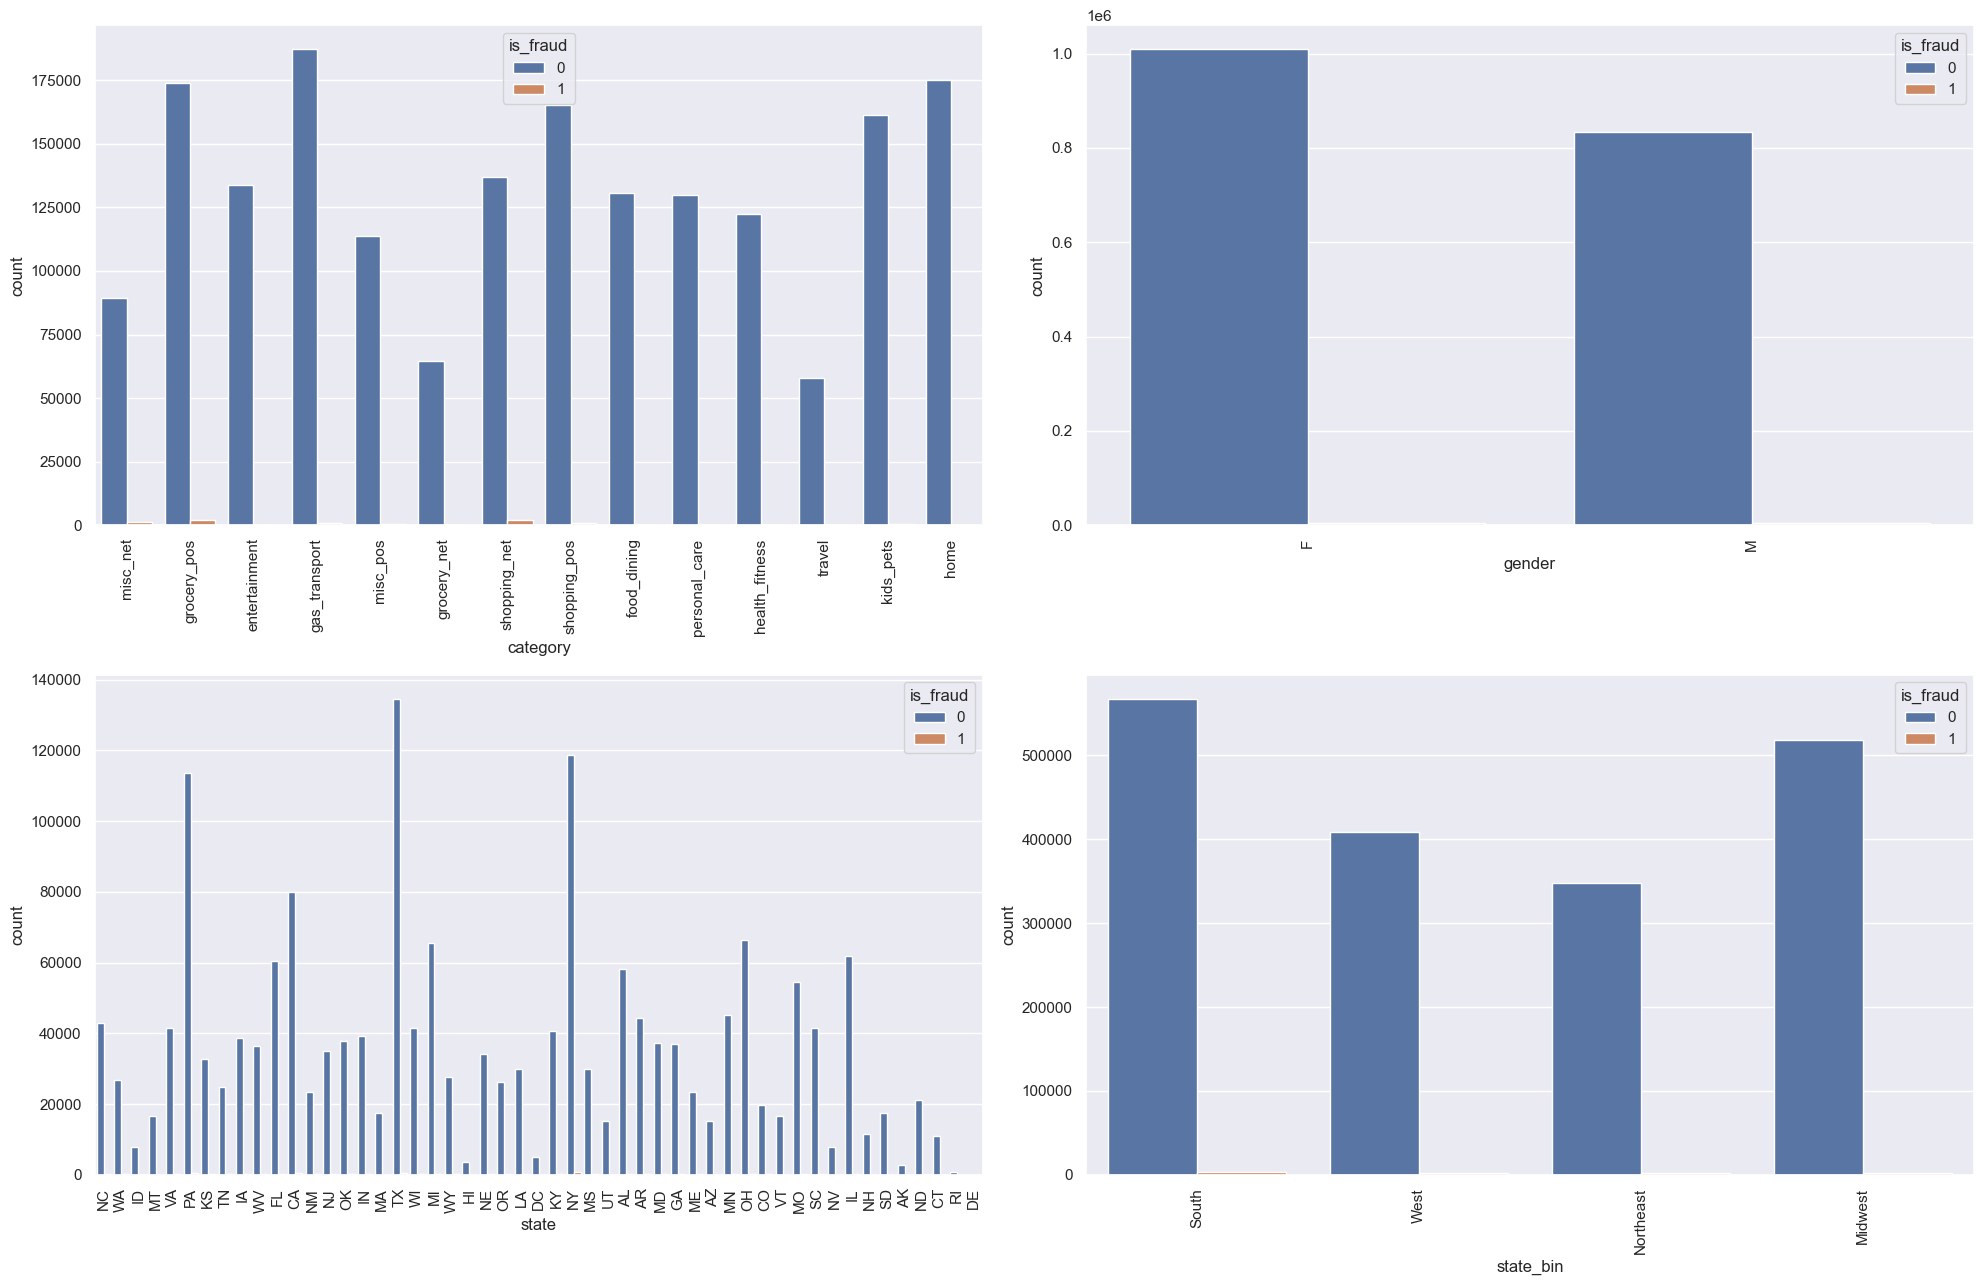

In [130]:
#plotting the categorical columns

fig= plt.figure(figsize=(20, 25))
plt.subplot(4,2,1)
sns.countplot(x = "category", hue = "is_fraud", data = fraud_dataset)
plt.xticks(rotation = 90)

plt.subplot(4,2,2)
sns.countplot(x = "gender", hue = "is_fraud", data = fraud_dataset)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(4,2,3)
sns.countplot(x = "state", hue = "is_fraud", data = fraud_dataset)
plt.xticks(rotation = 90)


plt.subplot(4,2,4)
sns.countplot(x = "state_bin", hue = "is_fraud", data = fraud_dataset)
plt.xticks(rotation = 90)
fig.tight_layout()

fig.tight_layout()
plt.show()

Insight:

The above plot shows comparison between the target varibale `is_fraud` and the categorical variables i.e category, gender, state, state_bin, street, city , job and merchant.

5.3.3 Visualising Numerical - Categorical Variables

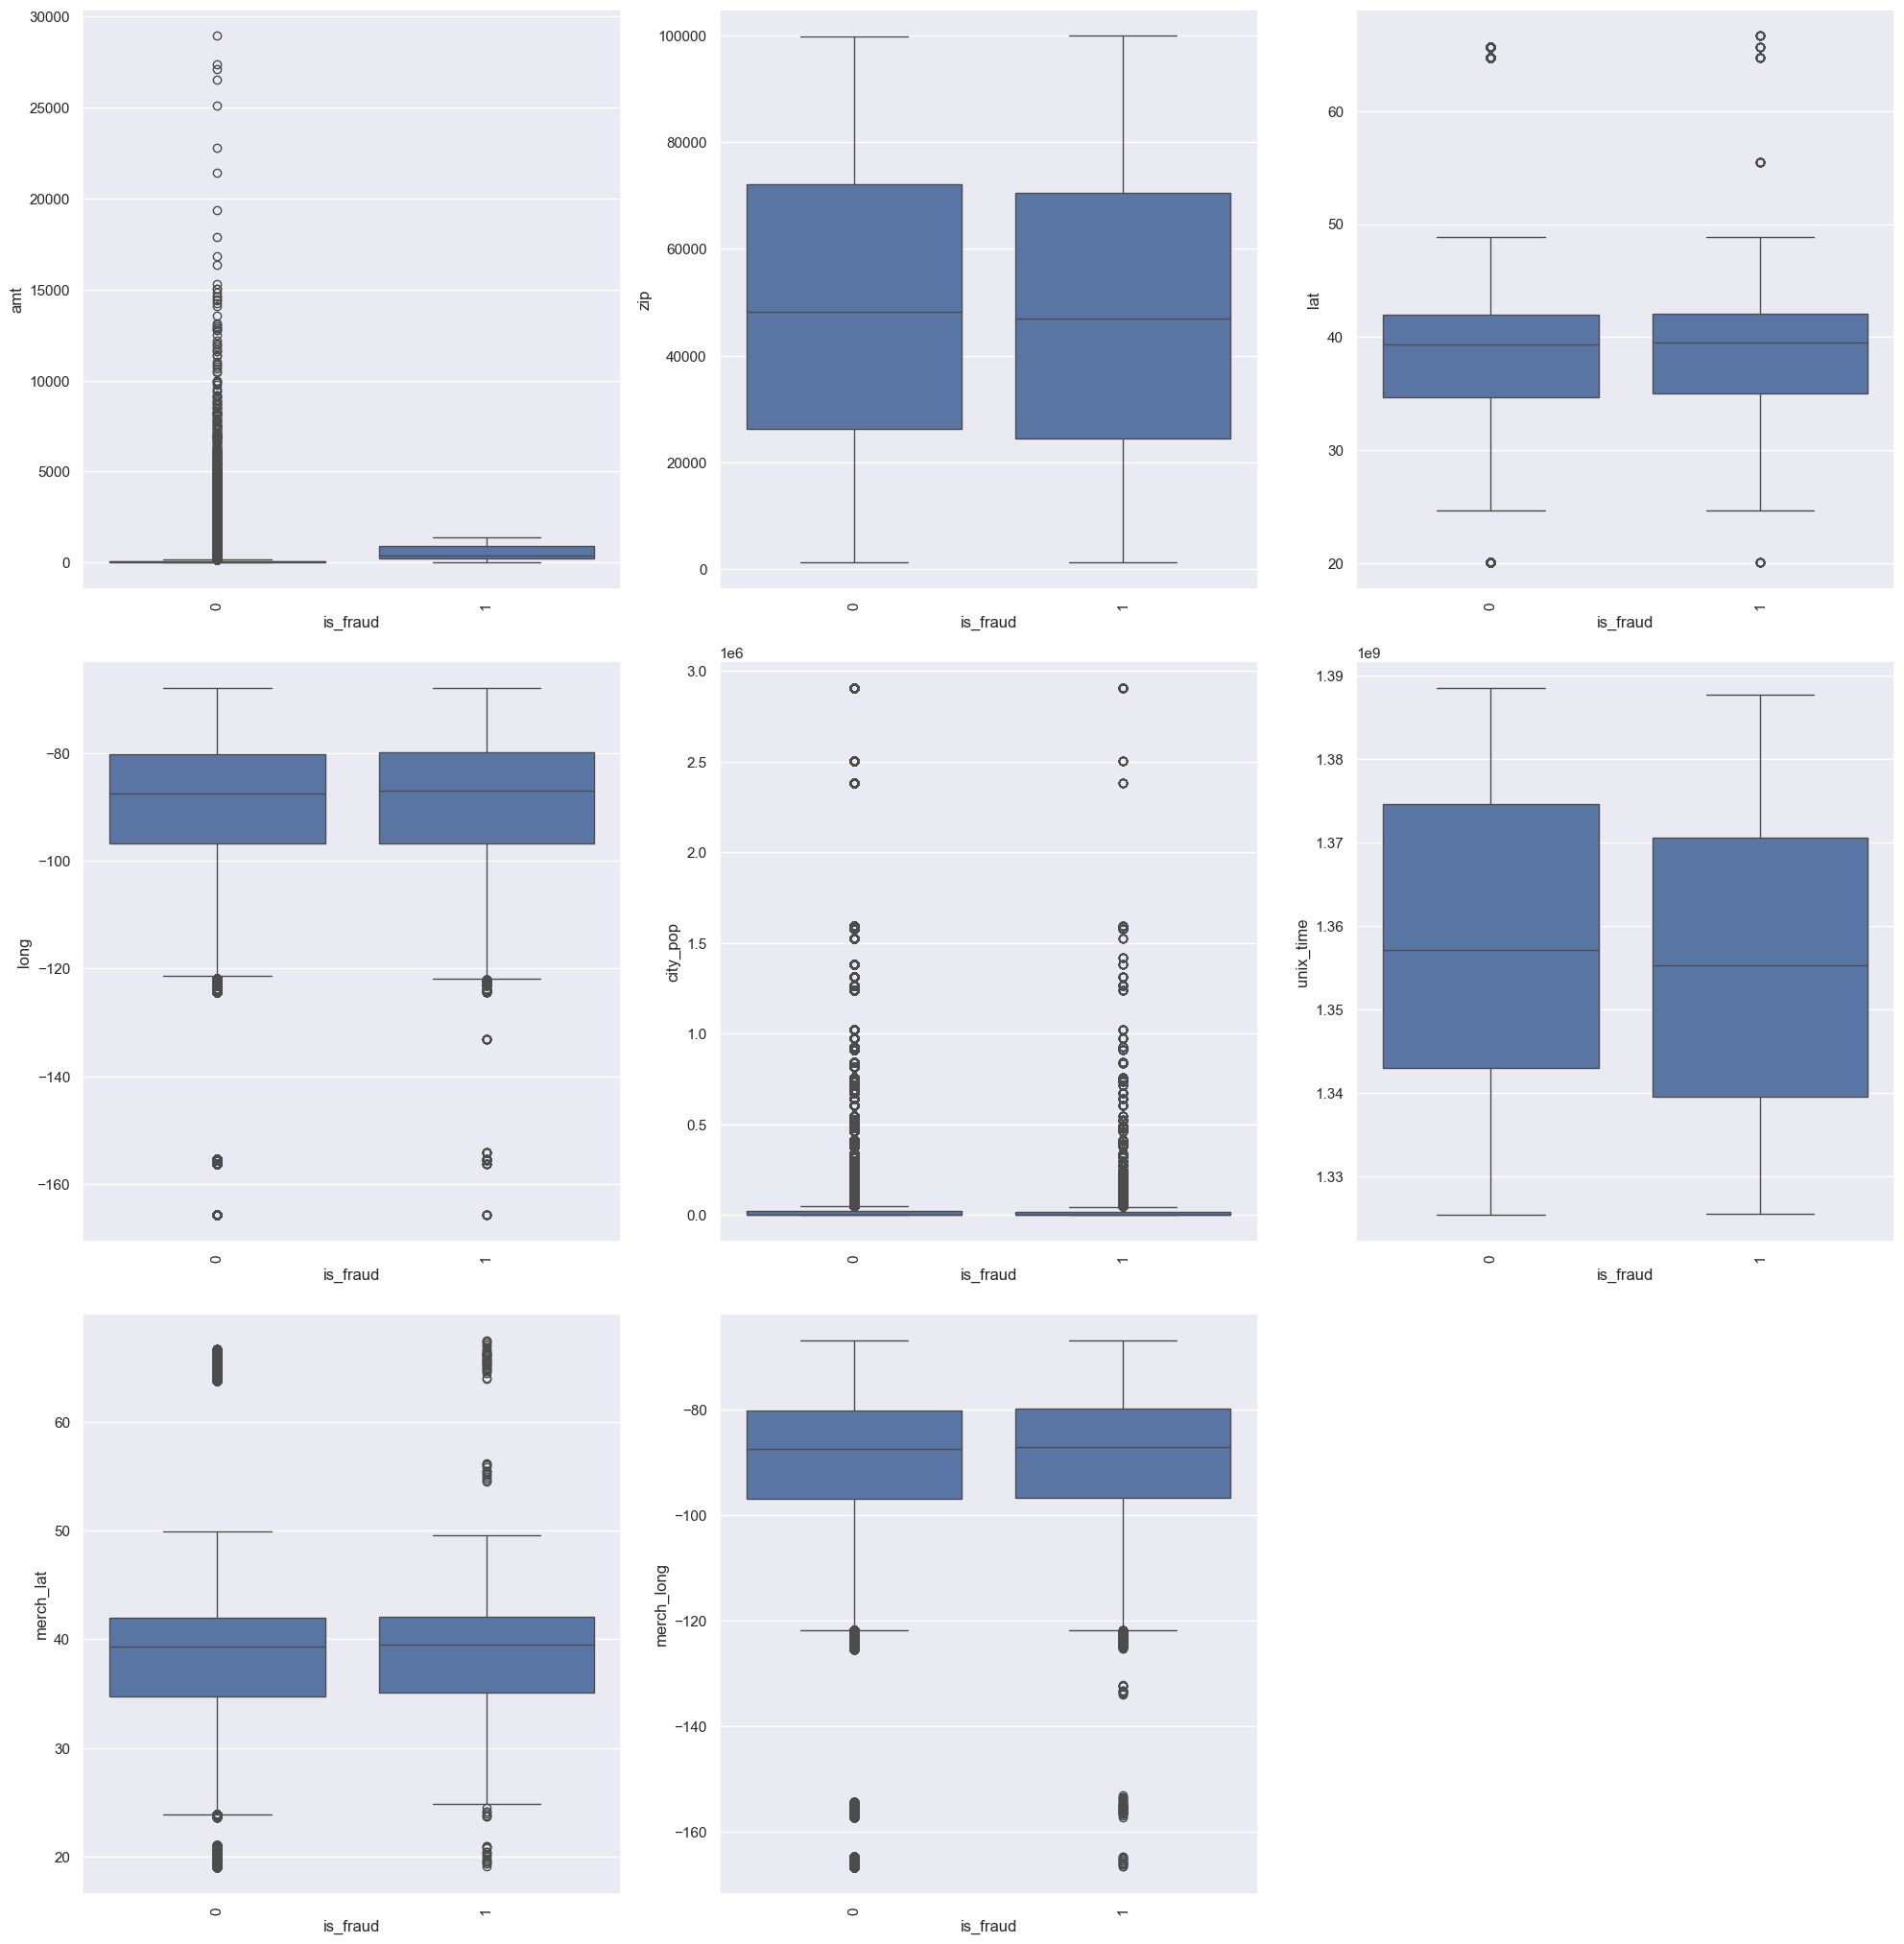

In [131]:
#plotting numerical-categorical variables
fig= plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
sns.boxplot(y = "amt", x = "is_fraud", data = fraud_dataset)
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.boxplot(y = "zip", x = "is_fraud", data = fraud_dataset)
plt.xticks(rotation = 90)

plt.subplot(3,3,3)
sns.boxplot(y = "lat", x = "is_fraud", data = fraud_dataset)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(3,3,4)
sns.boxplot(y = "long", x = "is_fraud", data = fraud_dataset)
plt.xticks(rotation = 90)

plt.subplot(3,3,5)
sns.boxplot(y = "city_pop", x = "is_fraud", data = fraud_dataset)
plt.xticks(rotation = 90)

plt.subplot(3,3,6)
sns.boxplot(y = "unix_time", x = "is_fraud", data = fraud_dataset)
plt.xticks(rotation = 90)
fig.tight_layout()

plt.subplot(3,3,7)
sns.boxplot(y = "merch_lat", x = "is_fraud", data = fraud_dataset)
plt.xticks(rotation = 90)

plt.subplot(3,3,8)
sns.boxplot(y = "merch_long", x = "is_fraud", data = fraud_dataset)
plt.xticks(rotation = 90)
plt.show()

Insight:
1. The above plot shows the boxplots between the target varibale `is_fraud` and the numerical variables 
    i.e amt, zip, lat, long, city_pop, unix_time, merchat_lat, merchant_long,
2. As per the data visualisation, only a small amount of money has been reported fraudalent.


6. Data Preparation

6.1 Feature Engineering


We would derive the following Variables:

1. 'age'- on transaction day from "dob" variable and binning of age variable

2. 'trans_Year', 'trans_year_month', 'trans_Month', 'trans_Hour', 'trans_Day', 'trans_weekday of transaction'- from trans_date_trans_time variable

3. 'dis' - i.e distance between credit card lat, long to merchant lat and long

4. ''prev_merch_lat','prev_merch_long'- i.e Previous longitude/latitude of merchant and time_since_prev_transaction i.e time since previous transaction in hours

5. distance_between_merchants by calculating distance between current and previous purchase location

6. The following Historical variables are also created:
   hist_trans_30d, hist_trans_24h, hist_trans_avg_amt_30d, hist_trans_avg_amt_24h

In [132]:
# 1. 'age'- on transaction day from "dob" variable and binning of age variable

fraud_dataset['age'] = fraud_dataset['dob'].apply(lambda x: (pd.to_datetime('now').year - x.year))

In [133]:
fraud_dataset.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip  ...        dob                         trans_num   unix_time  \
0    NC  28654  ... 1988-03-09  0b242abb623afc578575680df30655b9  1325376018   
1    WA  99160  ... 1978-06-21  1f76529f8574734946361c461b024d99  1325376044   
2    ID  83252  ... 1962-01-19  a1a22d70485983eac12b5b88dad1cf95  1325376051   
3    MT  59632  ... 1967-01-12  6b849c168bdad6f867558c3793159a81  1325376076   
4    VA  24433  ... 1986-03-28  a41d7549acf90789359a9aa5346dcb46  1325376186   

   merch_lat  merch_long is_fraud  trans_date  trans_time  state_bin  age  
0  36.011293  -82.048315        0  2019-01-01    00:00:18      South   36  
1  49.159047 -118.186462        0  2019-01-01    00:00:44       West   46  
2  43.150704 -112.154481        0  2019-01-01    00:00:51       West   62  
3  47.034331 -112.561071        0  2019-01-01    00:01:16       West   57  
4  38.674999  -78.632459        0  2019-01-01    00:03:06      South   38  

[5 rows x 24 columns]

In [134]:
# 2. Deriving 'trans_Year', 'trans_year_month', 'trans_Month', 'trans_Hour', 'trans_Day', 'trans_weekday of transaction'- from trans_date_trans_time variable

fraud_dataset['trans_Year'] = fraud_dataset.trans_date.dt.year
fraud_dataset['trans_year_month'] = fraud_dataset.trans_date.dt.to_period('M')
fraud_dataset['trans_Month']=fraud_dataset.trans_date.dt.month
fraud_dataset['trans_Hour']=fraud_dataset.trans_date_trans_time.dt.hour
fraud_dataset['trans_Day']=fraud_dataset.trans_date.dt.day
fraud_dataset['trans_weekday']= fraud_dataset.trans_date.dt.day_name()


In [135]:
#checking the dataset after modifying

fraud_dataset.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip  ...  trans_date  trans_time  state_bin age trans_Year  \
0    NC  28654  ...  2019-01-01    00:00:18      South  36       2019   
1    WA  99160  ...  2019-01-01    00:00:44       West  46       2019   
2    ID  83252  ...  2019-01-01    00:00:51       West  62       2019   
3    MT  59632  ...  2019-01-01    00:01:16       West  57       2019   
4    VA  24433  ...  2019-01-01    00:03:06      South  38       2019   

  trans_year_month  trans_Month  trans_Hour  trans_Day  trans_weekday  
0          2019-01            1           0          1        Tuesday  
1          2019-01            1           0          1        Tuesday  
2          2019-01            1           0          1        Tuesday  
3          2019-01            1           0          1        Tuesday  
4          2019-01            1           0          1        Tuesday  

[5 rows x 30 columns]

3. Deriving dis i.e. distance between credit card lat, long to merchant lat and long

In [136]:
#deriving function to calculate the distance

from math import radians, cos, sin, asin, sqrt 

def haversine_distance(lat, long, merch_lat, merch_long): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    long = np.radians(long) 
    merch_long = np.radians(merch_long) 
    lat = np.radians(lat) 
    merch_lat = np.radians(merch_lat) 
       
    # Haversine formula  
    dlon = merch_long - long  
    dlat = merch_lat - lat
    a = np.sin(dlat / 2)**2 + np.cos(lat) * np.cos(merch_lat) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)) 
    #c = 2 * np.arctan2(a**0.5, (1-a)**0.5)
    
    # Radius of earth in kilometers.  
    r = 6371
    d=  c * r
    # calculate the result 
    return round(d,2)

In [137]:
# applying the formula to derive the column

fraud_dataset['dist']=fraud_dataset[['lat', 'long', 'merch_lat', 'merch_long']].apply(
                                        lambda x:haversine_distance(x[0], x[1], x[2], x[3]), axis=1)

In [138]:
#checking the dataset for the new column

fraud_dataset.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip  ...  trans_time  state_bin  age trans_Year trans_year_month  \
0    NC  28654  ...    00:00:18      South   36       2019          2019-01   
1    WA  99160  ...    00:00:44       West   46       2019          2019-01   
2    ID  83252  ...    00:00:51       West   62       2019          2019-01   
3    MT  59632  ...    00:01:16       West   57       2019          2019-01   
4    VA  24433  ...    00:03:06      South   38       2019          2019-01   

  trans_Month  trans_Hour  trans_Day  trans_weekday    dist  
0           1           0          1        Tuesday   78.60  
1           1           0          1        Tuesday   30.21  
2           1           0          1        Tuesday  108.21  
3           1           0          1        Tuesday   95.67  
4           1           0          1        Tuesday   77.56  

[5 rows x 31 columns]

4. Deriving 'prev_merch_lat', 'prev_merch_long' i.e Previous longitude/latitude of merchant 
and 'time_since_prev_transaction'  i.e time since previous transaction in hours

In [139]:
grp_by_cc=fraud_dataset.groupby(['cc_num'])

In [140]:
# previous longitude/latitude and time elapsed of a transaction
fraud_dataset['prev_merch_lat']= grp_by_cc['merch_lat'].transform(lambda x: x.shift(1)).fillna(fraud_dataset['merch_lat'])
fraud_dataset['prev_merch_long']=grp_by_cc['merch_long'].transform(lambda x:x.shift(1)).fillna(fraud_dataset['merch_long'])

# Time since previous transaction in hours
fraud_dataset['time_since_prev_transaction'] = grp_by_cc['trans_Hour'].transform(lambda x:round((x-x.shift(1)),1)).fillna(0)

In [141]:
#checking dataset after the creation of new columns

fraud_dataset.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip  ...  trans_Year  trans_year_month  trans_Month trans_Hour  \
0    NC  28654  ...        2019           2019-01            1          0   
1    WA  99160  ...        2019           2019-01            1          0   
2    ID  83252  ...        2019           2019-01            1          0   
3    MT  59632  ...        2019           2019-01            1          0   
4    VA  24433  ...        2019           2019-01            1          0   

  trans_Day trans_weekday    dist  prev_merch_lat  prev_merch_long  \
0         1       Tuesday   78.60       36.011293       -82.048315   
1         1       Tuesday   30.21       49.159047      -118.186462   
2         1       Tuesday  108.21       43.150704      -112.154481   
3         1       Tuesday   95.67       47.034331      -112.561071   
4         1       Tuesday   77.56       38.674999       -78.632459   

   time_since_prev_transaction  
0                          0.0  
1                          0.0  
2                          0.0  
3                          0.0  
4                          0.0  

[5 rows x 34 columns]

5. Deriving distance_between_merchants by calculating distance between current and previous purchase location

In [142]:
fraud_dataset['distance_between_merchants']=fraud_dataset.apply(lambda x:haversine_distance(
                                            x.prev_merch_lat,x.prev_merch_long,x.merch_lat,x.merch_long), axis=1)

In [143]:
fraud_dataset.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip  ...  trans_year_month  trans_Month  trans_Hour trans_Day  \
0    NC  28654  ...           2019-01            1           0         1   
1    WA  99160  ...           2019-01            1           0         1   
2    ID  83252  ...           2019-01            1           0         1   
3    MT  59632  ...           2019-01            1           0         1   
4    VA  24433  ...           2019-01            1           0         1   

  trans_weekday    dist  prev_merch_lat  prev_merch_long  \
0       Tuesday   78.60       36.011293       -82.048315   
1       Tuesday   30.21       49.159047      -118.186462   
2       Tuesday  108.21       43.150704      -112.154481   
3       Tuesday   95.67       47.034331      -112.561071   
4       Tuesday   77.56       38.674999       -78.632459   

   time_since_prev_transaction  distance_between_merchants  
0                          0.0                         0.0  
1                          0.0                         0.0  
2                          0.0                         0.0  
3                          0.0                         0.0  
4                          0.0                         0.0  

[5 rows x 35 columns]

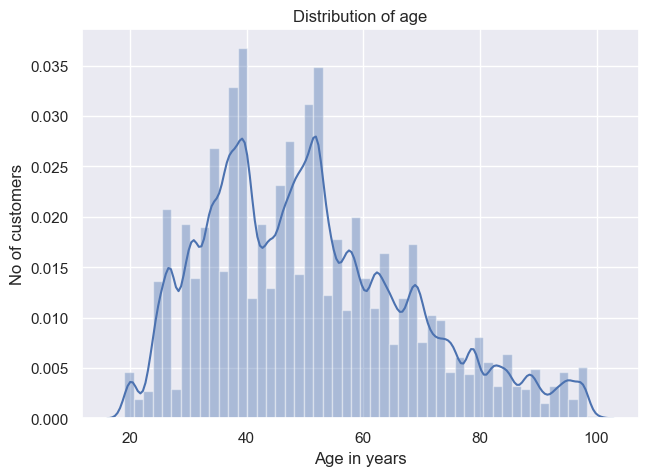

In [144]:
# Visualising age variable

xy = sns.distplot(fraud_dataset['age'])
xy.set_xlabel('Age in years')
xy.set_ylabel('No of customers')
xy.set_title('Distribution of age')
plt.show()

Insight:

Majority of the credit card holders fall under the age of 30-50 years

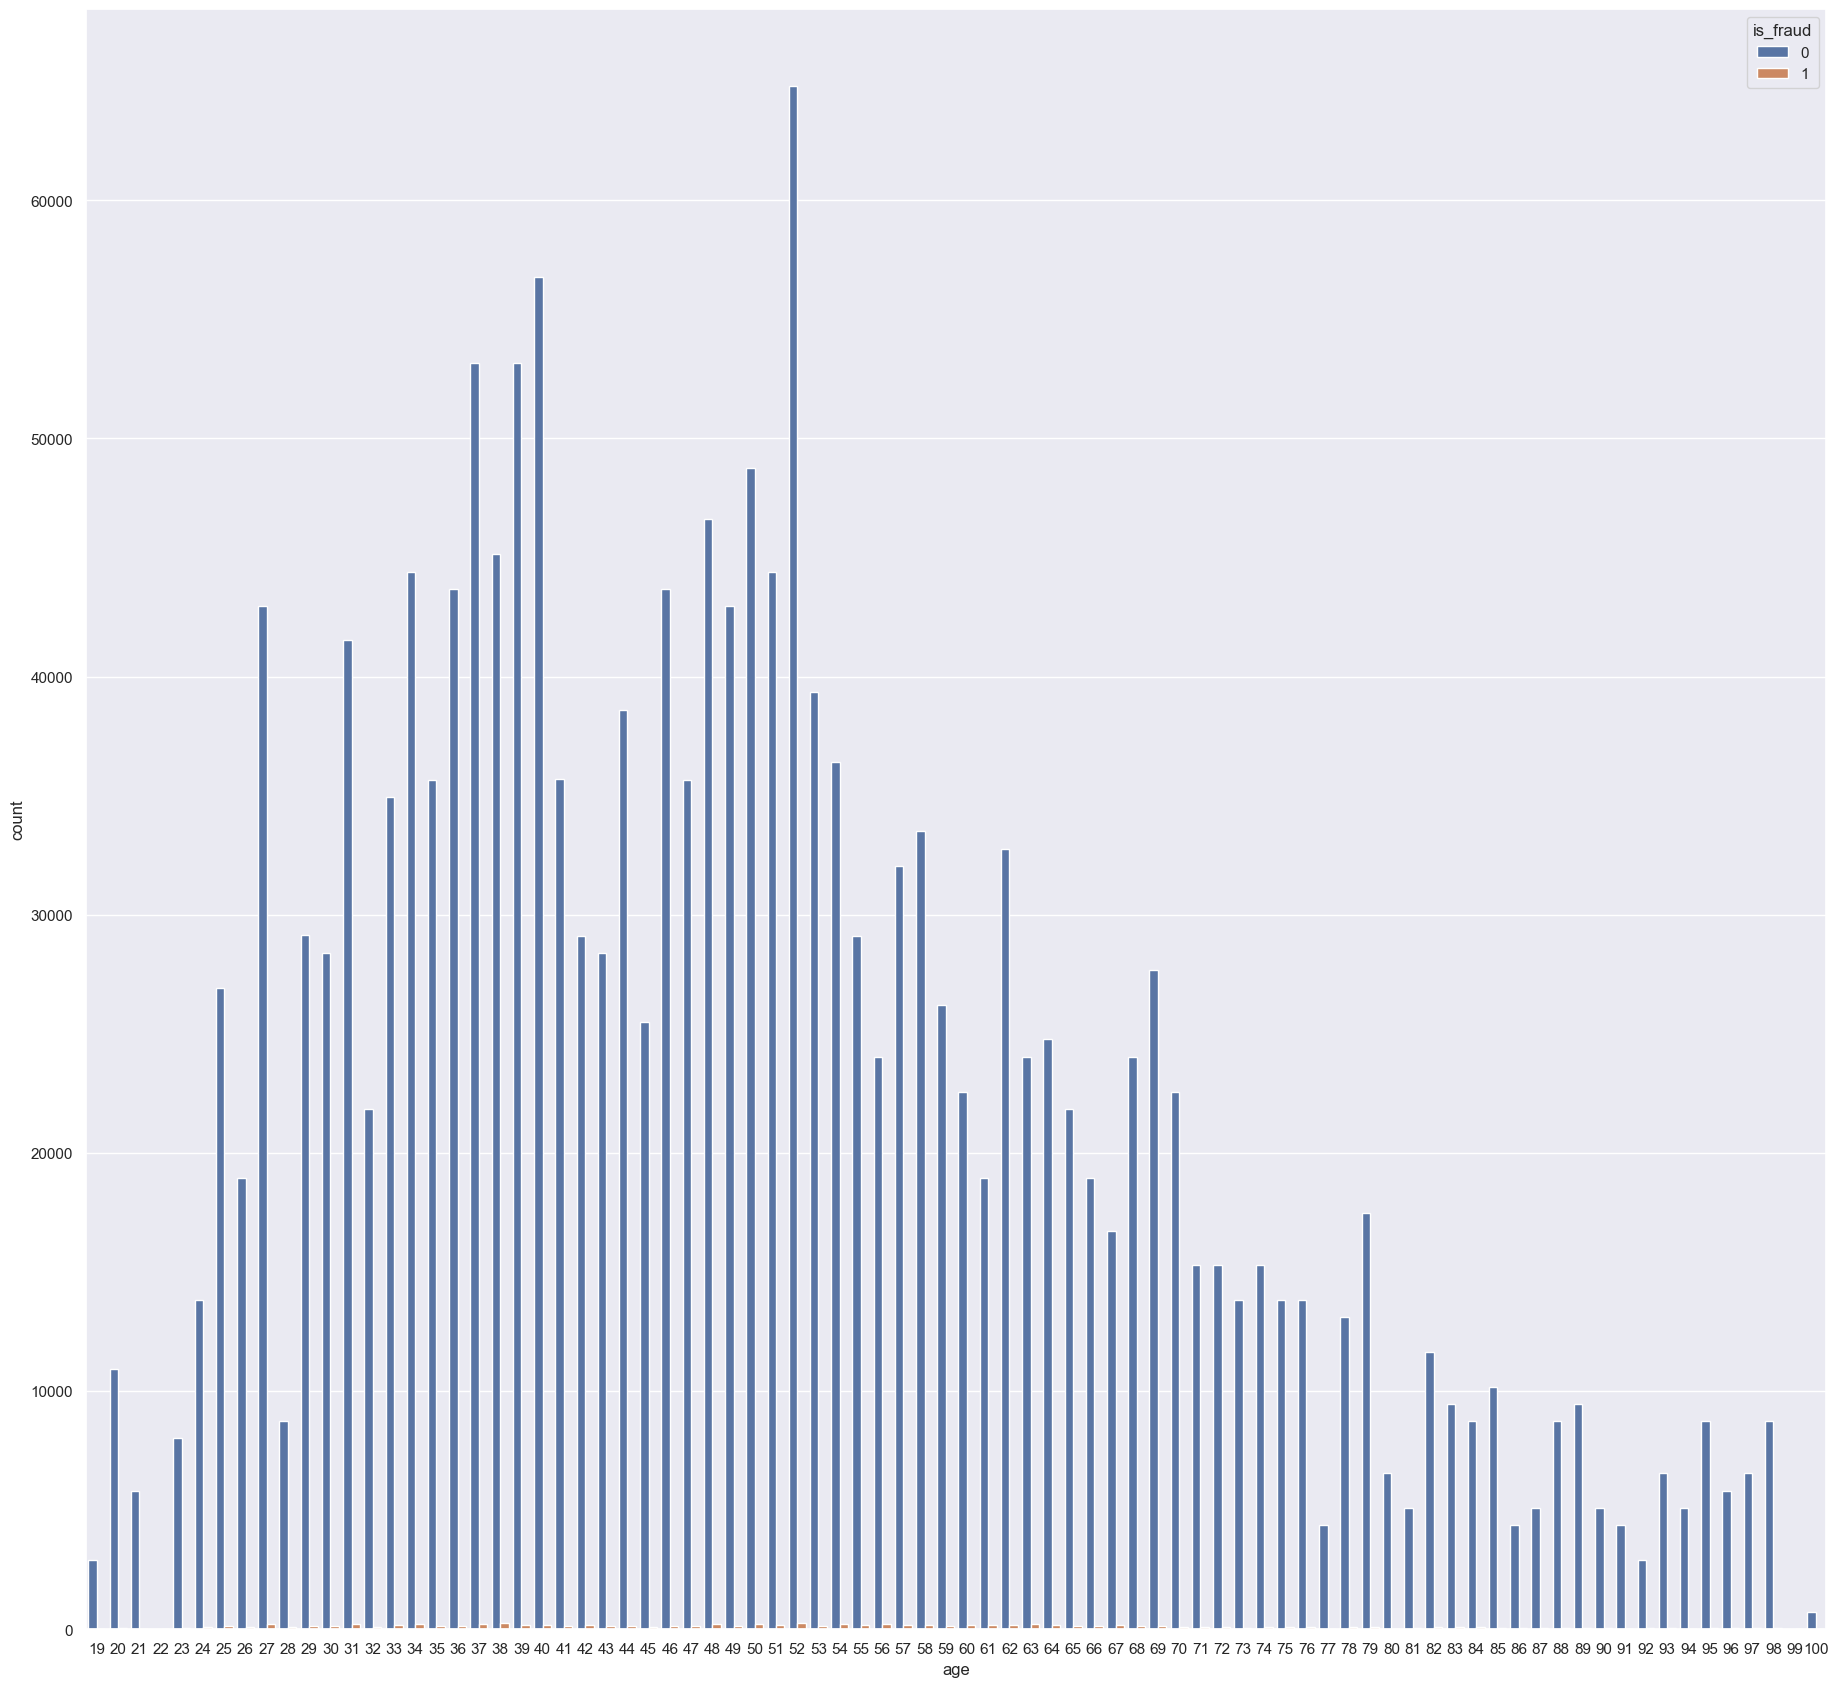

In [145]:
#distribution of varible -age

plt.figure(figsize=(20,20))
sns.countplot(x = 'age', hue = 'is_fraud',data =fraud_dataset)
plt.show()

In [146]:
# Binning of age variable for better insights


bin_manual = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labs = ['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100']
fraud_dataset['age_bin'] = pd.cut(fraud_dataset.age, bins=bin_manual, labels=labs)

In [147]:

#checking the age_bin and age

fraud_dataset[['age_bin','age']].head()

age_bin  age
0   30-40   36
1   40-50   46
2   60-70   62
3   50-60   57
4   30-40   38

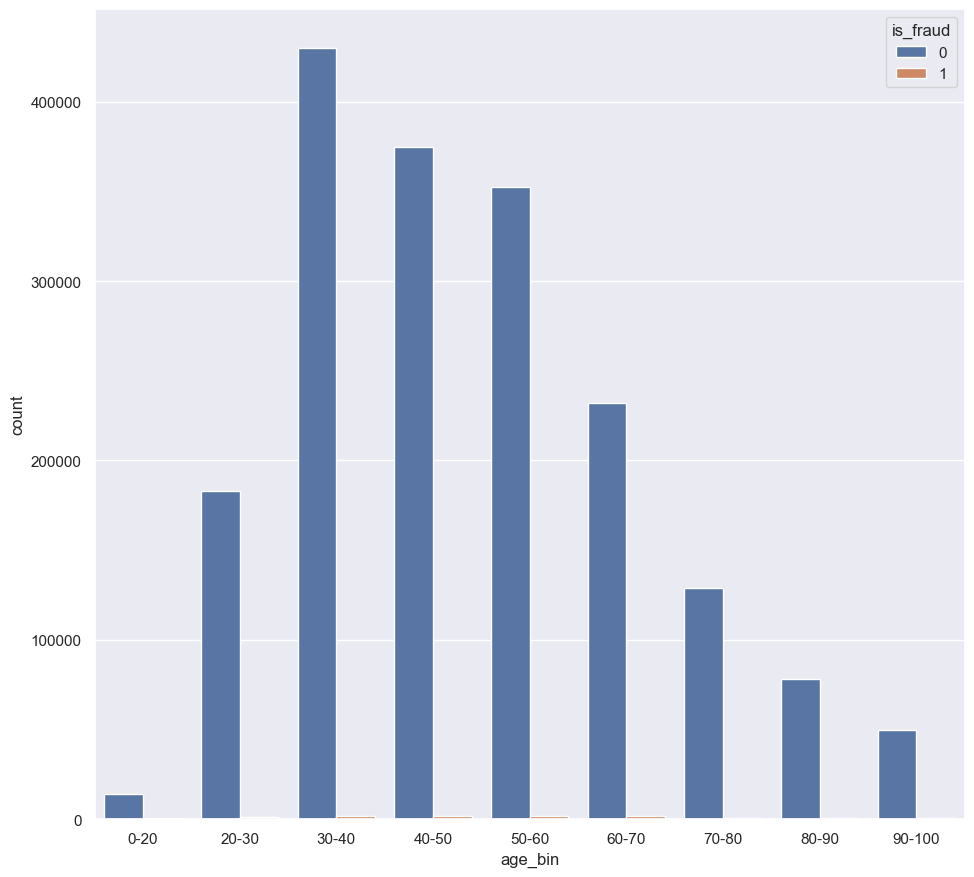

In [148]:
#distribution of fraud across age-bins

plt.figure(figsize=(10,10))
sns.countplot(x = 'age_bin', hue = 'is_fraud',data =fraud_dataset)
plt.show()

Insight:
1. From the above graph we can infer that majority of the credit card holders belongs to the age of 30 to 60 years.¶

2. The age of the credit card holders where fraudulent transactions took place mostly belongs to the age of 30 to 70 years.

6. Deriving Historical variables:
   a. hist_trans_30d,
   b. hist_trans_24h,
   c. hist_trans_avg_amt_30d 
   d. hist_trans_avg_amt_24h

In [149]:
#making a copy of the dataset

df2 = fraud_dataset.copy()

In [150]:
df2.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip  ...  trans_Month  trans_Hour  trans_Day trans_weekday    dist  \
0    NC  28654  ...            1           0          1       Tuesday   78.60   
1    WA  99160  ...            1           0          1       Tuesday   30.21   
2    ID  83252  ...            1           0          1       Tuesday  108.21   
3    MT  59632  ...            1           0          1       Tuesday   95.67   
4    VA  24433  ...            1           0          1       Tuesday   77.56   

  prev_merch_lat  prev_merch_long  time_since_prev_transaction  \
0      36.011293       -82.048315                          0.0   
1      49.159047      -118.186462                          0.0   
2      43.150704      -112.154481                          0.0   
3      47.034331      -112.561071                          0.0   
4      38.674999       -78.632459                          0.0   

   distance_between_merchants  age_bin  
0                         0.0    30-40  
1                         0.0    40-50  
2                         0.0    60-70  
3                         0.0    50-60  
4                         0.0    30-40  

[5 rows x 36 columns]

In [151]:
#code is converting a column of timestamps to a datetime index, renaming that index for clarity, 
# and sorting the DataFrame by this index to organize the data chronologically

df2.index = pd.to_datetime(df2['trans_date_trans_time'])
df2 = df2.rename_axis(index={'trans_date_trans_time':'time_index'})
df2 = df2.sort_index()
df2.head()

trans_date_trans_time            cc_num  \
time_index                                                    
2019-01-01 00:00:18   2019-01-01 00:00:18  2703186189652095   
2019-01-01 00:00:44   2019-01-01 00:00:44      630423337322   
2019-01-01 00:00:51   2019-01-01 00:00:51    38859492057661   
2019-01-01 00:01:16   2019-01-01 00:01:16  3534093764340240   
2019-01-01 00:03:06   2019-01-01 00:03:06   375534208663984   

                                               merchant       category  \
time_index                                                               
2019-01-01 00:00:18          fraud_Rippin, Kub and Mann       misc_net   
2019-01-01 00:00:44     fraud_Heller, Gutmann and Zieme    grocery_pos   
2019-01-01 00:00:51                fraud_Lind-Buckridge  entertainment   
2019-01-01 00:01:16  fraud_Kutch, Hermiston and Farrell  gas_transport   
2019-01-01 00:03:06                 fraud_Keeling-Crist       misc_pos   

                        amt gender                        street  \
time_index                                                         
2019-01-01 00:00:18    4.97      F                561 Perry Cove   
2019-01-01 00:00:44  107.23      F  43039 Riley Greens Suite 393   
2019-01-01 00:00:51  220.11      M      594 White Dale Suite 530   
2019-01-01 00:01:16   45.00      M   9443 Cynthia Court Apt. 038   
2019-01-01 00:03:06   41.96      M              408 Bradley Rest   

                               city state    zip  ...  trans_Month  \
time_index                                        ...                
2019-01-01 00:00:18  Moravian Falls    NC  28654  ...            1   
2019-01-01 00:00:44          Orient    WA  99160  ...            1   
2019-01-01 00:00:51      Malad City    ID  83252  ...            1   
2019-01-01 00:01:16         Boulder    MT  59632  ...            1   
2019-01-01 00:03:06        Doe Hill    VA  24433  ...            1   

                     trans_Hour  trans_Day trans_weekday    dist  \
time_index                                                         
2019-01-01 00:00:18           0          1       Tuesday   78.60   
2019-01-01 00:00:44           0          1       Tuesday   30.21   
2019-01-01 00:00:51           0          1       Tuesday  108.21   
2019-01-01 00:01:16           0          1       Tuesday   95.67   
2019-01-01 00:03:06           0          1       Tuesday   77.56   

                    prev_merch_lat  prev_merch_long  \
time_index                                            
2019-01-01 00:00:18      36.011293       -82.048315   
2019-01-01 00:00:44      49.159047      -118.186462   
2019-01-01 00:00:51      43.150704      -112.154481   
2019-01-01 00:01:16      47.034331      -112.561071   
2019-01-01 00:03:06      38.674999       -78.632459   

                     time_since_prev_transaction  distance_between_merchants  \
time_index                                                                     
2019-01-01 00:00:18                          0.0                         0.0   
2019-01-01 00:00:44                          0.0                         0.0   
2019-01-01 00:00:51                          0.0                         0.0   
2019-01-01 00:01:16                          0.0                         0.0   
2019-01-01 00:03:06                          0.0                         0.0   

                     age_bin  
time_index                    
2019-01-01 00:00:18    30-40  
2019-01-01 00:00:44    40-50  
2019-01-01 00:00:51    60-70  
2019-01-01 00:01:16    50-60  
2019-01-01 00:03:06    30-40  

[5 rows x 36 columns]

In [152]:
df2['val_for_agg'] = 1


### 30 Day Transactions by Customers

In [153]:
#The code calculates the count of transactions within the last 30 days for each credit card number ('cc_num'). 
# The rolling window count is then shifted to reflect the count prior to the current transaction. 
# Any missing values are filled with 0, resulting in a DataFrame (df_hist_orders_24h) that shows the count of past transactions 
# in a 24-hour period, grouped by credit card number.

df_hist_trans_30d = \
    df2 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('30D')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_trans_30d.columns = ['cc_num','trans_date_trans_time','hist_trans_30d']

In [154]:
df_hist_trans_30d = df_hist_trans_30d.groupby(['cc_num','trans_date_trans_time'])['hist_trans_30d'].min().reset_index()
df_hist_trans_30d.head()

cc_num trans_date_trans_time  hist_trans_30d
0  60416207185   2019-01-01 12:47:15             0.0
1  60416207185   2019-01-02 08:44:57             1.0
2  60416207185   2019-01-02 08:47:36             2.0
3  60416207185   2019-01-02 12:38:14             3.0
4  60416207185   2019-01-02 13:10:46             4.0

In [155]:
#checking the dataset

df_hist_trans_30d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   cc_num                 int64         
 1   trans_date_trans_time  datetime64[ns]
 2   hist_trans_30d         float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


###  
24 Hours Orders by Customers

In [156]:
# The code calculates the count of transactions within the last 24 hours for each credit card number ('cc_num'). 
# The rolling window count is then shifted to reflect the count prior to the current transaction. 
# Any missing values are filled with 0, resulting in a DataFrame (df_hist_orders_24h) that shows the count of past transactions in a 24-hour period, 
# grouped by credit card number.

df_hist_orders_24h = \
    df2 \
    .groupby(['cc_num'])['val_for_agg']\
    .rolling('24H')\
    .count()\
    .shift()\
    .reset_index()\
    .fillna(0)

df_hist_orders_24h.columns= ['cc_num','trans_date_trans_time','hist_trans_24h']

In [157]:
# checking the dataframe

df_hist_orders_24h = df_hist_orders_24h.groupby(['cc_num','trans_date_trans_time'])['hist_trans_24h'].min().reset_index()
df_hist_orders_24h.head()

cc_num trans_date_trans_time  hist_trans_24h
0  60416207185   2019-01-01 12:47:15             0.0
1  60416207185   2019-01-02 08:44:57             1.0
2  60416207185   2019-01-02 08:47:36             2.0
3  60416207185   2019-01-02 12:38:14             3.0
4  60416207185   2019-01-02 13:10:46             4.0

In [158]:
df_hist_orders_24h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   cc_num                 int64         
 1   trans_date_trans_time  datetime64[ns]
 2   hist_trans_24h         float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


### 30 Day Orders Amt Avg by Customers

In [159]:
# The code calculates the avg of transactions within the last 30 days for each credit card number ('cc_num'). 
# The rolling window count is then shifted to reflect the count prior to the current transaction. 
# Any missing values are filled with 0, resulting in a DataFrame (df_hist_orders_24h) that shows the count of past transactions in a 24-hour period, grouped by credit card number.

df_hist_trans_amt_avg_30d = \
    df2 \
    .groupby(['cc_num'])['amt']\
    .rolling('30D')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_30d.columns = ['cc_num','trans_date_trans_time','hist_trans_avg_amt_30d']

In [160]:
# inspecting the dataframe

df_hist_trans_amt_avg_30d = df_hist_trans_amt_avg_30d.groupby(['cc_num','trans_date_trans_time'])['hist_trans_avg_amt_30d'].min().reset_index()
df_hist_trans_amt_avg_30d.head()

cc_num trans_date_trans_time  hist_trans_avg_amt_30d
0  60416207185   2019-01-01 12:47:15                   0.000
1  60416207185   2019-01-02 08:44:57                   7.270
2  60416207185   2019-01-02 08:47:36                  30.105
3  60416207185   2019-01-02 12:38:14                  47.430
4  60416207185   2019-01-02 13:10:46                  44.270

In [161]:
df_hist_trans_amt_avg_30d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   cc_num                  int64         
 1   trans_date_trans_time   datetime64[ns]
 2   hist_trans_avg_amt_30d  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


### 24 Hours Orders Amt Avg by Customers

In [162]:
# The code calculates the count of transactions within the last 24 hours for each credit card number ('cc_num'). 
# The rolling window count is then shifted to reflect the count prior to the current transaction. Any missing values are filled with 0, resulting in a DataFrame (df_hist_orders_24h) that shows the count of past transactions in a 24-hour period, grouped by credit card number.

df_hist_trans_amt_avg_24h = \
    df2 \
    .groupby(['cc_num'])['amt']\
    .rolling('24H')\
    .mean()\
    .shift(1)\
    .reset_index()\
    .fillna(0)

df_hist_trans_amt_avg_24h.columns = ['cc_num','trans_date_trans_time','hist_trans_avg_amt_24h']

In [163]:
df_hist_trans_amt_avg_24h = df_hist_trans_amt_avg_24h.groupby(['cc_num','trans_date_trans_time'])['hist_trans_avg_amt_24h'].min().reset_index()
df_hist_trans_amt_avg_24h.head()

cc_num trans_date_trans_time  hist_trans_avg_amt_24h
0  60416207185   2019-01-01 12:47:15                   0.000
1  60416207185   2019-01-02 08:44:57                   7.270
2  60416207185   2019-01-02 08:47:36                  30.105
3  60416207185   2019-01-02 12:38:14                  47.430
4  60416207185   2019-01-02 13:10:46                  44.270

In [164]:
df_hist_trans_amt_avg_24h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852350 entries, 0 to 1852349
Data columns (total 3 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   cc_num                  int64         
 1   trans_date_trans_time   datetime64[ns]
 2   hist_trans_avg_amt_24h  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 42.4 MB


In [165]:
## Merging Historical Variables to the main dataframe with Transactions by ['cc_num','trans_date_trans_time']

fraud_dataset=pd.merge(fraud_dataset, df_hist_trans_30d, on=['cc_num', 'trans_date_trans_time'], how= 'left')
fraud_dataset.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip  ...  trans_Hour  trans_Day  trans_weekday    dist  \
0    NC  28654  ...           0          1        Tuesday   78.60   
1    WA  99160  ...           0          1        Tuesday   30.21   
2    ID  83252  ...           0          1        Tuesday  108.21   
3    MT  59632  ...           0          1        Tuesday   95.67   
4    VA  24433  ...           0          1        Tuesday   77.56   

  prev_merch_lat prev_merch_long  time_since_prev_transaction  \
0      36.011293      -82.048315                          0.0   
1      49.159047     -118.186462                          0.0   
2      43.150704     -112.154481                          0.0   
3      47.034331     -112.561071                          0.0   
4      38.674999      -78.632459                          0.0   

   distance_between_merchants  age_bin  hist_trans_30d  
0                         0.0    30-40           109.0  
1                         0.0    40-50            53.0  
2                         0.0    60-70             8.0  
3                         0.0    50-60           181.0  
4                         0.0    30-40           218.0  

[5 rows x 37 columns]

In [166]:
fraud_dataset.shape

(1852394, 37)

In [167]:
## Merging Historical Variables- 'hist_trans_24h' to the main dataframe with Transactions by ['cc_num','trans_date_trans_time']

fraud_dataset=pd.merge(fraud_dataset, df_hist_orders_24h, on=['cc_num', 'trans_date_trans_time'], how='left')
fraud_dataset.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip  ...  trans_Day  trans_weekday    dist prev_merch_lat  \
0    NC  28654  ...          1        Tuesday   78.60      36.011293   
1    WA  99160  ...          1        Tuesday   30.21      49.159047   
2    ID  83252  ...          1        Tuesday  108.21      43.150704   
3    MT  59632  ...          1        Tuesday   95.67      47.034331   
4    VA  24433  ...          1        Tuesday   77.56      38.674999   

  prev_merch_long time_since_prev_transaction  distance_between_merchants  \
0      -82.048315                         0.0                         0.0   
1     -118.186462                         0.0                         0.0   
2     -112.154481                         0.0                         0.0   
3     -112.561071                         0.0                         0.0   
4      -78.632459                         0.0                         0.0   

   age_bin  hist_trans_30d  hist_trans_24h  
0    30-40           109.0             6.0  
1    40-50            53.0             1.0  
2    60-70             8.0             5.0  
3    50-60           181.0             5.0  
4    30-40           218.0             6.0  

[5 rows x 38 columns]

In [168]:

fraud_dataset.shape

(1852394, 38)

In [169]:
## Merging Historical Variables- 'hist_trans_avg_amt_30d' to the main dataframe with Transactions by ['cc_num','trans_date_trans_time']

fraud_dataset=pd.merge(fraud_dataset, df_hist_trans_amt_avg_30d, on=['cc_num', 'trans_date_trans_time'], how='left')
fraud_dataset.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip  ...  trans_weekday    dist  prev_merch_lat prev_merch_long  \
0    NC  28654  ...        Tuesday   78.60       36.011293      -82.048315   
1    WA  99160  ...        Tuesday   30.21       49.159047     -118.186462   
2    ID  83252  ...        Tuesday  108.21       43.150704     -112.154481   
3    MT  59632  ...        Tuesday   95.67       47.034331     -112.561071   
4    VA  24433  ...        Tuesday   77.56       38.674999      -78.632459   

  time_since_prev_transaction distance_between_merchants  age_bin  \
0                         0.0                        0.0    30-40   
1                         0.0                        0.0    40-50   
2                         0.0                        0.0    60-70   
3                         0.0                        0.0    50-60   
4                         0.0                        0.0    30-40   

   hist_trans_30d  hist_trans_24h  hist_trans_avg_amt_30d  
0           109.0             6.0               70.974587  
1            53.0             1.0               50.883962  
2             8.0             5.0              377.925000  
3           181.0             5.0               59.307403  
4           218.0             6.0               67.148991  

[5 rows x 39 columns]

In [170]:
fraud_dataset.shape

(1852394, 39)

In [171]:
## Merging Historical Variables- 'hist_trans_avg_amt_24h' to the main dataframe with Transactions by ['cc_num','trans_date_trans_time']

fraud_dataset=pd.merge(fraud_dataset, df_hist_trans_amt_avg_24h, on=['cc_num', 'trans_date_trans_time'], how='left')
fraud_dataset.head()

trans_date_trans_time            cc_num                            merchant  \
0   2019-01-01 00:00:18  2703186189652095          fraud_Rippin, Kub and Mann   
1   2019-01-01 00:00:44      630423337322     fraud_Heller, Gutmann and Zieme   
2   2019-01-01 00:00:51    38859492057661                fraud_Lind-Buckridge   
3   2019-01-01 00:01:16  3534093764340240  fraud_Kutch, Hermiston and Farrell   
4   2019-01-01 00:03:06   375534208663984                 fraud_Keeling-Crist   

        category     amt gender                        street            city  \
0       misc_net    4.97      F                561 Perry Cove  Moravian Falls   
1    grocery_pos  107.23      F  43039 Riley Greens Suite 393          Orient   
2  entertainment  220.11      M      594 White Dale Suite 530      Malad City   
3  gas_transport   45.00      M   9443 Cynthia Court Apt. 038         Boulder   
4       misc_pos   41.96      M              408 Bradley Rest        Doe Hill   

  state    zip  ...    dist  prev_merch_lat  prev_merch_long  \
0    NC  28654  ...   78.60       36.011293       -82.048315   
1    WA  99160  ...   30.21       49.159047      -118.186462   
2    ID  83252  ...  108.21       43.150704      -112.154481   
3    MT  59632  ...   95.67       47.034331      -112.561071   
4    VA  24433  ...   77.56       38.674999       -78.632459   

  time_since_prev_transaction distance_between_merchants age_bin  \
0                         0.0                        0.0   30-40   
1                         0.0                        0.0   40-50   
2                         0.0                        0.0   60-70   
3                         0.0                        0.0   50-60   
4                         0.0                        0.0   30-40   

   hist_trans_30d  hist_trans_24h  hist_trans_avg_amt_30d  \
0           109.0             6.0               70.974587   
1            53.0             1.0               50.883962   
2             8.0             5.0              377.925000   
3           181.0             5.0               59.307403   
4           218.0             6.0               67.148991   

   hist_trans_avg_amt_24h  
0               95.641667  
1               12.110000  
2              445.778000  
3               42.454000  
4               78.120000  

[5 rows x 40 columns]

In [172]:
fraud_dataset.shape


(1852394, 40)

6.2 Conducting appropriate exploratory analysis with Feature Engineered Columns

In [173]:
# Storing Fraud and non-Fraud transactions in seperate datasets

df_nonfraud = fraud_dataset[fraud_dataset.is_fraud == 0]
df_fraud = fraud_dataset[fraud_dataset.is_fraud == 1]

6.2.1 Fraud transactions in 2019 and 2020

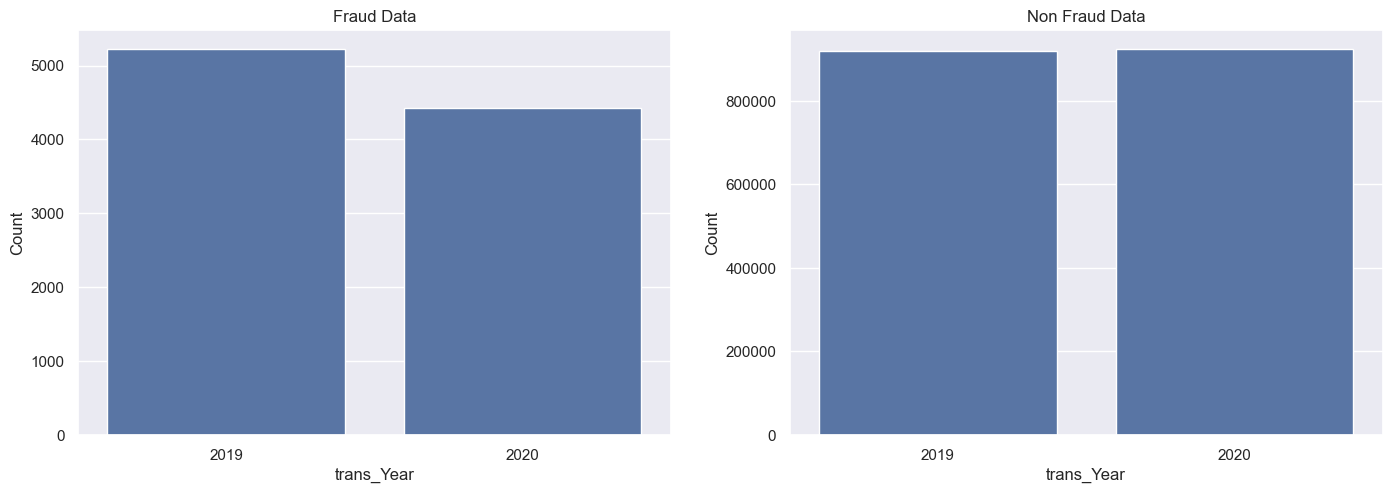

In [174]:
#Plotting the comaprison between fraud and non-fraud transactions for the year 2019 and 2020.

value_counts = df_fraud['trans_Year'].value_counts(normalize=True)

# Set a threshold (e.g., only include categories that make up at least 30% of the data)
threshold = 0.30
top_categories = value_counts[value_counts >= threshold].index

# Filter the DataFrame
df_filtered1 = df_fraud[df_fraud['trans_Year'].isin(top_categories)]

fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x='trans_Year', data=df_filtered1)
plt.title('Fraud Data')
plt.xlabel('trans_Year')
plt.ylabel('Count')

df_filtered2 = df_nonfraud[df_nonfraud['trans_Year'].isin(top_categories)]


plt.subplot(1,2,2)
sns.countplot(x='trans_Year', data=df_filtered2)
plt.title('Non Fraud Data')
plt.xlabel('trans_Year')
plt.ylabel('Count')
plt.show()

Insight:

1. Count of fraud transactions is more for 2019.
2. count of non-fraudulent transaction are almost same in 2019 & 2020.

6.2.2 Fraud transaction based on gender

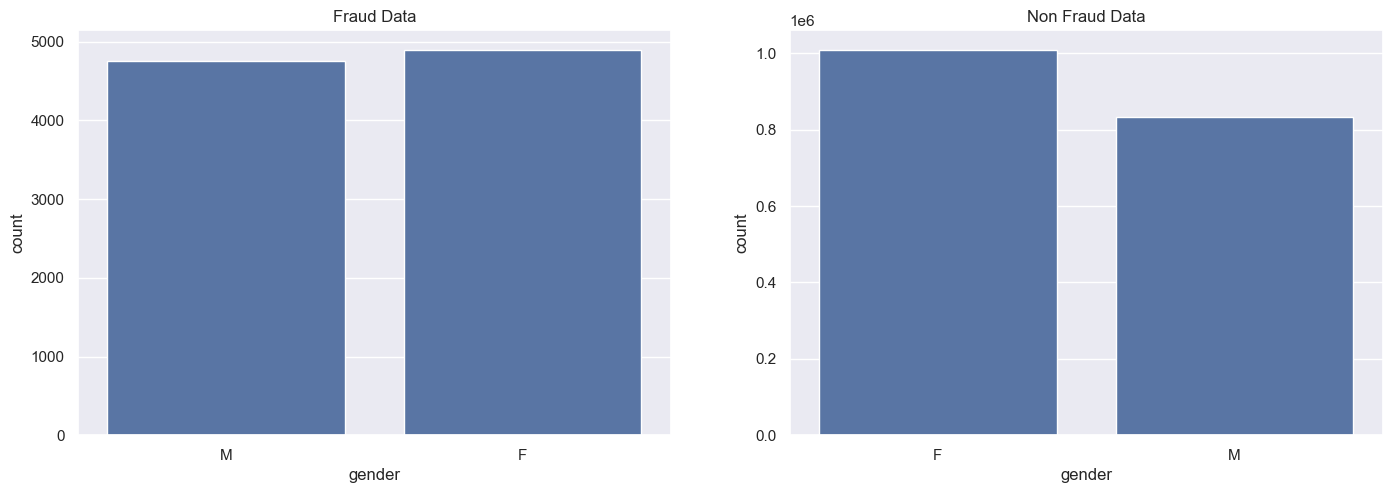

In [175]:
#plotting fraud and non-fraud transactions across the two genders

value_counts = df_fraud['gender'].value_counts(normalize=True)

# Set a threshold (e.g., only include categories that make up at least 30% of the data)
threshold = 0.30
top_categories = value_counts[value_counts >= threshold].index

# Filter the DataFrame
df_filtered3 = df_fraud[df_fraud['gender'].isin(top_categories)]

fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x= df_fraud['gender'], data=df_filtered3)
plt.title('Fraud Data')
#plt.xticks(rotation = 90)

df_filtered4 = df_nonfraud[df_nonfraud['gender'].isin(top_categories)]

plt.subplot(1,2,2)
sns.countplot(x=df_nonfraud['gender'], data = df_filtered4)
plt.title('Non Fraud Data')
#plt.xticks(rotation = 90)
plt.show()

Insight:

Frauds Transcations are done on both male and female card holders but count of fraud transcations is slightly more on Female's credit card holders


6.2.3 Fraud transcations in different months

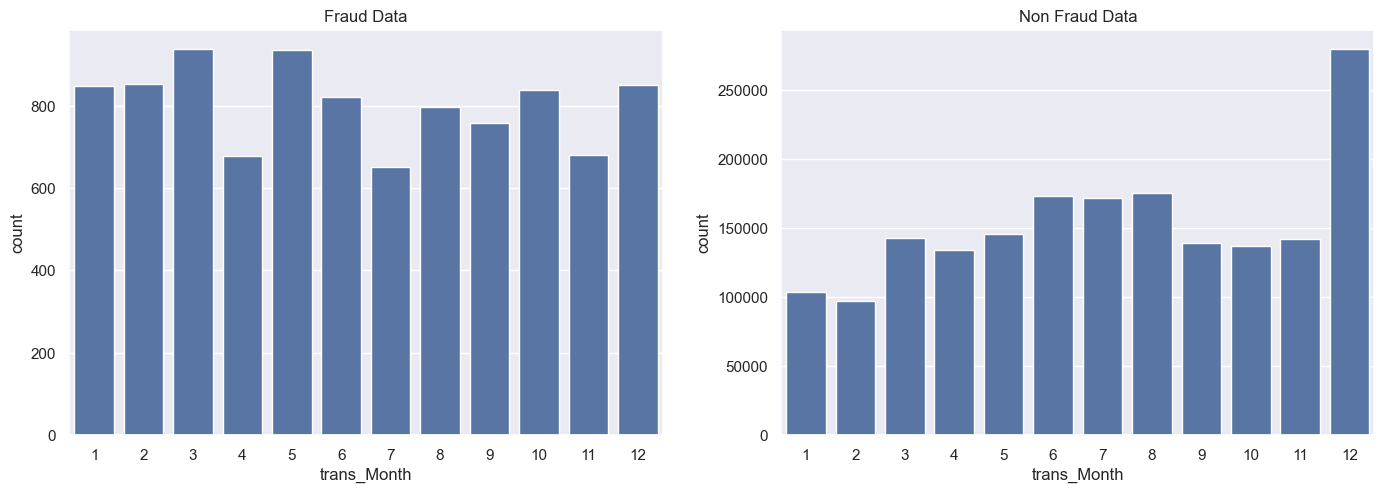

In [176]:
#plotting fraud and non-fraud transactions across the months

value_counts = df_fraud['trans_Month'].value_counts(normalize=True)

# Set a threshold (e.g., only include categories that make up at least 30% of the data)
threshold = 0.30
top_categories = value_counts[value_counts >= threshold].index

# Filter the DataFrame
df_filtered5 = df_fraud[df_fraud['trans_Month'].isin(top_categories)]

fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x=df_fraud['trans_Month'], data=df_filtered5)
plt.title('Fraud Data')
#plt.xticks(rotation = 90)

df_filtered6 = df_nonfraud[df_nonfraud['trans_Month'].isin(top_categories)]

plt.subplot(1,2,2)
sns.countplot(x= df_nonfraud['trans_Month'], data=df_filtered6)
plt.title('Non Fraud Data')
#plt.xticks(rotation = 90)
plt.show()



Insight:

1. count of fraud transactions are more in the 2nd, 3rd and 5th months of the year.
2. Fraudulant transactions are also high in the 12th month ,when the non-fraudulant transactions are also high.


6.2.4 Fraud transactions in different weekdays

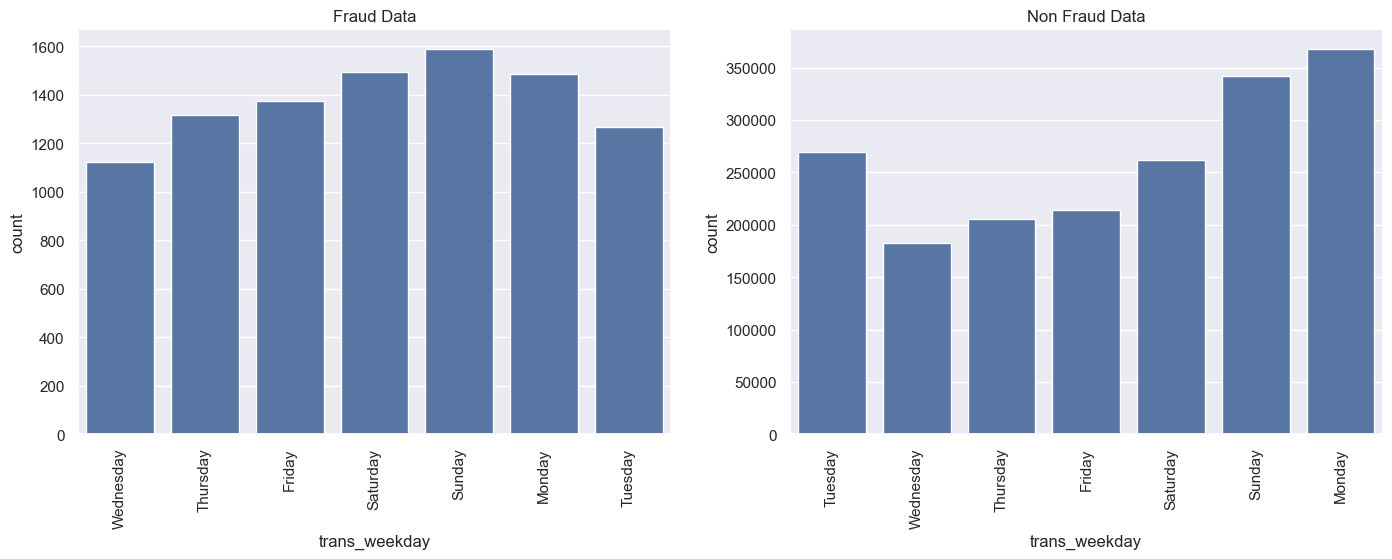

In [177]:
#plotting fraud and non-fraud transactions across the weekdays

value_counts = df_fraud['trans_weekday'].value_counts(normalize=True)

# Set a threshold (e.g., only include categories that make up at least 30% of the data)
threshold = 0.30
top_categories = value_counts[value_counts >= threshold].index

# Filter the DataFrame
df_filtered7 = df_fraud[df_fraud['trans_weekday'].isin(top_categories)]

fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x= df_fraud['trans_weekday'], data = df_filtered7)
plt.title('Fraud Data')
plt.xticks(rotation = 90)

df_filtered8 = df_nonfraud[df_nonfraud['trans_Month'].isin(top_categories)]

plt.subplot(1,2,2)
sns.countplot(x= df_nonfraud['trans_weekday'], data = df_filtered8)
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

Insight:-
Count of frauds transactions are more on Sunday, Saturday and Monday whereas the count of normal transcation is less in Saturday and more in Sunday and Monday.

6.2.5 Fraud transaction in different day of the month

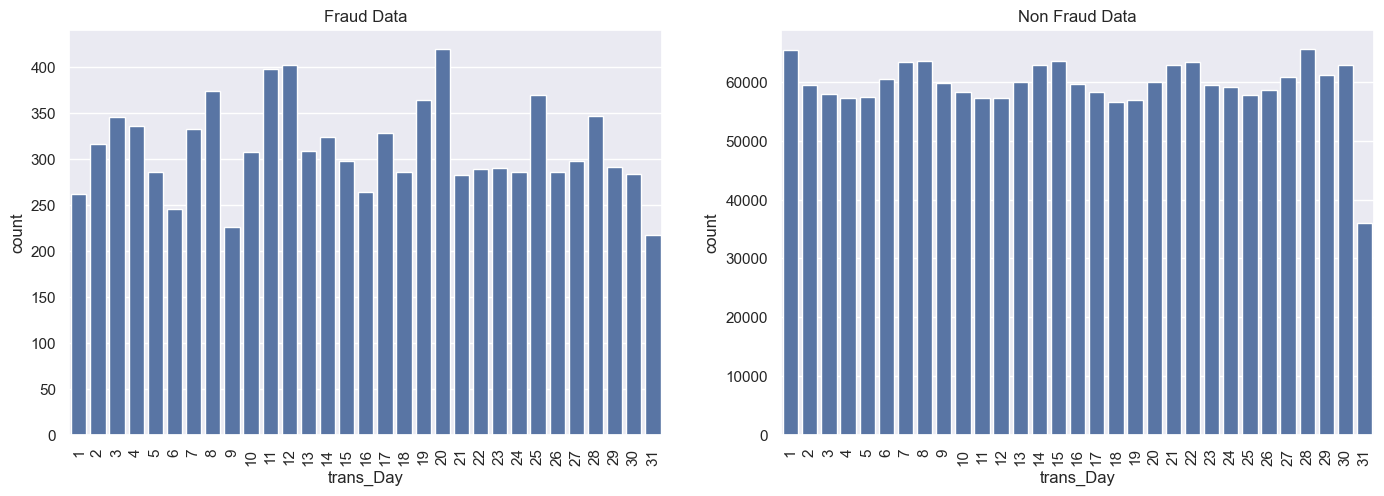

In [178]:
#plotting fraud and non-fraud transactions across the dates of a month

value_counts = df_fraud['trans_Day'].value_counts(normalize=True)

# Set a threshold (e.g., only include categories that make up at least 30% of the data)
threshold = 0.30
top_categories = value_counts[value_counts >= threshold].index

# Filter the DataFrame
df_filtered9 = df_fraud[df_fraud['trans_Day'].isin(top_categories)]

fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x= df_fraud['trans_Day'], data= df_filtered9)
plt.title('Fraud Data')
plt.xticks(rotation = 90)


df_filtered10 = df_nonfraud[df_nonfraud['trans_Day'].isin(top_categories)]

plt.subplot(1,2,2)
sns.countplot(x= df_nonfraud['trans_Day'], data = df_filtered10)
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

Insight:
Count of Frauds transactions are more on 20th, 12th and 11th days of month.


6.2.6 Hourly based Fraud Transactions

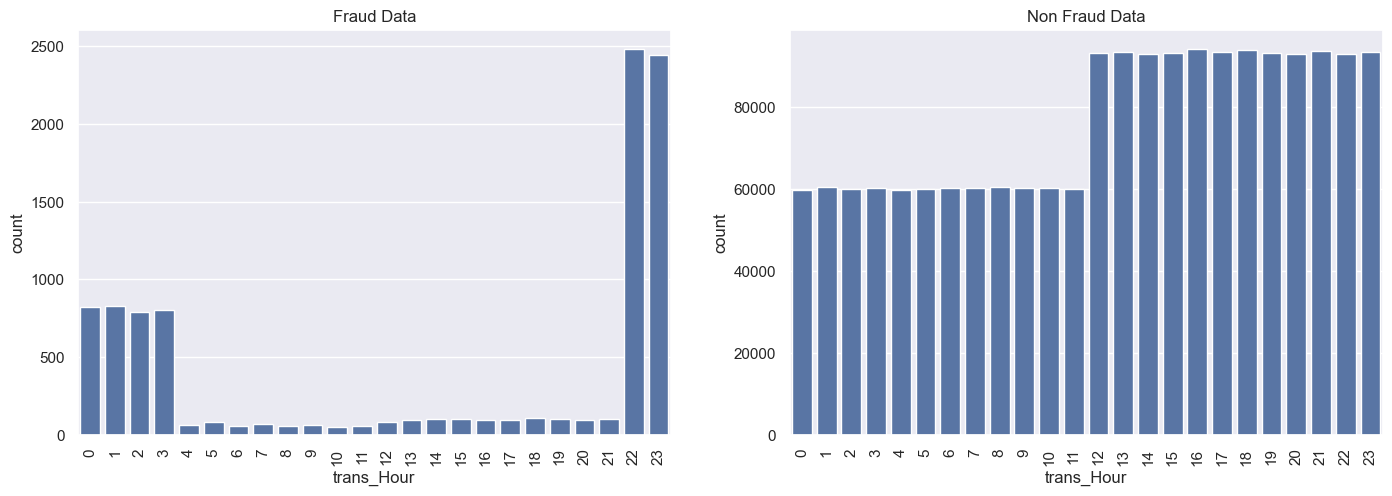

In [179]:
#plotting fraud and non-fraud transactions across different hours of the day

value_counts = df_fraud['trans_Hour'].value_counts(normalize=True)

# Set a threshold (e.g., only include categories that make up at least 30% of the data)
threshold = 0.30
top_categories = value_counts[value_counts >= threshold].index

# Filter the DataFrame
df_filtered11 = df_fraud[df_fraud['trans_Hour'].isin(top_categories)]

fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x= df_fraud['trans_Hour'], data = df_filtered11)
plt.title('Fraud Data')
plt.xticks(rotation = 90)

df_filtered12 = df_nonfraud[df_nonfraud['trans_Hour'].isin(top_categories)]

plt.subplot(1,2,2)
sns.countplot(x= df_nonfraud['trans_Hour'], data= df_filtered12)
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

Insight:

most of the fraudulant transactions happen during the late hours of 22-3 hours.


6.2.7 Fraud Transaction in different age_bins

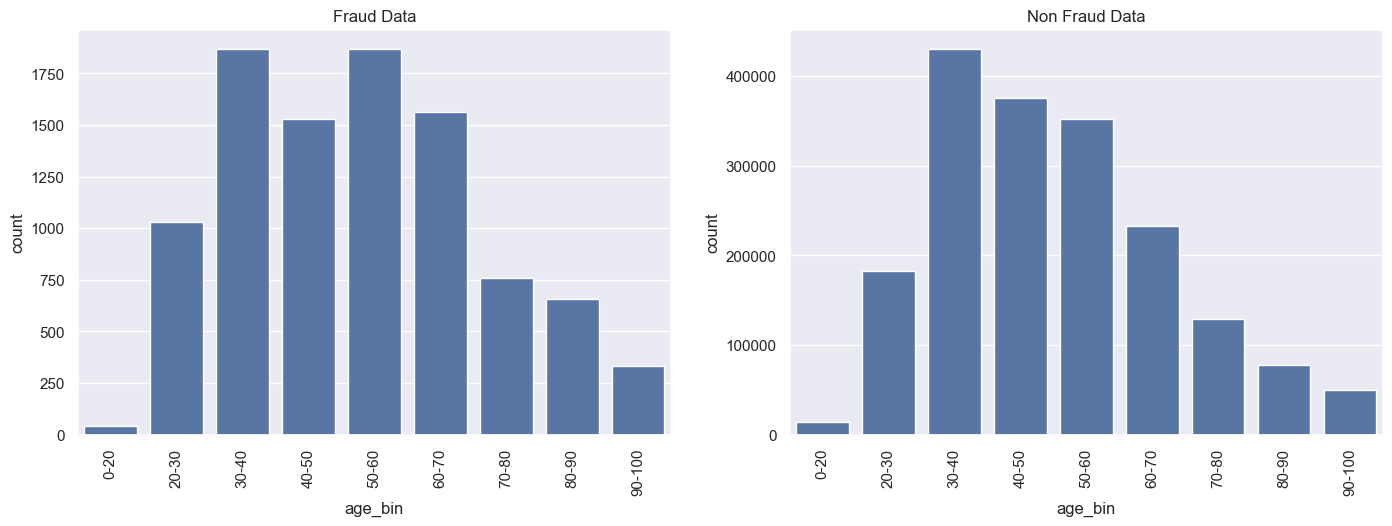

In [180]:
#plotting fraud and non-fraud transactions across different age groups

value_counts = df_fraud['age_bin'].value_counts(normalize=True)

# Set a threshold (e.g., only include categories that make up at least 30% of the data)
threshold = 0.30
top_categories = value_counts[value_counts >= threshold].index

# Filter the DataFrame
df_filtered13 = df_fraud[df_fraud['age_bin'].isin(top_categories)]

fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x= df_fraud['age_bin'], data= df_filtered13)
plt.title('Fraud Data')
plt.xticks(rotation = 90)

df_filtered14 = df_nonfraud[df_nonfraud['age_bin'].isin(top_categories)]

plt.subplot(1,2,2)
sns.countplot(x= df_nonfraud['age_bin'], data = df_filtered14)
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

INsight:
1. fraudulant transactions are observed more with the credit card holders of age groups 30-70.
2. Normal transactions are also high for the age group 30-60.
3. Count of Frauds transactions are more on credit card holder's age group of 50 to 60 where as count of normal transactions is less in them.


6.2.8. Fraud Transactions in different categories

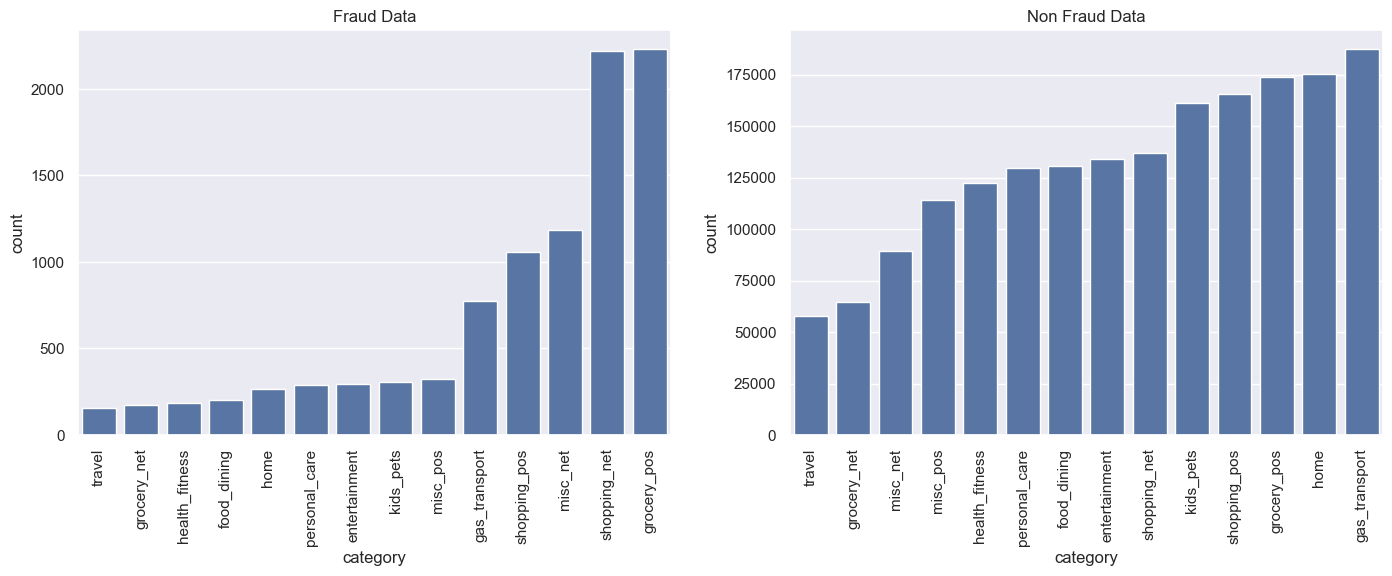

In [181]:
#plotting fraud and non-fraud transactions across different categories

value_counts = df_fraud['category'].value_counts(normalize=True)

# Set a threshold (e.g., only include categories that make up at least 30% of the data)
threshold = 0.30
top_categories = value_counts[value_counts >= threshold].index

# Filter the DataFrame
df_filtered1 = df_fraud[df_fraud['category'].isin(top_categories)]

fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x= df_fraud['category'], data = df_filtered1, order=df_fraud['category'].value_counts().sort_values().index)
plt.title('Fraud Data')
plt.xticks(rotation = 90)

df_filtered2 = df_nonfraud[df_nonfraud['age_bin'].isin(top_categories)]

plt.subplot(1,2,2)
sns.countplot(x= df_nonfraud['category'], data= df_filtered2, order=df_nonfraud['category'].value_counts().sort_values().index)
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

Insight:

1. Frauds transactions are done more at grocery_pos, shopping_net, misc_net, shopping_pos, gas_transport Categories

2. Frauds transactions is more in shopping_net where count of normal transaction is less.

3. Count of Frauds transactions is slightly less in gas_transport, shopping_pos where count of normal transaction is more.

6.2.9. Fraud Transactions in different job

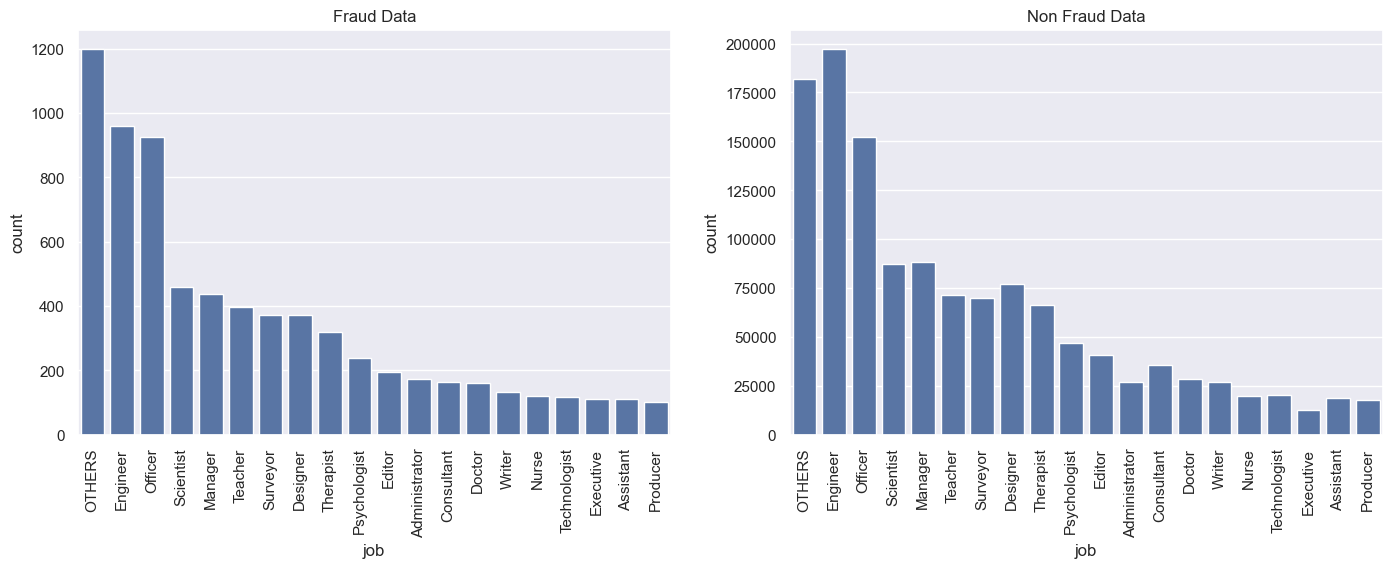

In [182]:
#plotting fraud and non-fraud transactions across different jobs

value_counts = df_fraud['job'].value_counts(normalize=True)

# Set a threshold (e.g., only include categories that make up at least 30% of the data)
threshold = 0.30
top_categories = value_counts[value_counts >= threshold].index

# Filter the DataFrame
df_filtered1 = df_fraud[df_fraud['job'].isin(top_categories)]

fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x= df_fraud['job'],data= df_filtered1, order=df_fraud.job.value_counts().iloc[:20].index)
plt.title('Fraud Data')
plt.xticks(rotation = 90)

df_filtered2 = df_nonfraud[df_nonfraud['job'].isin(top_categories)]

plt.subplot(1,2,2)
sns.countplot(x= df_nonfraud['job'],data= df_filtered2, order=df_fraud.job.value_counts().iloc[:20].index)
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

Insight:

Fraud transactions are more with Engineer, Others, Officer, Scientist, Manager, teacher and Others

6.2.10. Fraud Transactions in different State

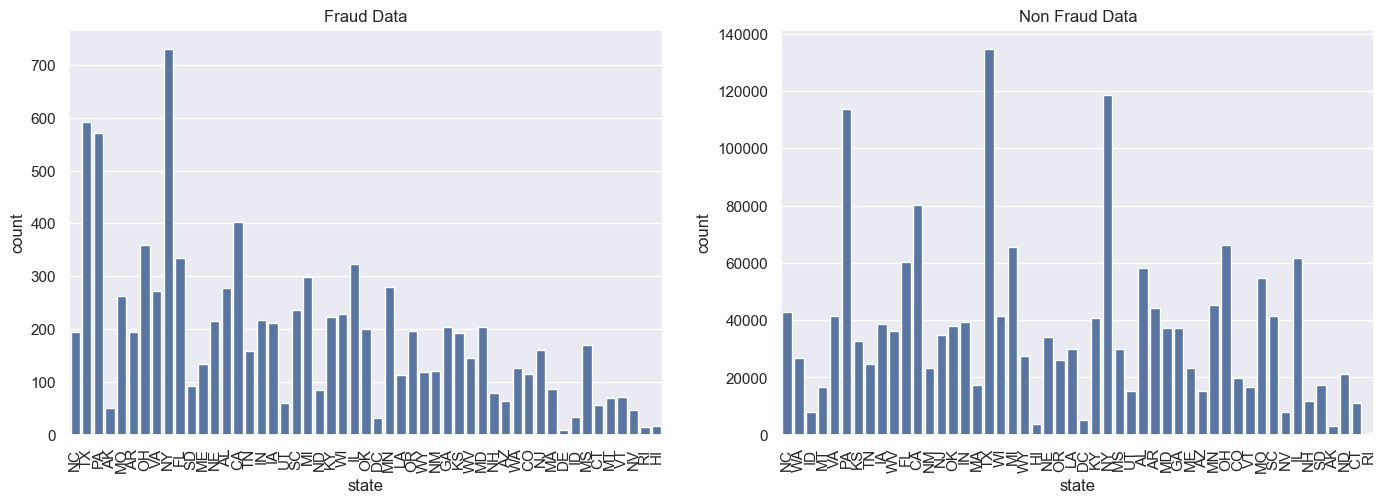

In [183]:
#plotting fraud and non-fraud transactions across different states

value_counts = df_fraud['state'].value_counts(normalize=True)

# Set a threshold (e.g., only include categories that make up at least 30% of the data)
threshold = 0.30
top_categories = value_counts[value_counts >= threshold].index

# Filter the DataFrame
df_filtered1 = df_fraud[df_fraud['state'].isin(top_categories)]


fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x= df_fraud['state'], data= df_filtered1)
plt.title('Fraud Data')
plt.xticks(rotation = 90)

df_filtered2 = df_nonfraud[df_nonfraud['state'].isin(top_categories)]

plt.subplot(1,2,2)
sns.countplot(x= df_nonfraud['state'], data = df_filtered2)
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

Insight:
1. Count of fradulant transactions are high in NY, TX , PA, CA and OH


6.2.11. Fraud Transactions in different State_bin(region)

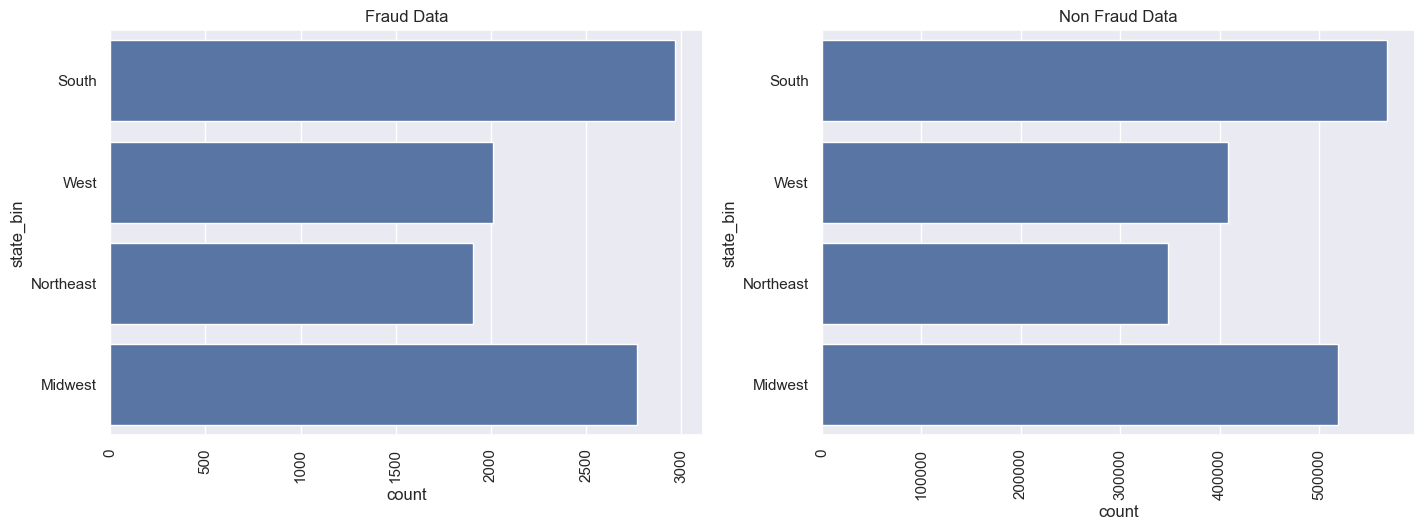

In [184]:
#plotting fraud and non-fraud transactions across different regions

value_counts = df_fraud['state_bin'].value_counts(normalize=True)

# Set a threshold (e.g., only include categories that make up at least 30% of the data)
threshold = 0.30
top_categories = value_counts[value_counts >= threshold].index

# Filter the DataFrame
df_filtered1 = df_fraud[df_fraud['state_bin'].isin(top_categories)]


fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(df_fraud['state_bin'])
plt.title('Fraud Data')
plt.xticks(rotation = 90)

df_filtered2 = df_nonfraud[df_nonfraud['state_bin'].isin(top_categories)]

plt.subplot(1,2,2)
sns.countplot(df_nonfraud['state_bin'])
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

Insight:

Fraudulant transactions are more in the South and midwest regions.


6.2.12. Fraud Transactions in different city (top 20)

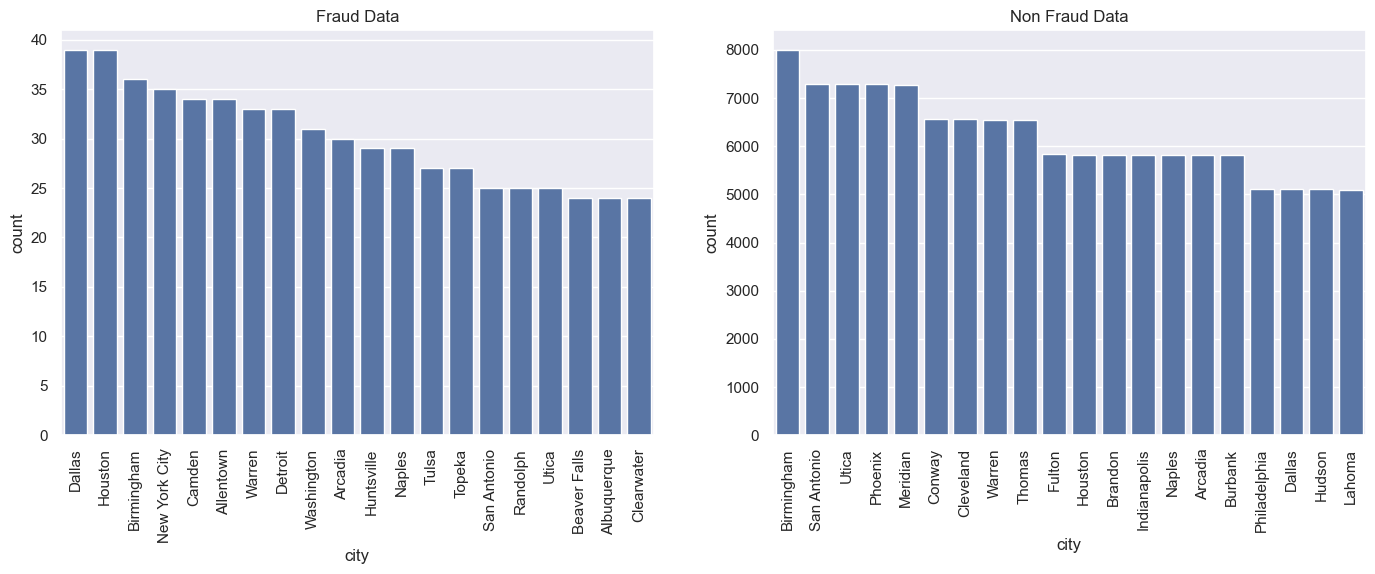

In [185]:
#plotting fraud and non-fraud transactions across different regions

value_counts = df_fraud['city'].value_counts(normalize=True)

# Set a threshold (e.g., only include categories that make up at least 30% of the data)
threshold = 0.30
top_categories = value_counts[value_counts >= threshold].index

# Filter the DataFrame
df_filtered1 = df_fraud[df_fraud['city'].isin(top_categories)]

fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x= df_fraud['city'],data = df_filtered1, order=df_fraud.city.value_counts().iloc[:20].index)
plt.title('Fraud Data')
plt.xticks(rotation = 90)

df_filtered2 = df_nonfraud[df_nonfraud['city'].isin(top_categories)]

plt.subplot(1,2,2)
sns.countplot(x= df_nonfraud['city'], data = df_filtered2, order=df_nonfraud.city.value_counts().iloc[:20].index)
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

INsight:

1. Fraudulant transactions are more in the cities of Dallas, Houston, Birmingham and New York.
2. Non- Fraud transactions are also high in Birmingham.

6.2.14. Fraud Transactions in different Merchant(top 20)

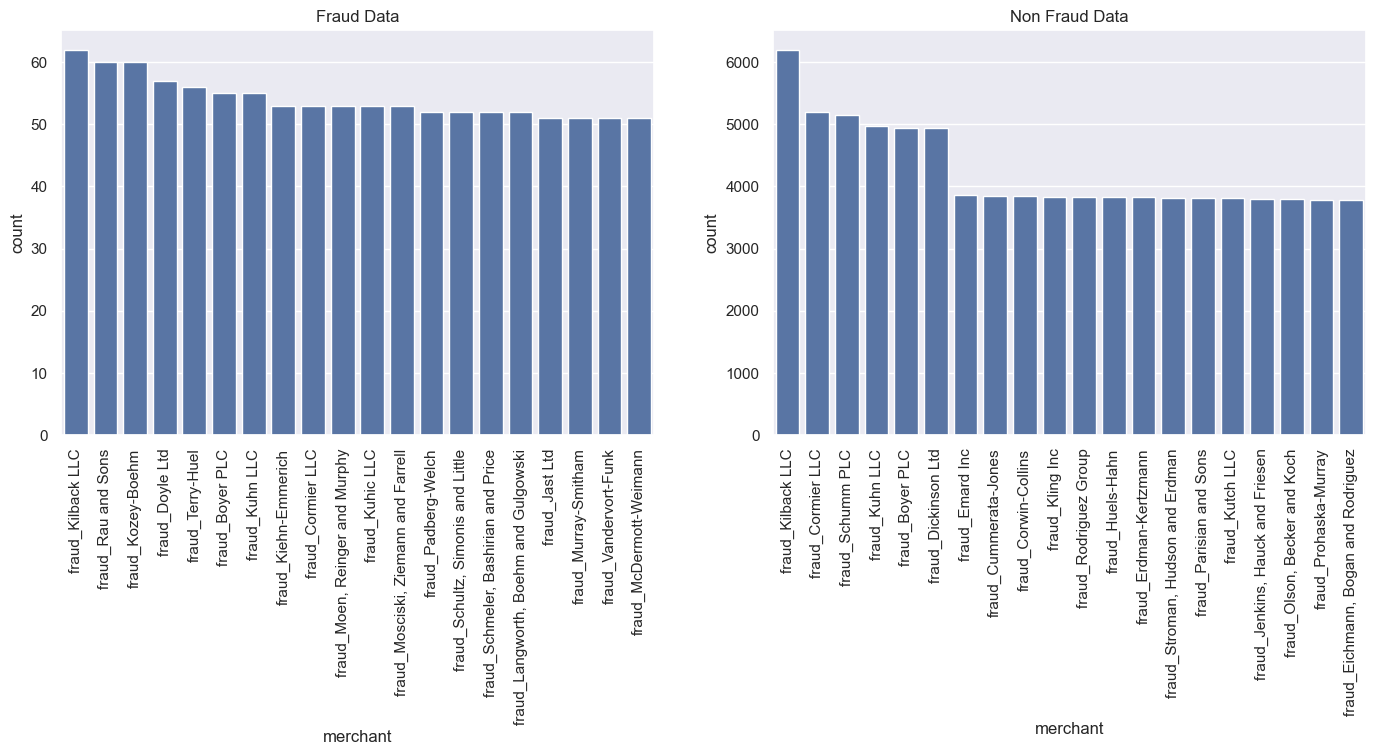

In [186]:
#plotting fraud and non-fraud transactions among different merchants

value_counts = df_fraud['merchant'].value_counts(normalize=True)

# Set a threshold (e.g., only include categories that make up at least 30% of the data)
threshold = 0.30
top_categories = value_counts[value_counts >= threshold].index

# Filter the DataFrame
df_filtered1 = df_fraud[df_fraud['merchant'].isin(top_categories)]

fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.countplot(x= df_fraud['merchant'], data= df_filtered1, order=df_fraud.merchant.value_counts().iloc[:20].index)
plt.title('Fraud Data')
plt.xticks(rotation = 90)

df_filtered2 = df_nonfraud[df_nonfraud['merchant'].isin(top_categories)]

plt.subplot(1,2,2)
sns.countplot(x= df_nonfraud['merchant'],data= df_filtered2 ,order=df_nonfraud.merchant.value_counts().iloc[:20].index)
plt.title('Non Fraud Data')
plt.xticks(rotation = 90)
plt.show()

Insight:
Count of fraud transactions are high for fraud_Kilback LLC, fraud_Kozey-Boehm and fraud_Rau and Sons merchants.


6.2.15. Distribution of Overall amount, Fraud amount and non Fraud amount.

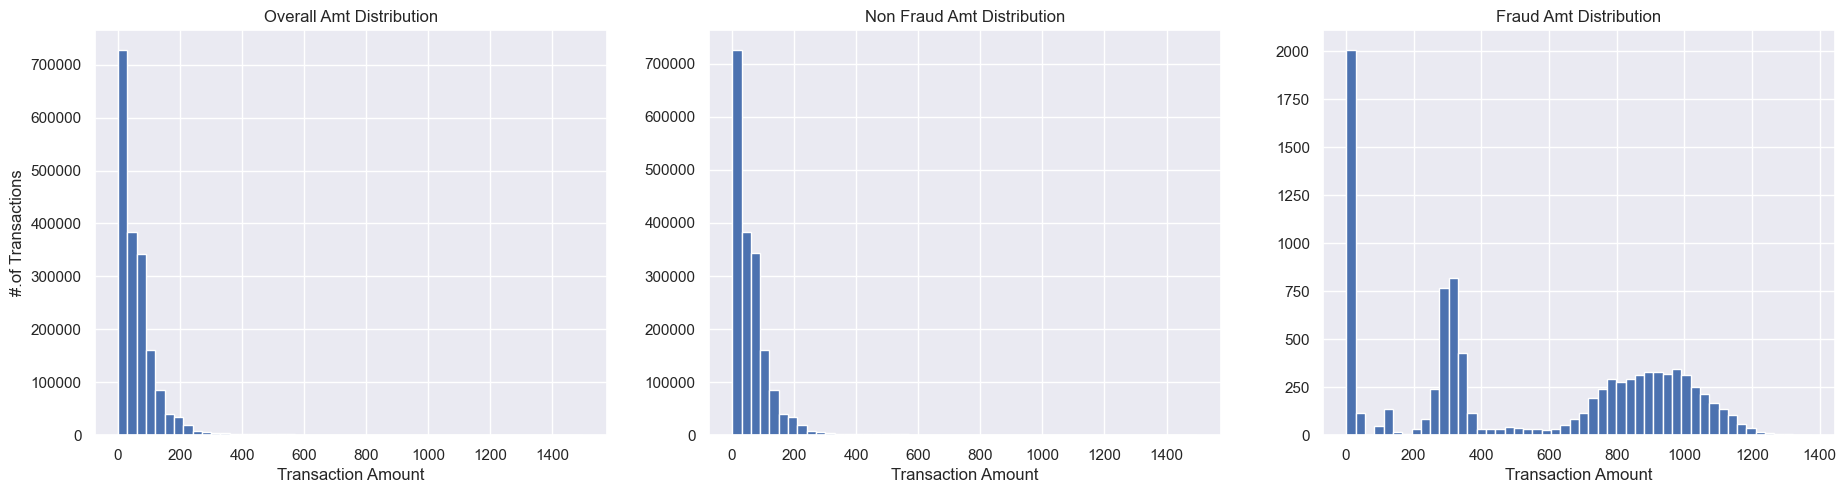

In [187]:
# plotting teh distribution of overall amount, fraud amount and non-fraud amount

fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(fraud_dataset[fraud_dataset['amt']<=1500]['amt'], bins=50)
ax[1].hist(fraud_dataset[(fraud_dataset['is_fraud']==0) & (fraud_dataset['amt']<=1500)]['amt'], bins=50)
ax[2].hist(fraud_dataset[(fraud_dataset['is_fraud']==1) & (fraud_dataset['amt']<=1500)]['amt'], bins=50)

ax[0].set_title('Overall Amt Distribution')
ax[1].set_title('Non Fraud Amt Distribution')
ax[2].set_title('Fraud Amt Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('#.of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

Insight:
1. the fraudulant amount is more distributed than non-Fraud Amount.
2. More number of frauds are happening at smaller amounts.



6.2162. Amount Spent on different category and State_bin(Region) for Fraud Transactions data

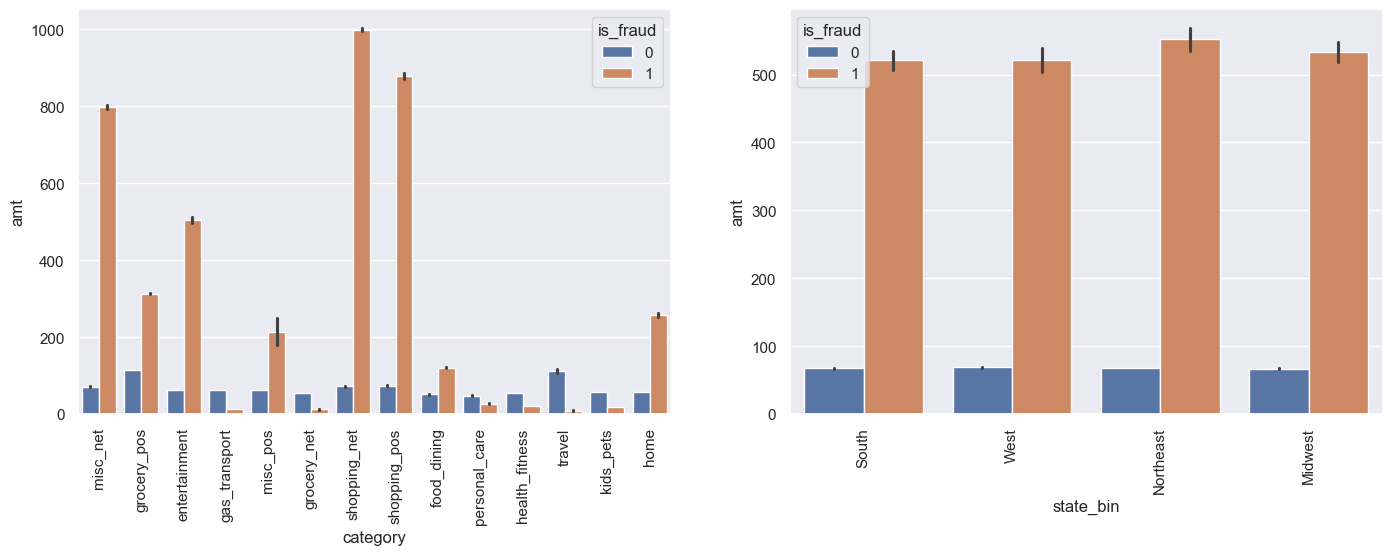

In [188]:
#plotting fraud Amount Spent on different category and State_bin(Region) for Fraud Transactions data

fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='category', y='amt', hue='is_fraud', data=fraud_dataset)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='state_bin',y='amt',hue='is_fraud',data=fraud_dataset)
plt.xticks(rotation = 90)
plt.show()

insight:

1. The maximum amount for fraud transactions were the highest in shopping_net, shopping_pos, misc_net category
2. The amount spent for fraud transactions is almost the same in all regions but a little higher in north-east.

6.2.17. Amount Spent in different states and trans_Day for Fraud Transactions data


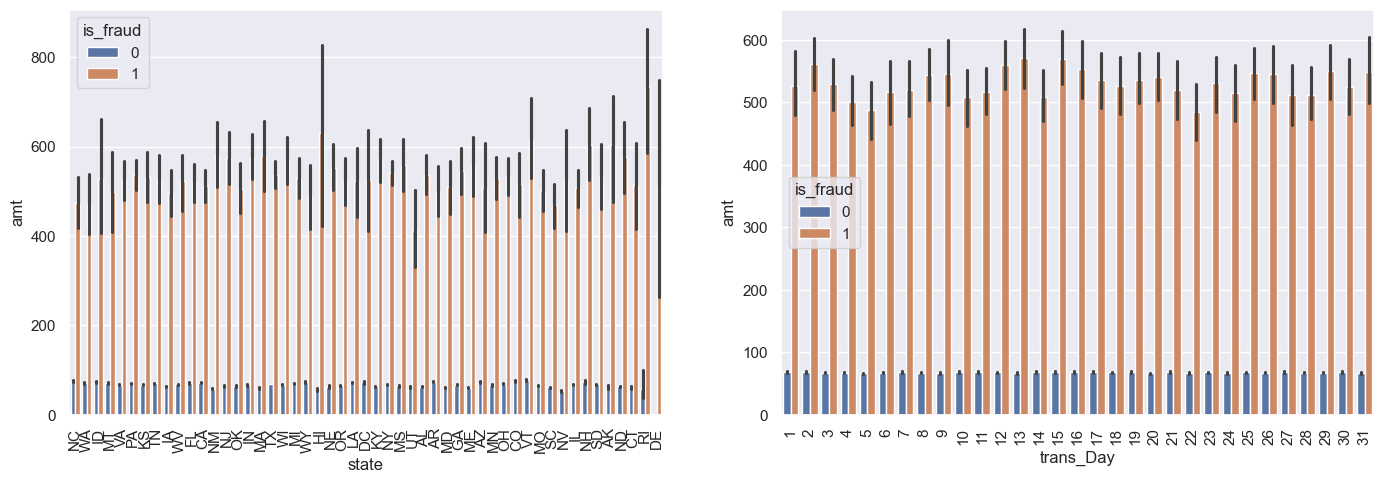

In [189]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='state',y='amt',hue='is_fraud',data=fraud_dataset)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='trans_Day',y='amt',hue='is_fraud',data=fraud_dataset)
plt.xticks(rotation = 90)
plt.show()

Insight:

1. The maximum amount spend for fraud transactions were at RI, HI, DE and VT State.
2. The maximum amount spend for fraud transactions were same through out the days of month.


6.2.18. Amount Spent of people with different job of credit card holders and at merchant for Fraud Transactions data

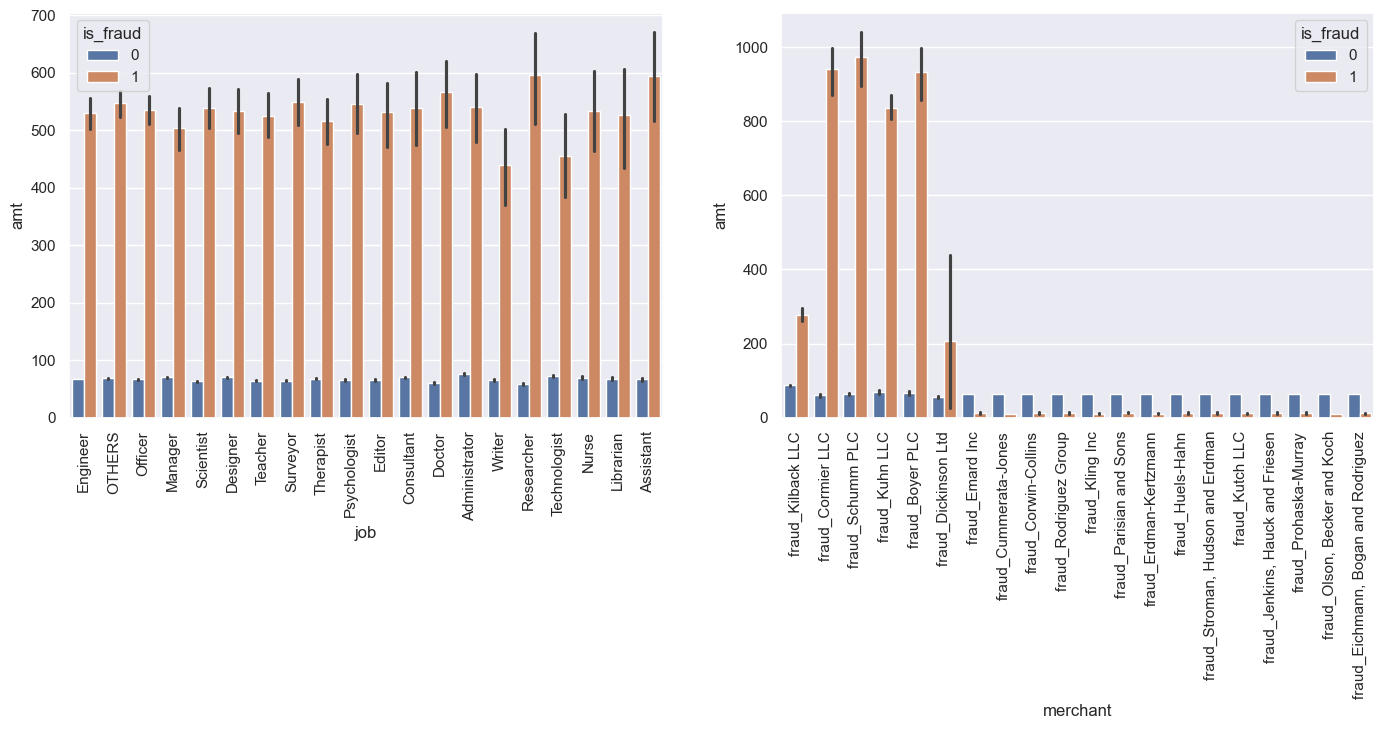

In [190]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='job', y='amt', hue='is_fraud', data=fraud_dataset, 
                                                order=fraud_dataset.job.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='merchant',y='amt',hue='is_fraud',data=fraud_dataset, 
                                            order=fraud_dataset.merchant.value_counts().iloc[:20].index)
plt.xticks(rotation = 90)
plt.show()

Insight:

1. Tha maximum amount for fraudulant transactions were made from credit card holders with jobs - Researchers and Assistant
2. The maximum amount spend for fraud transactions were at 'fraud_Kilback LLC', 'fraud_Cormier LLC', 'fraud_Schumm PLC', 'fraud_Kuhn LLC', 'fraud_Boyer PLC' and 'fraud_Dickinson Ltd' Merchant.


6.2.19. Amount Spent at different trans_Hour and in gender of credit card holders for Fraud Transactions data

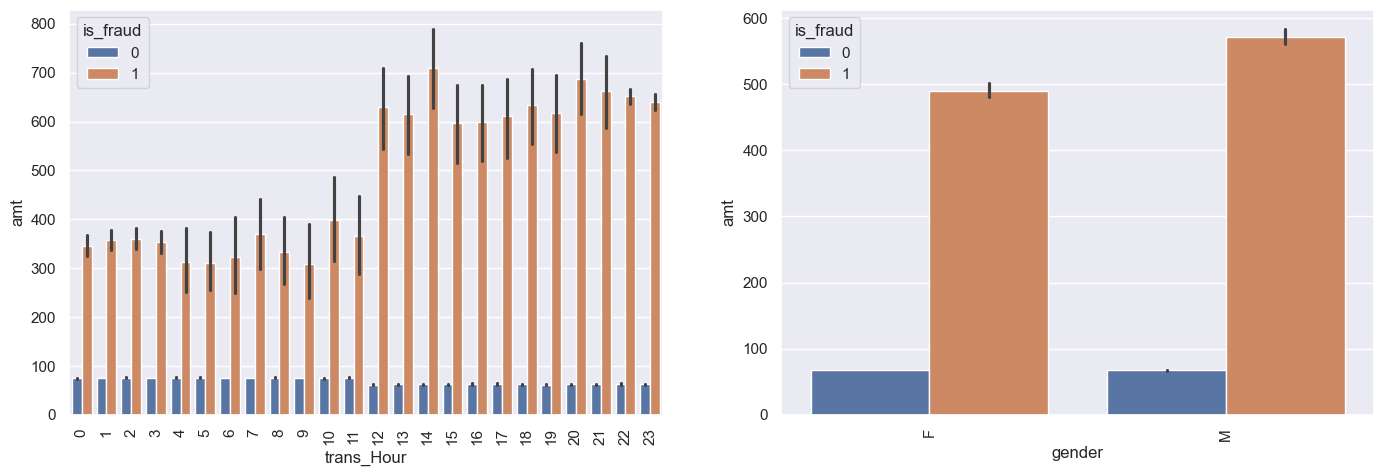

In [191]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='trans_Hour',y='amt',hue='is_fraud',data=fraud_dataset)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='gender',y='amt',hue='is_fraud',data=fraud_dataset)
plt.xticks(rotation = 90)
plt.show()

Insight:

1. The maximum amount spend for fruad transactions were done mostly between 12 to 23 Hr
2. The maximum amount spend for fruad transactions were done on Credit card Holders who were MEN.


6.2.20. Amount Spent at different trans_Month and trans_weekday for Fraud Transactions data

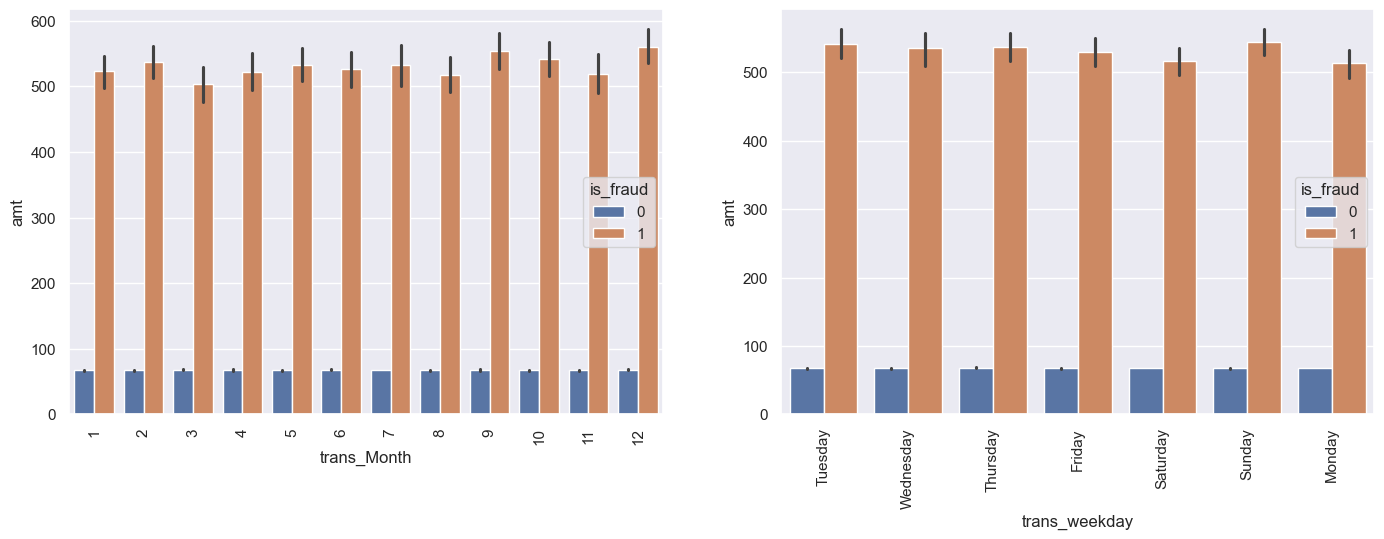

In [192]:
fig= plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(x='trans_Month', y='amt',hue='is_fraud',data=fraud_dataset)
plt.xticks(rotation = 90)

plt.subplot(1,2,2)
sns.barplot(x='trans_weekday', y='amt',hue='is_fraud',data=fraud_dataset)
plt.xticks(rotation = 90)
plt.show()

Insight:

1. Nearly same amount was spend for fruad transactions through out all the Months.
2. Nearly same amount was spend for fruad transactions through out the Weekdays.

6.2.21 Number of Fraud transactions Done throughout the year

In [193]:
#filtering fraud transactions from the dataset

df_fraud_transactions = fraud_dataset[fraud_dataset['is_fraud']==1]

df_timeline = df_fraud_transactions.groupby(df_fraud_transactions['trans_year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline.columns = ['trans_year_month','num_of_fraud_transactions','fraud_customers']
df_timeline.head()

trans_year_month  num_of_fraud_transactions  fraud_customers
0          2019-01                        506               50
1          2019-02                        517               53
2          2019-03                        494               49
3          2019-04                        376               41
4          2019-05                        408               42

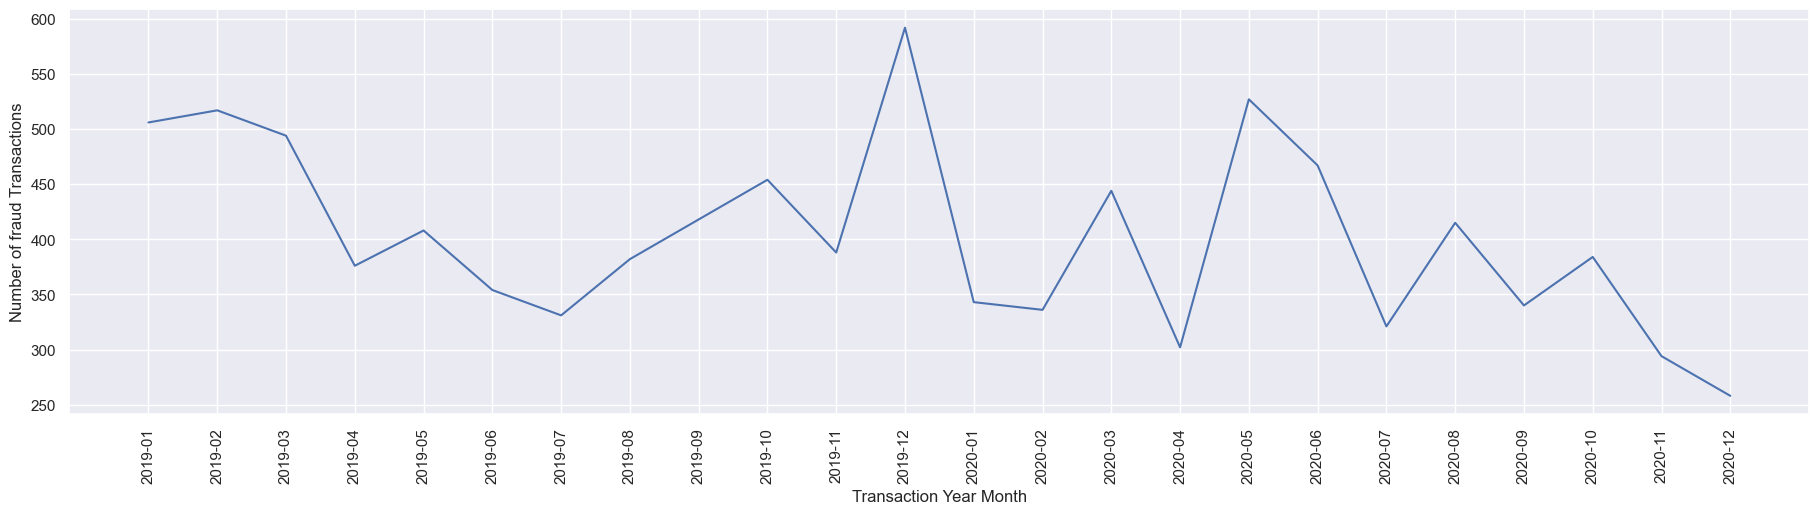

In [194]:
#plotting the count of transactions against the months in a year

x = np.arange(0,len(df_timeline),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline['num_of_fraud_transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline['trans_year_month'], rotation = 90)
#plt.xticks(rotation = 90)

ax.set_xlabel('Transaction Year Month')
ax.set_ylabel('Number of fraud Transactions')
plt.show()

INsight:

The highest number of fraudulant transactions occured in Dec,around the time of new year.
Later peaks were observed in march, may and August.

6.2.22 Count of Fraud Customers through out the year

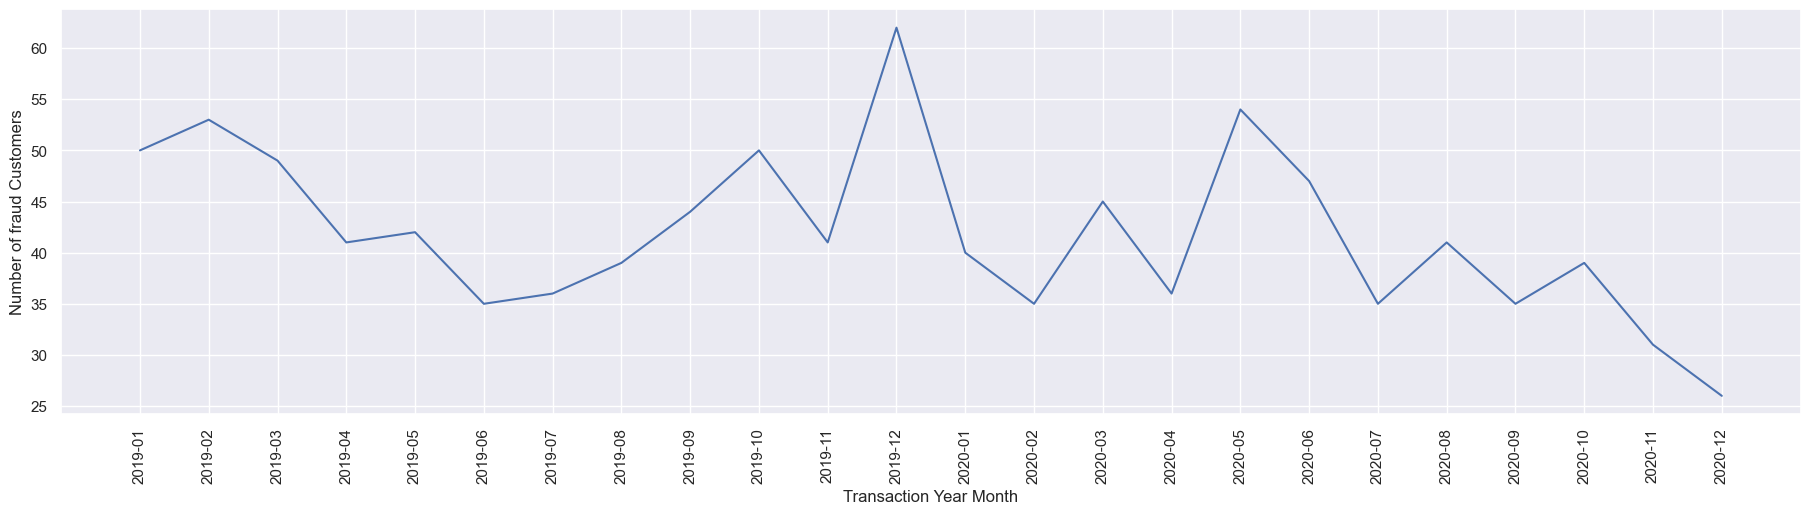

In [195]:

x = np.arange(0,len(df_timeline),1)

fig, ax = plt.subplots(1,1,figsize=(20,5))
ax.plot(x,df_timeline['fraud_customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline['trans_year_month'], rotation = 90)
#plt.xticks(rotation = 90)

ax.set_xlabel('Transaction Year Month')
ax.set_ylabel('Number of fraud Customers')
plt.show()

Insight:

1. The count of fraud customers were high in Dec 2020 , May 2020 and Feb,2019 

6.3 COST BENEFIT ANALYSIS- PART 1(before applying the model)


6.3.1 Average number of transactions per month 

In [196]:
fraud_dataset.shape

(1852394, 40)

In [197]:
Average_number_of_transactions_per_month= fraud_dataset.shape[0]/24
Average_number_of_transactions_per_month

77183.08333333333

6.3.2 Average number of fraudulent transaction per month

In [198]:
fraudulent_transactions= fraud_dataset[fraud_dataset["is_fraud"]==1]

In [199]:
Average_number_of_fraud_transactions_per_month= fraudulent_transactions.shape[0]/24
Average_number_of_fraud_transactions_per_month

402.125

6.3.3 Average amount per fraud transaction 

In [200]:
fraudulent_transactions.shape

(9651, 40)

In [201]:
amount_total=fraudulent_transactions['amt'].sum()
amount_total

5121413.290000001

In [202]:
Average_amount_per_fraud_transaction= amount_total/fraudulent_transactions.shape[0]
Average_amount_per_fraud_transaction

530.661412288882

###                           Cost Benefit Analysis
          Questions                                           Answer
    1. Average number of transactions per month               77183.083       
    2. Average number of fraudulent transaction per month     402.125
    3. Average amount per fraud transaction                   530.661412288882


7. Preparing the data for modelling

In [203]:
# checcking the columns of the dataset

fraud_dataset.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop',
       'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'trans_date', 'trans_time', 'state_bin', 'age',
       'trans_Year', 'trans_year_month', 'trans_Month', 'trans_Hour',
       'trans_Day', 'trans_weekday', 'dist', 'prev_merch_lat',
       'prev_merch_long', 'time_since_prev_transaction',
       'distance_between_merchants', 'age_bin', 'hist_trans_30d',
       'hist_trans_24h', 'hist_trans_avg_amt_30d', 'hist_trans_avg_amt_24h'],
      dtype='object')

In [204]:
# checking the shape of the dataset

fraud_dataset.shape

(1852394, 40)

In [205]:
#check the correlation amongst the features

corr = fraud_dataset.corr()
corr

cc_num       amt       zip       lat      long  \
cc_num                       1.000000  0.001826  0.041504 -0.058744 -0.048429   
amt                          0.001826  1.000000  0.001979 -0.000670 -0.000735   
zip                          0.041504  0.001979  1.000000 -0.114554 -0.909795   
lat                         -0.058744 -0.000670 -0.114554  1.000000 -0.014744   
long                        -0.048429 -0.000735 -0.909795 -0.014744  1.000000   
city_pop                    -0.009118  0.004921  0.077601 -0.154816 -0.052359   
unix_time                    0.000284 -0.002411  0.001017  0.000741 -0.000574   
merch_lat                   -0.058415 -0.000613 -0.113934  0.993582 -0.014585   
merch_long                  -0.048421 -0.000711 -0.908981 -0.014709  0.999118   
is_fraud                    -0.001125  0.209308 -0.002190  0.002904  0.001022   
age                         -0.000143 -0.010662  0.010347  0.047124 -0.029445   
trans_Year                   0.000443 -0.001266  0.000522  0.001140  0.000012   
trans_Month                 -0.000188 -0.002593  0.001160 -0.000402 -0.001184   
trans_Hour                  -0.000902 -0.024891  0.005947 -0.011259 -0.002082   
trans_Day                   -0.000136  0.000069 -0.000442 -0.000767  0.000115   
dist                         0.003082 -0.000538  0.006750 -0.072658  0.003551   
prev_merch_lat              -0.058419 -0.000647 -0.113932  0.993582 -0.014587   
prev_merch_long             -0.048421 -0.000756 -0.908981 -0.014711  0.999118   
time_since_prev_transaction  0.000018 -0.017322  0.000004  0.000009 -0.000021   
distance_between_merchants   0.002208 -0.000482  0.006271 -0.057633  0.001552   
hist_trans_30d              -0.015239 -0.008234  0.027485 -0.017814 -0.013640   
hist_trans_24h              -0.012473 -0.000160  0.017172 -0.011290 -0.008069   
hist_trans_avg_amt_30d       0.008676  0.085656  0.011571 -0.003571 -0.004776   
hist_trans_avg_amt_24h       0.003501  0.074974  0.003421 -0.002026 -0.000942   

                             city_pop     unix_time  merch_lat  merch_long  \
cc_num                      -0.009118  2.844095e-04  -0.058415   -0.048421   
amt                          0.004921 -2.410965e-03  -0.000613   -0.000711   
zip                          0.077601  1.017156e-03  -0.113934   -0.908981   
lat                         -0.154816  7.411610e-04   0.993582   -0.014709   
long                        -0.052359 -5.740060e-04  -0.014585    0.999118   
city_pop                     1.000000 -1.636392e-03  -0.153863   -0.052329   
unix_time                   -0.001636  1.000000e+00   0.000696   -0.000571   
merch_lat                   -0.153863  6.963900e-04   1.000000   -0.014554   
merch_long                  -0.052329 -5.708020e-04  -0.014554    1.000000   
is_fraud                     0.000325 -1.332879e-02   0.002778    0.000999   
age                         -0.090867 -4.248971e-03   0.046749   -0.029401   
trans_Year                  -0.001660  8.672430e-01   0.001108    0.000010   
trans_Month                 -0.000510  4.967296e-01  -0.000429   -0.001175   
trans_Hour                   0.019949  5.710583e-04  -0.011119   -0.002120   
trans_Day                    0.000654  4.807348e-02  -0.000865    0.000129   
dist                         0.010989 -4.701700e-04  -0.072642    0.003564   
prev_merch_lat              -0.153862  6.981822e-04   0.987226   -0.014555   
prev_merch_long             -0.052329 -5.675790e-04  -0.014551    0.998240   
time_since_prev_transaction  0.000027  2.147606e-07   0.000136   -0.000019   
distance_between_merchants   0.008489  1.670163e-03  -0.057638    0.001508   
hist_trans_30d               0.018557  1.924012e-01  -0.017700   -0.013646   
hist_trans_24h               0.018493  1.389760e-01  -0.011184   -0.008074   
hist_trans_avg_amt_30d       0.027950 -1.244291e-02  -0.003567   -0.004769   
hist_trans_avg_amt_24h       0.006958 -4.532413e-03  -0.002001   -0.000922   

                             is_fraud  ...  trans_Day 

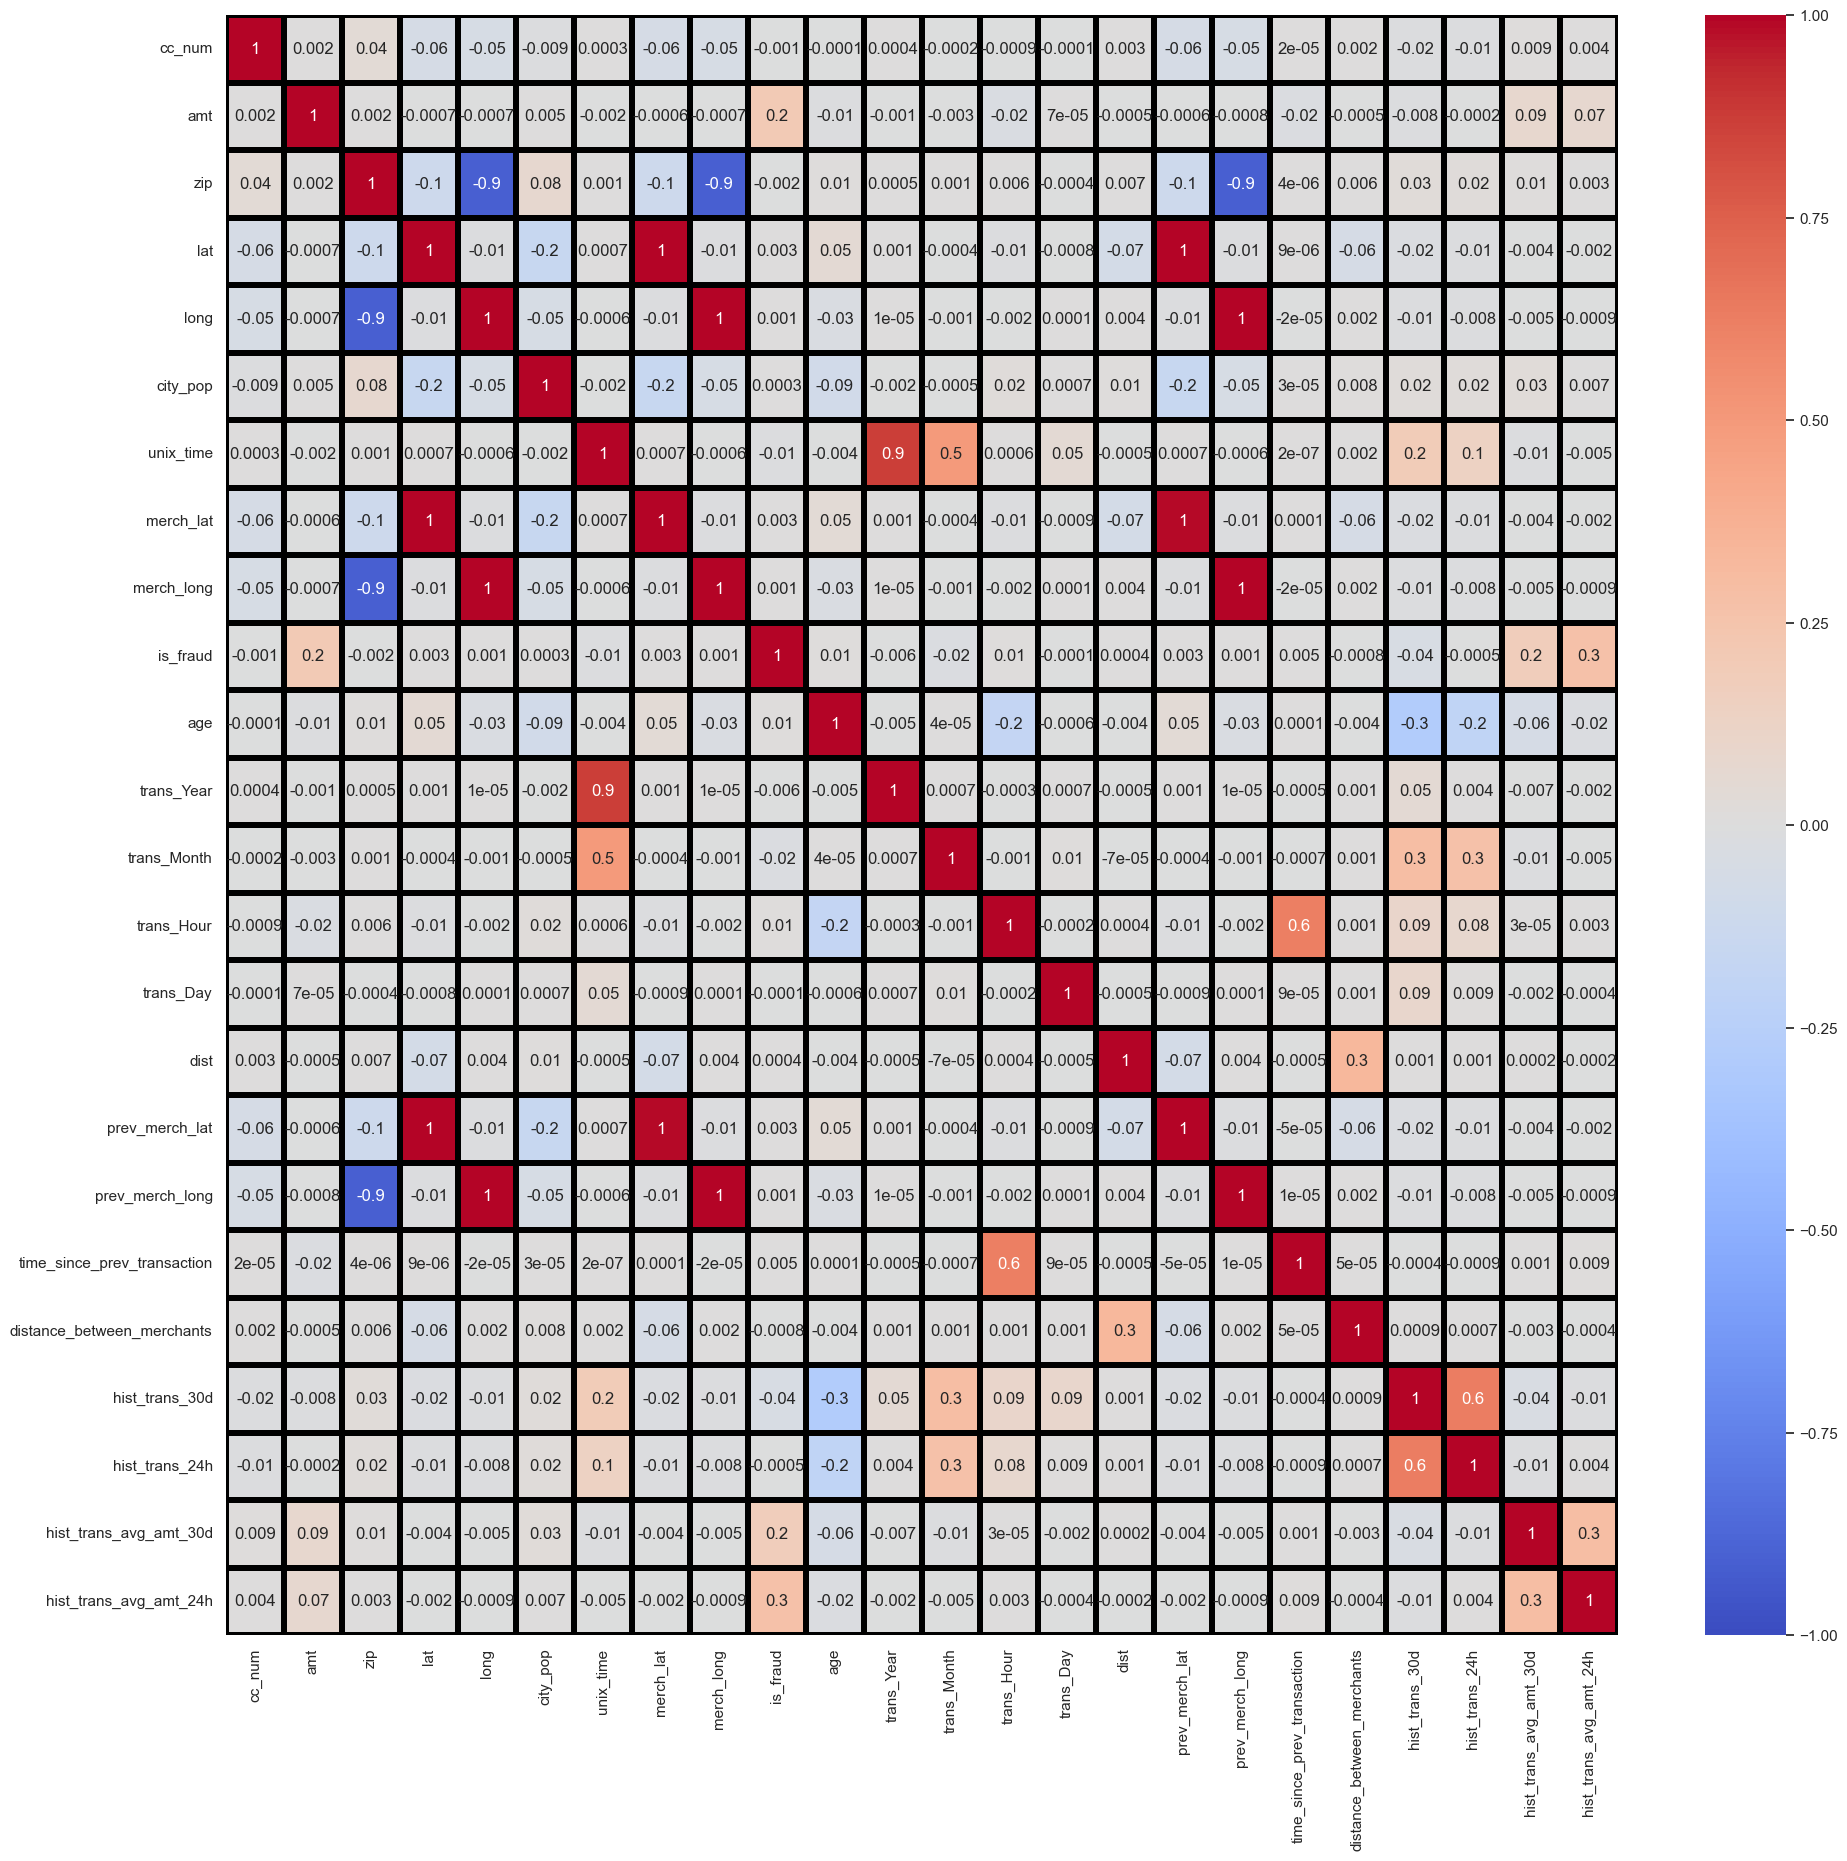

In [206]:
# checking the correlation amongst the variables

plt.figure(figsize=(20,20))
sns.heatmap(fraud_dataset.corr(), annot= True,fmt='.1g', vmin=-1, vmax=1, center= 0,linewidths=3, 
                                                                                        linecolor='black',cmap= 'coolwarm')
plt.show()


7.2. Dropping the variables who have high correlation values

In [207]:
#dropping columns with high correlation value

fraud_dataset= fraud_dataset.drop(['prev_merch_lat','prev_merch_long','merch_lat','merch_long','zip'],axis=1)

fraud_dataset= fraud_dataset.drop(['age_bin','trans_date','unix_time', 'trans_Day','trans_year_month'],axis=1)
fraud_dataset= fraud_dataset.drop(['trans_time','trans_date_trans_time','dob', 'state_bin'],axis=1)

fraud_dataset.shape

(1852394, 26)

In [208]:
#checking the columns after dropping the columns with high correlation value

fraud_dataset.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city',
       'state', 'lat', 'long', 'city_pop', 'job', 'trans_num', 'is_fraud',
       'age', 'trans_Year', 'trans_Month', 'trans_Hour', 'trans_weekday',
       'dist', 'time_since_prev_transaction', 'distance_between_merchants',
       'hist_trans_30d', 'hist_trans_24h', 'hist_trans_avg_amt_30d',
       'hist_trans_avg_amt_24h'],
      dtype='object')

In [209]:
fraud_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 26 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   cc_num                       int64  
 1   merchant                     object 
 2   category                     object 
 3   amt                          float64
 4   gender                       object 
 5   street                       object 
 6   city                         object 
 7   state                        object 
 8   lat                          float64
 9   long                         float64
 10  city_pop                     int64  
 11  job                          object 
 12  trans_num                    object 
 13  is_fraud                     int64  
 14  age                          int64  
 15  trans_Year                   int64  
 16  trans_Month                  int64  
 17  trans_Hour                   int64  
 18  trans_weekday                object 
 19  

7.3. Creartion of Dummy variables

In [210]:
# Creating a dummy variable for 'Category' variable and dropping the first one.
Catg_dummy = pd.get_dummies(fraud_dataset['category'], drop_first=True, prefix='catg')

# Creating a dummy variable for 'Gender' variable and dropping the first one.
gender_dummy = pd.get_dummies(fraud_dataset['gender'], drop_first=True, prefix='gender')

# Creating a dummy variable for 'Weekday' variable and dropping the first one.
week_dummy = pd.get_dummies(fraud_dataset['trans_weekday'], drop_first=True, prefix='weekday')

# Creating a dummy variable for 'Month' variable and dropping the first one.
month_dummy = pd.get_dummies(fraud_dataset['trans_Month'], drop_first=True, prefix='month')

# Creating a dummy variable for 'Year' variable and dropping the first one.
year_dummy = pd.get_dummies(fraud_dataset['trans_Year'], drop_first=True, prefix='year')

# Adding the results to the master dataframe
fraud_dataset = pd.concat([fraud_dataset, Catg_dummy, gender_dummy, week_dummy, month_dummy, year_dummy], axis=1)

# We have created dummies for the variable, so we can drop them
fraud_dataset= fraud_dataset.drop(['category', 'gender', 'trans_weekday', 'trans_Month', 'trans_Year'], axis=1)
fraud_dataset.shape

(1852394, 53)

In [211]:
#checking the head of the dataset after the creation of dummy variables


fraud_dataset.head()

cc_num                            merchant     amt  \
0  2703186189652095          fraud_Rippin, Kub and Mann    4.97   
1      630423337322     fraud_Heller, Gutmann and Zieme  107.23   
2    38859492057661                fraud_Lind-Buckridge  220.11   
3  3534093764340240  fraud_Kutch, Hermiston and Farrell   45.00   
4   375534208663984                 fraud_Keeling-Crist   41.96   

                         street            city state      lat      long  \
0                561 Perry Cove  Moravian Falls    NC  36.0788  -81.1781   
1  43039 Riley Greens Suite 393          Orient    WA  48.8878 -118.2105   
2      594 White Dale Suite 530      Malad City    ID  42.1808 -112.2620   
3   9443 Cynthia Court Apt. 038         Boulder    MT  46.2306 -112.1138   
4              408 Bradley Rest        Doe Hill    VA  38.4207  -79.4629   

   city_pop           job  ... month_4  month_5  month_6  month_7  month_8  \
0      3495  Psychologist  ...       0        0        0        0        0   
1       149       Teacher  ...       0        0        0        0        0   
2      4154       Officer  ...       0        0        0        0        0   
3      1939        OTHERS  ...       0        0        0        0        0   
4        99     Therapist  ...       0        0        0        0        0   

   month_9  month_10  month_11  month_12  year_2020  
0        0         0         0         0          0  
1        0         0         0         0          0  
2        0         0         0         0          0  
3        0         0         0         0          0  
4        0         0         0         0          0  

[5 rows x 53 columns]


7.4. Label encoding

In [212]:
# Import label encoder 
from sklearn import preprocessing 
  
# creation of label_encoder object  
label_encoder = preprocessing.LabelEncoder() 
  
# Encoding labels of following columns.  
fraud_dataset['state']= label_encoder.fit_transform(fraud_dataset['state']) 
fraud_dataset['job']= label_encoder.fit_transform(fraud_dataset['job']) 
fraud_dataset['merchant']= label_encoder.fit_transform(fraud_dataset['merchant'])
fraud_dataset['city']= label_encoder.fit_transform(fraud_dataset['city'])
fraud_dataset['street']= label_encoder.fit_transform(fraud_dataset['street'])

In [213]:
# checking the head of the dataset

fraud_dataset.head()

cc_num  merchant     amt  street  city  state      lat      long  \
0  2703186189652095       514    4.97     576   532     27  36.0788  -81.1781   
1      630423337322       241  107.23     439   619     47  48.8878 -118.2105   
2    38859492057661       390  220.11     610   474     13  42.1808 -112.2620   
3  3534093764340240       360   45.00     945    84     26  46.2306 -112.1138   
4   375534208663984       297   41.96     422   217     45  38.4207  -79.4629   

   city_pop  job  ... month_4  month_5  month_6  month_7  month_8  month_9  \
0      3495   70  ...       0        0        0        0        0        0   
1       149   82  ...       0        0        0        0        0        0   
2      4154   61  ...       0        0        0        0        0        0   
3      1939   59  ...       0        0        0        0        0        0   
4        99   86  ...       0        0        0        0        0        0   

   month_10  month_11  month_12  year_2020  
0         0         0         0          0  
1         0         0         0          0  
2         0         0         0          0  
3         0         0         0          0  
4         0         0         0          0  

[5 rows x 53 columns]

In [214]:
#checking the columns of the dataset

fraud_dataset.columns

Index(['cc_num', 'merchant', 'amt', 'street', 'city', 'state', 'lat', 'long',
       'city_pop', 'job', 'trans_num', 'is_fraud', 'age', 'trans_Hour', 'dist',
       'time_since_prev_transaction', 'distance_between_merchants',
       'hist_trans_30d', 'hist_trans_24h', 'hist_trans_avg_amt_30d',
       'hist_trans_avg_amt_24h', 'catg_food_dining', 'catg_gas_transport',
       'catg_grocery_net', 'catg_grocery_pos', 'catg_health_fitness',
       'catg_home', 'catg_kids_pets', 'catg_misc_net', 'catg_misc_pos',
       'catg_personal_care', 'catg_shopping_net', 'catg_shopping_pos',
       'catg_travel', 'gender_M', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'month_2', 'month_3', 'month_4', 'month_5',
       'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
       'month_12', 'year_2020'],
      dtype='object')

In [215]:
#checking info of the dataset 

fraud_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 1852393
Data columns (total 53 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   cc_num                       int64  
 1   merchant                     int32  
 2   amt                          float64
 3   street                       int32  
 4   city                         int32  
 5   state                        int32  
 6   lat                          float64
 7   long                         float64
 8   city_pop                     int64  
 9   job                          int32  
 10  trans_num                    object 
 11  is_fraud                     int64  
 12  age                          int64  
 13  trans_Hour                   int64  
 14  dist                         float64
 15  time_since_prev_transaction  float64
 16  distance_between_merchants   float64
 17  hist_trans_30d               float64
 18  hist_trans_24h               float64
 19  

7.5. Splitting the Dataset into test and train dataset

In [216]:
# seperating the target variable

# Putting feature variable to X
X = fraud_dataset.drop(['is_fraud','cc_num', 'trans_num'],axis=1)

# Putting response variable to y
y = fraud_dataset['is_fraud']

In [217]:
#checking the shape of X and y dataset

X.shape, y.shape

((1852394, 50), (1852394,))

In [218]:
# checking the head of X dataset

X.head()

merchant     amt  street  city  state      lat      long  city_pop  job  \
0       514    4.97     576   532     27  36.0788  -81.1781      3495   70   
1       241  107.23     439   619     47  48.8878 -118.2105       149   82   
2       390  220.11     610   474     13  42.1808 -112.2620      4154   61   
3       360   45.00     945    84     26  46.2306 -112.1138      1939   59   
4       297   41.96     422   217     45  38.4207  -79.4629        99   86   

   age  ...  month_4  month_5  month_6  month_7  month_8  month_9  month_10  \
0   36  ...        0        0        0        0        0        0         0   
1   46  ...        0        0        0        0        0        0         0   
2   62  ...        0        0        0        0        0        0         0   
3   57  ...        0        0        0        0        0        0         0   
4   38  ...        0        0        0        0        0        0         0   

   month_11  month_12  year_2020  
0         0         0          0  
1         0         0          0  
2         0         0          0  
3         0         0          0  
4         0         0          0  

[5 rows x 50 columns]

7.5.1 Test-Train Split

In [219]:
#Splitting the dataset into train and test dataset 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify= y, random_state=100)

# checking the shape of train and test dataset

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)



X_train:  (1296675, 50)
y_train:  (1296675,)
X_test:  (555719, 50)
y_test:  (555719,)


In [220]:
# checking the head of the X_train

X_train.head()

merchant     amt  street  city  state      lat     long  city_pop  \
1489446       415  108.23     952   811     18  30.5668 -90.4820      8512   
887864        155   60.29     782   580     14  39.3036 -89.2853      3458   
115189        384    9.81     866   421     34  43.2363 -78.3138       275   
108605         30   27.15     613   730     23  44.9913 -92.9487    753116   
67953         222  234.47     164   352     35  41.2419 -81.7453      7646   

         job  age  ...  month_4  month_5  month_6  month_7  month_8  month_9  \
1489446   12   73  ...        0        0        0        0        1        0   
887864    79   39  ...        0        0        0        0        0        0   
115189    82   60  ...        0        0        0        0        0        0   
108605    61   53  ...        0        0        0        0        0        0   
67953     51   36  ...        0        0        0        0        0        0   

         month_10  month_11  month_12  year_2020  
1489446         0         0         0          1  
887864          0         0         1          0  
115189          0         0         0          0  
108605          0         0         0          0  
67953           0         0         0          0  

[5 rows x 50 columns]

In [221]:
#checking the head of X_test

X_test.head()

merchant     amt  street  city  state      lat      long  city_pop  \
84212           8    6.19     432   120     35  40.8027  -81.3739    192805   
679039        571   72.98     517   328     43  30.2816  -99.2410      2395   
1552913       210  101.37     188   877     29  41.4193  -99.3844        73   
1146122       548   62.08     818    76      4  39.8127 -120.6405      1725   
1813821       408  116.45     959   649      1  34.3470  -87.7154      5778   

         job  age  ...  month_4  month_5  month_6  month_7  month_8  month_9  \
84212     79   61  ...        0        0        0        0        0        0   
679039    64   31  ...        0        0        0        0        0        0   
1552913   23   89  ...        0        0        0        0        0        1   
1146122   30   57  ...        1        0        0        0        0        0   
1813821   29   72  ...        0        0        0        0        0        0   

         month_10  month_11  month_12  year_2020  
84212           0         0         0          0  
679039          1         0         0          0  
1552913         0         0         0          1  
1146122         0         0         0          1  
1813821         0         0         1          1  

[5 rows x 50 columns]


Checking for Class imbalance in Train & Test

In [222]:
y_train.value_counts(normalize=True)

0    0.99479
1    0.00521
Name: is_fraud, dtype: float64

In [223]:
y_test.value_counts(normalize=True)

0    0.994791
1    0.005209
Name: is_fraud, dtype: float64

7.6. Treating for Class imbalance in Train & Test 

SMOTE - Synthetic Minority Oversampling Technique Creates new "Synthetic" observations

In [224]:

print("Before SMOTE, counts of label '0'&'1': {} \n".format(sorted(Counter(y_train).items())))

# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
print("After SMOTE, counts of label '0'&'1': {}".format(sorted(Counter(y_resampled_smt).items())))
print(len(X_resampled_smt))

Before SMOTE, counts of label '0'&'1': [(0, 1289919), (1, 6756)] 

After SMOTE, counts of label '0'&'1': [(0, 1289919), (1, 1289919)]
2579838



7.7. ADASYN

In [225]:

# ADASYN
print("Before ADASYN, counts of label '0'&'1': {} \n".format(sorted(Counter(y_train).items())))

from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)

print("After ADASYN, counts of label '0'&'1': {}".format(sorted(Counter(y_resampled_ada).items())))

print(len(X_resampled_ada))

Before ADASYN, counts of label '0'&'1': [(0, 1289919), (1, 6756)] 

After ADASYN, counts of label '0'&'1': [(0, 1289919), (1, 1290809)]
2580728



8. Model Building

8.1.1 Using Logistic Regression

In [226]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_resampled_smt, y_resampled_smt)

LogisticRegression(random_state=42)

In [227]:
#finding y-predicted values using logistic regression model

y_train_pred_lg_smt = logreg.predict(X_resampled_smt)
y_test_pred_lg_smt = logreg.predict(X_test)

In [228]:
#checking the metrics for model efficiency

print(confusion_matrix(y_resampled_smt, y_train_pred_lg_smt))
print(classification_report(y_resampled_smt, y_train_pred_lg_smt))

[[1233168   56751]
 [ 142743 1147176]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93   1289919
           1       0.95      0.89      0.92   1289919

    accuracy                           0.92   2579838
   macro avg       0.92      0.92      0.92   2579838
weighted avg       0.92      0.92      0.92   2579838



Accuracy:  95.5%
F1 score:  16.8%
Recall:  87.1%
Precision:  9.3%
ROC for the test dataset: 95.8%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    552824
           1       0.09      0.87      0.17      2895

    accuracy                           0.96    555719
   macro avg       0.55      0.91      0.57    555719
weighted avg       0.99      0.96      0.97    555719



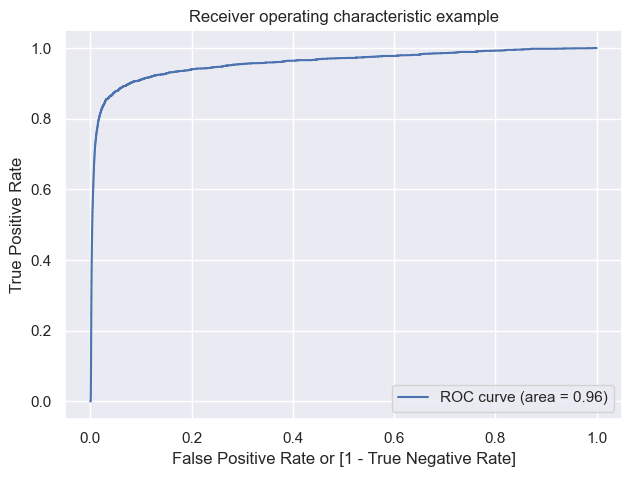


 Confussion Matrix:
 [[528212  24612]
 [   374   2521]]


In [229]:
# making predictions on the test set

print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_lg_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_lg_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_lg_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_lg_smt)))
pred_probs_test = logreg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Classification Report:\n', classification_report(y_test, y_test_pred_lg_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_lg_smt))

In [230]:
# checking confusion metrics

confusion_lg_smt = metrics.confusion_matrix( y_test, y_test_pred_lg_smt)

TN = confusion_lg_smt[0,0] # true negatives 
TP = confusion_lg_smt[1,1] # true positives
FP = confusion_lg_smt[0,1] # false positives
FN = confusion_lg_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  87.1%
Specificity:  95.5%
False postive rate: 4.5%
Positive predictive value: 9.3%
Negative predictive value: 99.9%


INsight:

1. Model seems to work well on test data with accuracy of 0.92

8.2 Model 2: Decision Tree

8.2.1 Using Decision Trees (Default Hyperparameters) for SMOTE data

In [231]:
# creating a decision tree with the default hyper parameters for SMOTE data

dt_smt_default = DecisionTreeClassifier(random_state=42)

In [232]:
# fitting the decision tree with default hyperparameters

dt_smt_default.fit(X_resampled_smt, y_resampled_smt)

DecisionTreeClassifier(random_state=42)

In [233]:
# predicting the y_train and y_test

y_train_pred_dt_smt = dt_smt_default.predict(X_resampled_smt)
y_test_pred_dt_smt = dt_smt_default.predict(X_test)


In [234]:
# printing classification report for the decision tree classifier with defualt parameters

print(classification_report(y_resampled_smt, y_train_pred_dt_smt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



Accuracy:  99.6%
F1 score:  66.5%
Recall:  84.7%
Precision:  54.8%
ROC for the test dataset: 92.2%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.55      0.85      0.67      2895

    accuracy                           1.00    555719
   macro avg       0.77      0.92      0.83    555719
weighted avg       1.00      1.00      1.00    555719



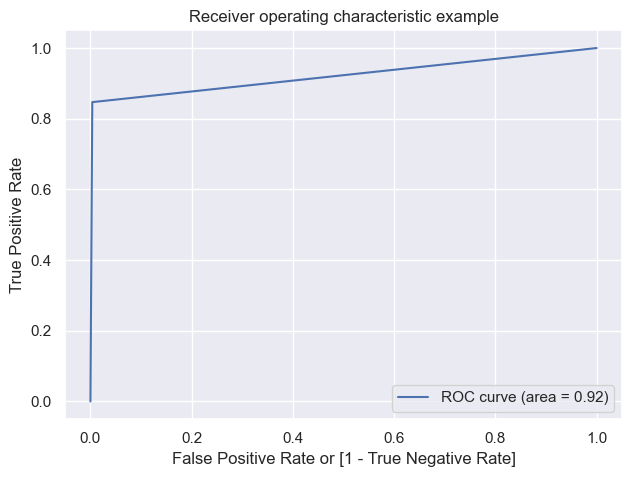


 Confussion Matrix:
 [[550802   2022]
 [   443   2452]]


In [235]:
# making predictions on the test set

print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_dt_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_dt_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_dt_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_dt_smt)))
pred_probs_test = dt_smt_default.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Classification Report:\n', classification_report(y_test, y_test_pred_dt_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_dt_smt))

Insight:

Since we get a value of 92% for the ROC curve area, we can say that the model seems to work excellent with the test data.

In [236]:
# checking confusion metrics parameters

confusion_dt_smt = metrics.confusion_matrix( y_test, y_test_pred_dt_smt)

TN = confusion_dt_smt[0,0] # true negatives 
TP = confusion_dt_smt[1,1] # true positives
FP = confusion_dt_smt[0,1] # false positives
FN = confusion_dt_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  84.7%
Specificity:  99.6%
False postive rate: 0.4%
Positive predictive value: 54.8%
Negative predictive value: 99.9%


8.1.2 Using Decision Trees (Default Hyperparameters) for ADASYN data

In [237]:
# creating a decision tree with the default hyper parameters for ADASYN Data

dt_ada_default = DecisionTreeClassifier(random_state=42)

In [238]:
# Fitting the decision tree with default hyperparameters

dt_ada_default.fit(X_resampled_ada, y_resampled_ada)

DecisionTreeClassifier(random_state=42)

In [239]:
# predicting y_train and y_test using decision trees classifier with default hyperparameters

y_train_pred_dt_ada = dt_ada_default.predict(X_resampled_ada)
y_test_pred_dt_ada = dt_ada_default.predict(X_test)

In [240]:
# classification report


print(classification_report(y_resampled_ada, y_train_pred_dt_ada))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1290809

    accuracy                           1.00   2580728
   macro avg       1.00      1.00      1.00   2580728
weighted avg       1.00      1.00      1.00   2580728



Accuracy:  99.6%
F1 score:  67.4%
Recall:  84.1%
Precision:  56.3%
ROC for the test dataset: 91.9%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.56      0.84      0.67      2895

    accuracy                           1.00    555719
   macro avg       0.78      0.92      0.84    555719
weighted avg       1.00      1.00      1.00    555719



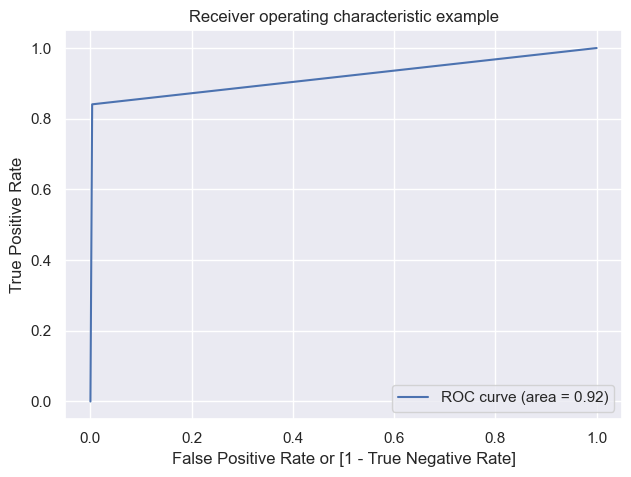


 Confussion Matrix:
 [[550932   1892]
 [   461   2434]]


In [241]:
# Making predictions on the test set

print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_dt_ada)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_dt_ada)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_dt_ada)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_dt_ada)))
pred_probs_test = dt_ada_default.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Classification Report:\n', classification_report(y_test, y_test_pred_dt_ada))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_dt_ada))

INsight:

With an area of 92%, the model does excellent on test data

In [242]:
# observing the confusion metrics

confusion_dt_ada = confusion_matrix( y_test, y_test_pred_dt_ada)

TN = confusion_dt_ada[0,0] # true negatives 
TP = confusion_dt_ada[1,1] # true positives
FP = confusion_dt_ada[0,1] # false positives
FN = confusion_dt_ada[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  84.1%
Specificity:  99.7%
False postive rate: 0.3%
Positive predictive value: 56.3%
Negative predictive value: 99.9%


Classification report from Decision Tree (Default Hyperparameters) on Test Data

In [ ]:
     precision(%)  |  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative 
Positive predictive|(sensitivity)|            |            |          |              |  rate (%)    | predictive 
       value(%)    |             |            |            |          |              |              | value(%)
-------------------|-------------|------------|------------|----------|--------------|--------------|------------- 
SMOTE data =>  54.8|    84.7     |   66.5     |   99.6     |    92.2  |     99.6     |     0.4      |   99.9
-------------------|-------------|------------|------------|----------|--------------|--------------|-------------
ADASYN data => 56.3|    84.1     |   67.4     |   99.6     |    91.9  |     99.7     |     0.3      |   99.9

8.1.3 Hyper-parameter tuning for the Decision Tree for SMOTE data

# Because we are getting high values for ROC area and recall value for SMOTE Test data, we would do hyper parameter tuning

In [243]:
dt = DecisionTreeClassifier(random_state=42)

In [244]:
params = {
    'max_depth': [10,20],
    'min_samples_leaf': [5,10],
    'min_samples_split': [5,10],
     }

In [245]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           verbose=1,
                            cv=4,
                            n_jobs=-1,
                            scoring="recall")

In [246]:
# building the Decision TRee classifier object with the best estimator

dt_best = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=0)
dt_best.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=0)

In [247]:
# predicting the target variable with new DT model
y_train_pred_dt_hp_smt = dt_best.predict(X_resampled_smt)
y_test_pred_dt_hp_smt = dt_best.predict(X_test)

In [248]:
#printing classification report for the model

print(classification_report(y_resampled_smt, y_train_pred_dt_hp_smt))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87   1289919
           1       1.00      0.69      0.82   1289919

    accuracy                           0.85   2579838
   macro avg       0.88      0.85      0.84   2579838
weighted avg       0.88      0.85      0.84   2579838



Accuracy:  99.9%
F1 score:  86.4%
Recall:  85.7%
Precision:  87.1%
ROC for the test dataset: 89.5%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.87      0.86      0.86      2895

    accuracy                           1.00    555719
   macro avg       0.94      0.93      0.93    555719
weighted avg       1.00      1.00      1.00    555719



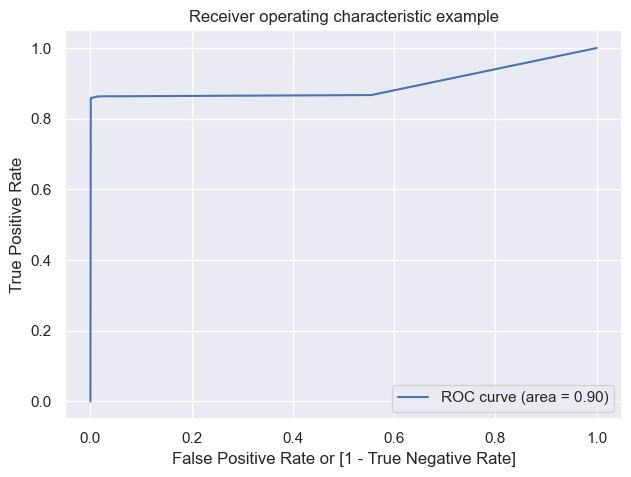


 Confussion Matrix:
 [[552458    366]
 [   415   2480]]


In [249]:
# Making predictions on the test set


print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_dt_hp_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_dt_hp_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_dt_hp_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_dt_hp_smt)))
pred_probs_test = dt_best.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Classification Report:\n', classification_report(y_test, y_test_pred_dt_hp_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_dt_hp_smt))

Insight:

Since we got a value of 0.89, our model seems to be doing good on the test dataset.

In [250]:
confusion_dt_hp_smt = metrics.confusion_matrix( y_test, y_test_pred_dt_hp_smt)

TN = confusion_dt_hp_smt[0,0] # true negatives 
TP = confusion_dt_hp_smt[1,1] # true positives
FP = confusion_dt_hp_smt[0,1] # false positives
FN = confusion_dt_hp_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  85.7%
Specificity:  99.9%
False postive rate: 0.1%
Positive predictive value: 87.1%
Negative predictive value: 99.9%


In [251]:
#preparing a table of top 15 important variables

imp_df = pd.DataFrame({
    "Varname": X_resampled_smt.columns,
    "Imp": dt_best.feature_importances_
})

imp_feat= imp_df.sort_values(by="Imp", ascending=False)
imp_feat.head(15)

Varname       Imp
1                           amt  0.378599
17       hist_trans_avg_amt_24h  0.241602
21             catg_grocery_pos  0.104360
10                   trans_Hour  0.036960
19           catg_gas_transport  0.035914
12  time_since_prev_transaction  0.033302
9                           age  0.032470
14               hist_trans_30d  0.011539
16       hist_trans_avg_amt_30d  0.011477
30                  catg_travel  0.011109
15               hist_trans_24h  0.010669
7                      city_pop  0.007145
13   distance_between_merchants  0.006546
0                      merchant  0.006382
31                     gender_M  0.005883

Conclusion:

1. Based on our Decision Tree (Hyperparameter Tuning) model, the following features are identified which will help to find a fradulent transcation.
    
amt	
hist_trans_avg_amt_24h
catg_grocery_postrans_Hour
catg_gas_transport
time_since_prev_transaction
age	
hist_trans_30d
hist_trans_avg_amt_30d
catg_travel
hist_trans_24h	
city_pop	
distance_between_merchants	
merchant	
gender_M

8.3 Model 3: Random Forest

8.3.1 Random Forest for SMOTE data with hyper parameter tuning

In [252]:

#creating random classifier object
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [253]:
params = {
    'max_depth': [10,20],
    'min_samples_leaf': [5,10],
    'n_estimators': [50,100],
    'min_samples_split': [5,10],
     }

In [254]:

rf_best = RandomForestClassifier(n_estimators = 50,max_depth = 20,
                                random_state=345, verbose = 1)
rf_best

RandomForestClassifier(max_depth=20, n_estimators=50, random_state=345,
                       verbose=1)

In [255]:
rf_best.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.5min finished


RandomForestClassifier(max_depth=20, n_estimators=50, random_state=345,
                       verbose=1)

In [256]:
# predicting y-train and y-test

y_train_pred_rf_hp_smt = rf_best.predict(X_resampled_smt)
y_test_pred_rf_hp_smt = rf_best.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   34.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.9s finished


In [257]:
# printing classification report for random classifier model

print(classification_report(y_resampled_smt, y_train_pred_rf_hp_smt))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85   1289919
           1       1.00      0.64      0.78   1289919

    accuracy                           0.82   2579838
   macro avg       0.87      0.82      0.82   2579838
weighted avg       0.87      0.82      0.82   2579838



Accuracy:  99.9%
F1 score:  86.5%
Recall:  77.3%
Precision:  98.2%


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.7s finished


ROC for the test dataset: 99.6%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.98      0.77      0.86      2895

    accuracy                           1.00    555719
   macro avg       0.99      0.89      0.93    555719
weighted avg       1.00      1.00      1.00    555719



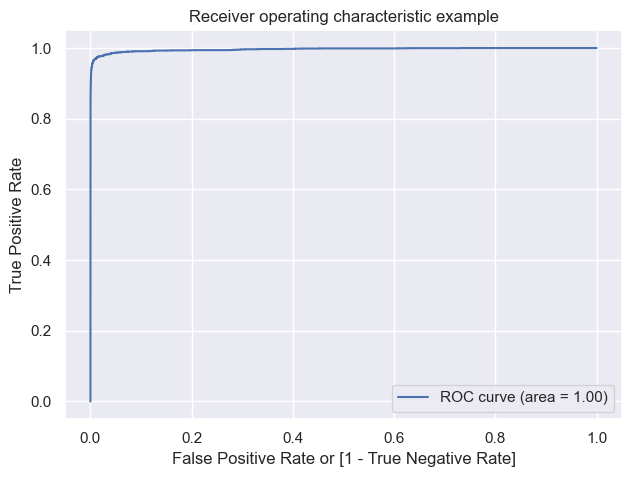


 Confussion Matrix:
 [[552783     41]
 [   658   2237]]


In [258]:
# making predictions on test data

print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_rf_hp_smt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_rf_hp_smt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_rf_hp_smt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_rf_hp_smt)))
pred_probs_test = rf_best.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Classification Report:\n', classification_report(y_test, y_test_pred_rf_hp_smt))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_rf_hp_smt))

Insight:

With a ROC value of 99.6%, our model seems to be performing excellent on test dataset

In [259]:
#observing confusion metrics

confusion_rf_hp_smt = confusion_matrix( y_test, y_test_pred_rf_hp_smt)

TN = confusion_rf_hp_smt[0,0] # true negatives 
TP = confusion_rf_hp_smt[1,1] # true positives
FP = confusion_rf_hp_smt[0,1] # false positives
FN = confusion_rf_hp_smt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  77.3%
Specificity:  100.0%
False postive rate: 0.0%
Positive predictive value: 98.2%
Negative predictive value: 99.9%


In [260]:
#determining the important features from the model

imp_df = pd.DataFrame({
    "Varname": X_resampled_smt.columns,
    "Imp": rf_best.feature_importances_
})
imp_feat= imp_df.sort_values(by="Imp", ascending=False)
imp_feat.head(10)

Varname       Imp
1                           amt  0.316795
17       hist_trans_avg_amt_24h  0.220843
10                   trans_Hour  0.071609
16       hist_trans_avg_amt_30d  0.052257
12  time_since_prev_transaction  0.039412
21             catg_grocery_pos  0.035212
14               hist_trans_30d  0.029872
9                           age  0.026525
15               hist_trans_24h  0.019982
7                      city_pop  0.014413

based on our random forest model ,The above mentioned features would help us determine fraudulant transactions

8.4 Model 4: Xgboost

8.4.1 Using Xgboost (Default Hyperparameters) for SMOTE data

In [261]:
# fit model on training data with default hyperparameters
model_xgb = XGBClassifier(random_state=100)

# Fitting the model on Train SMOTE data 
model_xgb.fit(X_resampled_smt, y_resampled_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [262]:
# calculating y_predicted and y_test predicted


y_train_pred_xgb = model_xgb.predict(X_resampled_smt)
y_test_pred_xgb = model_xgb.predict(X_test)

In [263]:
# printing classification report

print(classification_report(y_resampled_smt, y_train_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



Accuracy:  99.8%
F1 score:  86.0%
Recall:  90.8%
Precision:  81.6%
ROC for the test dataset: 99.7%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.82      0.91      0.86      2895

    accuracy                           1.00    555719
   macro avg       0.91      0.95      0.93    555719
weighted avg       1.00      1.00      1.00    555719



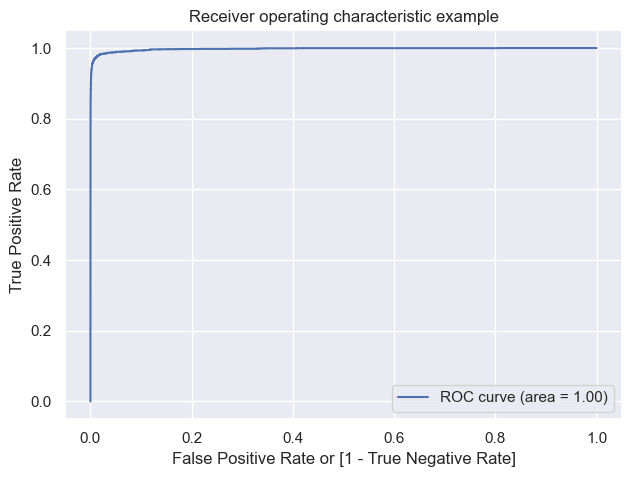


 Confussion Matrix:
 [[552232    592]
 [   267   2628]]


In [264]:
# Making predictions on the test set

print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_xgb)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_xgb)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_xgb)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_xgb)))
pred_probs_test = model_xgb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Classification Report:\n', classification_report(y_test, y_test_pred_xgb))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_xgb))

In [265]:
# Confusing metrics for the model

confusion_xgb = confusion_matrix( y_test, y_test_pred_xgb)

TN = confusion_xgb[0,0] # true negatives 
TP = confusion_xgb[1,1] # true positives
FP = confusion_xgb[0,1] # false positives
FN = confusion_xgb[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  90.8%
Specificity:  99.9%
False postive rate: 0.1%
Positive predictive value: 81.6%
Negative predictive value: 100.0%



8.4.2 Using Xgboost (Default Hyperparameters) for ADASYN data

In [266]:
# Fitting the model on Train ADASYN data 
model_xgb.fit(X_resampled_ada, y_resampled_ada)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=100, ...)

In [267]:
#calculating y_treain_pred and y_test

y_train_pred_xgb = model_xgb.predict(X_resampled_ada)
y_test_pred_xgb = model_xgb.predict(X_test)

In [268]:
# checking th classification report

print(classification_report(y_resampled_ada, y_train_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1290809

    accuracy                           1.00   2580728
   macro avg       1.00      1.00      1.00   2580728
weighted avg       1.00      1.00      1.00   2580728



Accuracy:  99.8%
F1 score:  84.3%
Recall:  90.8%
Precision:  78.6%
ROC for the test dataset: 99.7%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.79      0.91      0.84      2895

    accuracy                           1.00    555719
   macro avg       0.89      0.95      0.92    555719
weighted avg       1.00      1.00      1.00    555719



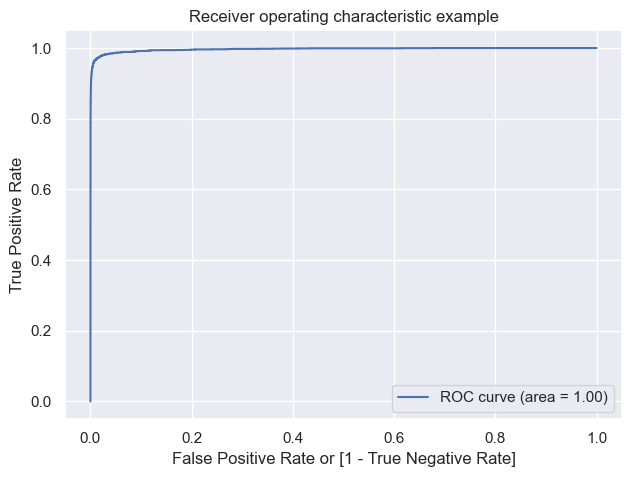


 Confussion Matrix:
 [[552108    716]
 [   266   2629]]


In [269]:
# Making predictions on the test set

print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_xgb)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_xgb)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_xgb)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_xgb)))
pred_probs_test = model_xgb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Classification Report:\n', classification_report(y_test, y_test_pred_xgb))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_xgb))

In [270]:
# checking teh confusion metrics


confusion_xgb = confusion_matrix( y_test, y_test_pred_xgb)

TN = confusion_xgb[0,0] # true negatives 
TP = confusion_xgb[1,1] # true positives
FP = confusion_xgb[0,1] # false positives
FN = confusion_xgb[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  90.8%
Specificity:  99.9%
False postive rate: 0.1%
Positive predictive value: 78.6%
Negative predictive value: 100.0%


### Since we are getting high recall, F1 score and Roc for SMOTE test dataset, so we will do the hyparameter tuning on SMOTE data

tuning the hyperparameters using k-fold CV. We'll then use grid search CV to find the optimal values of hyperparameters.

In [271]:
# using chosen hyperparameters

params = {'learning_rate': 0.2,
          'max_depth': 20, 
          'n_estimators':50,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgboost_best = XGBClassifier(params = params)
xgboost_best.fit(X_resampled_smt, y_resampled_smt)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 20, 'n_estimators': 50,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

In [272]:
# predicting y_train_pred and y_test

y_train_pred_xgb_hp = xgboost_best.predict(X_resampled_smt)
y_test_pred_xgb_hp = xgboost_best.predict(X_test)

In [273]:
# printing classification report

print(classification_report(y_resampled_smt,y_train_pred_xgb_hp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       1.00      1.00      1.00   1289919

    accuracy                           1.00   2579838
   macro avg       1.00      1.00      1.00   2579838
weighted avg       1.00      1.00      1.00   2579838



Accuracy:  99.8%
F1 score:  86.0%
Recall:  90.8%
Precision:  81.6%
ROC for the test dataset: 99.7%

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552824
           1       0.82      0.91      0.86      2895

    accuracy                           1.00    555719
   macro avg       0.91      0.95      0.93    555719
weighted avg       1.00      1.00      1.00    555719



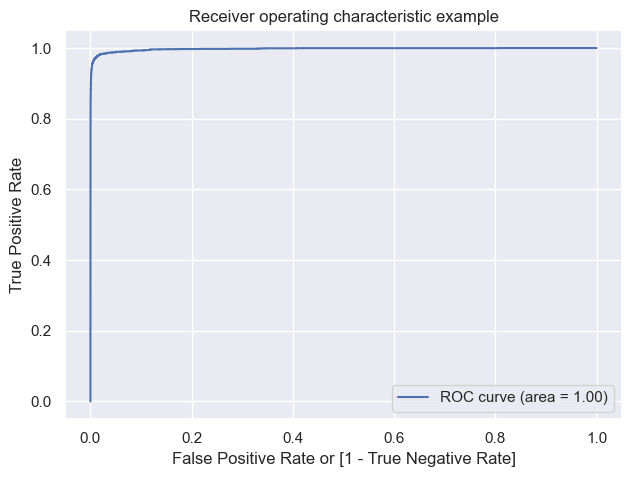


 Confussion Matrix:
 [[552232    592]
 [   267   2628]]


In [274]:
# Making predictions on the test set

print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_xgb_hp)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_xgb_hp)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_xgb_hp)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_xgb_hp)))
pred_probs_test = xgboost_best.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, pred_probs_test)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset:","{:.1%}".format(roc_auc))
print ('\n Classification Report:\n', classification_report(y_test, y_test_pred_xgb_hp))
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc=4)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_xgb_hp))

In [275]:
# checking confusion metrics

confusion_xgb_hp = confusion_matrix( y_test, y_test_pred_xgb_hp)

TN = confusion_xgb_hp[0,0] # true positive 
TP = confusion_xgb_hp[1,1] # true negatives
FP = confusion_xgb_hp[0,1] # false positives
FN = confusion_xgb_hp[1,0] # false negatives


# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  90.8%
Specificity:  99.9%
False postive rate: 0.1%
Positive predictive value: 81.6%
Negative predictive value: 100.0%


INsight:

Since the ROC curve area is 99.7%, we can say that our model is working excellent on test dataset.

In [276]:
# looking for importamt features

imp_df = pd.DataFrame({
    "Varname": X_resampled_smt.columns,
    "Imp": xgboost_best.feature_importances_
})

imp_feat_xgboost= imp_df.sort_values(by="Imp", ascending=False)
imp_feat_xgboost.head(15)

Varname       Imp
17  hist_trans_avg_amt_24h  0.179100
35        weekday_Thursday  0.064064
1                      amt  0.048210
23               catg_home  0.047259
36         weekday_Tuesday  0.045237
19      catg_gas_transport  0.043601
29       catg_shopping_pos  0.039834
21        catg_grocery_pos  0.038106
26           catg_misc_pos  0.032866
28       catg_shopping_net  0.031916
34          weekday_Sunday  0.031357
24          catg_kids_pets  0.031045
22     catg_health_fitness  0.029818
25           catg_misc_net  0.029636
32          weekday_Monday  0.028812

Conclusion:

The above mentioned features in the model would help to predict the fraudulant transactions.

Compilation of models For Test data

In [ ]:
1. Classification Report from Logistic regressiion (default Hyperparameter) on Test data

     precision(%)  |  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative 
Positive predictive|(sensitivity)|            |            |          |              |  rate (%)    | predictive 
       value(%)    |             |            |            |          |              |              | value(%)
-------------------|-------------|------------|------------|----------|--------------|--------------|------------- 
SMOTE data =>  9.3%|    87.1 %   |   16.8%    |   95.5%    |  95.8%   |   87.1%      |     4.5%     |   99.9%
-------------------|-------------|------------|------------|----------|--------------|--------------|-------------


In [ ]:
2. Classification Report from Decision Tree (Hyperparameter Tunning) on SMOTE Test data

     precision(%)  |  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative 
Positive predictive|(sensitivity)|            |            |          |              |  rate (%)    | predictive 
       value(%)    |             |            |            |          |              |              | value(%)
-------------------|-------------|------------|------------|----------|--------------|--------------|------------- 
SMOTE data   87.1  |    85.7     |   86.4     |   99.9     |    89.5  |   99.3       |     0.1      |  99.9    

In [ ]:
3. Classification Report from Random Forest(Hyperparameter Tunning) on SMOTE Test data

     precision(%)  |  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative 
Positive predictive|(sensitivity)|            |            |          |              |  rate (%)    | predictive 
       value(%)    |             |            |            |          |              |              | value(%)
-------------------|-------------|------------|------------|----------|--------------|--------------|-------------
SMOTE data   98.2  |    77.3     |   86.5     |   99.9     |    99.6  |   99.8       |      0.2     |  99.9

In [ ]:
4. Classification Report from XGBOOST (Hyperparameter Tunning) on SMOTE Test data

     precision(%)  |  recall(%)  | f1-score(%)| Accuracy(%)| ROC(%)   |Specificity(%)|False postive | Negative 
Positive predictive|(sensitivity)|            |            |          |              |  rate (%)    | predictive 
       value(%)    |             |            |            |          |              |              | value(%)
-------------------|-------------|------------|------------|----------|--------------|--------------|-------------
SMOTE data   81.6  |    90.8     |   86.0     |   99.8     |    99.7  |   99.9       |       0.1    |  100.0       

Model Consideration:-

1. We Would consider XGBOOST (Hyperparameter Tuning) for SMOTE data as our final model, based on the accuracy, ROC, precision and recall of different models.
2. The test accuracy is 99.8%, recall is 90.8% and ROC is 99.7% .
3. This model has the highest recall for fraudulent transaction- 90.8%. Since our buisness objective is more important to identify fraudulent transaction than the non-fraudulent transaction accurately. High recall means model will correctly identify almost all fraudulent transaction.
   
Hence XGBOOST (Hyperparameter Tuning) model for SMOTE data is chosen based on its performance on Recall metric.

COST BENEFIT ANAlYSIS (PART 2)

For Test Data

In [278]:
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_xgb_hp))


 Confussion Matrix:
 [[552232    592]
 [   267   2628]]


In [279]:
# confusion metrics

confusion_xgb_hp = confusion_matrix( y_test, y_test_pred_xgb_hp)

TN = confusion_xgb_hp[0,0] # true negatives 
TP = confusion_xgb_hp[1,1] # true positives
FP = confusion_xgb_hp[0,1] # false positives
FN = confusion_xgb_hp[1,0] # false negatives

print('True_Negatives:', TN)
print('True_Positives:', TP)
print('False_Positives:', FP)
print('False_Negatives:', FN)

True_Negatives: 552232
True_Positives: 2628
False_Positives: 592
False_Negatives: 267


For Train Data

In [280]:
# finding predicted train value using teh final xgboost model

pred_train = xgboost_best.predict(X_train)

print('\n Confussion Matrix:\n', confusion_matrix(y_train, pred_train))
print(classification_report(y_train, pred_train))


 Confussion Matrix:
 [[1288892    1027]
 [    245    6511]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289919
           1       0.86      0.96      0.91      6756

    accuracy                           1.00   1296675
   macro avg       0.93      0.98      0.96   1296675
weighted avg       1.00      1.00      1.00   1296675



In [281]:
train_confusion_xgb_hp= confusion_matrix(y_train, pred_train)

TN = train_confusion_xgb_hp[0,0] # true negatives 
TP = train_confusion_xgb_hp[1,1] # true positives
FP = train_confusion_xgb_hp[0,1] # false positives
FN = train_confusion_xgb_hp[1,0] # false negatives

print('True_Negatives for train data:', TN)
print('True_Positives for train data:', TP)
print('False_Positives for train data:', FP)
print('False_Negatives for train data:', FN)

True_Negatives for train data: 1288892
True_Positives for train data: 6511
False_Positives for train data: 1027
False_Negatives for train data: 245


In [282]:
# Average number of transactions per month detected as fraudulent by the model (TF)= TP+FP/24

(2628+592+6511+1027)/24

448.25

In [283]:
# Total cost of providing customer support per month for fraudulent transactions detected by the model(TF*$1.5)

448.25*1.5

672.375

In [284]:
# Average number of transactions per month that are fraudulent but not detected by the model (FN)

(267+245)/24

21.333333333333332

In [285]:
# Cost incurred due to fraudulent transactions left undetected by the model (FN*c). c=530.661412288881

21.33*530.661412288881

11319.007924121832

In [286]:
# Cost incurred per month after the model is built and deployed (4+6) 

672.375+11319.007924121832

11991.382924121832

In [287]:
# Cost incurred per month before the model was deployed (b*c)

402.125*530.661412288881

213392.22041666627

In [288]:
# Final savings = Cost incurred before - Cost incurred after(1-7)	204161.28
213392.22041666627-11991.382924121832

201400.83749254444

In [290]:
# Average number of transactions per month detected as fraudulent by the model (TF)
print("1)Average number of transactions per month detected as fraudulent by the model (TF)---------------------------:",(2628+592+6511+1027)/24)
print("-------------------------------------------------------------------------------------------------------------------------------")
# Total cost of providing customer support per month for fraudulent transactions detected by the model(TF*$1.5)
print("2)Total cost of providing customer support per month for fraudulent transactions detected by the model(TF*$1.5):",448.25*1.5)
print("-------------------------------------------------------------------------------------------------------------------------------")
# Average number of transactions per month that are fraudulent but not detected by the model (FN)
print("3)Average number of transactions per month that are fraudulent but not detected by the model (FN)-------------:",(267+245)/24)
print("-------------------------------------------------------------------------------------------------------------------------------")
# Cost incurred due to fraudulent transactions left undetected by the model (FN*c). c=530.661412288881
print("4)Cost incurred due to fraudulent transactions left undetected by the model (FN*c)----------------------------:",21.33*530.661412288881)
print("-------------------------------------------------------------------------------------------------------------------------------")
# Cost incurred per month after the model is built and deployed (2+4) 2= 672.375, 4= 11319.007924121832
print("5)Cost incurred per month after the model is built and deployed (2+4) ----------------------------------------:",672.375+11319.007924121832)
print("-------------------------------------------------------------------------------------------------------------------------------")
# Final savings = Cost incurred before - Cost incurred after(1-7) 1= 213392.2204, 7=11991.382924121832
print("6)Final savings = Cost incurred before - Cost incurred after(1-5)---------------------------------------------:",213392.22041666627-11991.382924121832)

1)Average number of transactions per month detected as fraudulent by the model (TF)---------------------------: 448.25
-------------------------------------------------------------------------------------------------------------------------------
2)Total cost of providing customer support per month for fraudulent transactions detected by the model(TF*$1.5): 672.375
-------------------------------------------------------------------------------------------------------------------------------
3)Average number of transactions per month that are fraudulent but not detected by the model (FN)-------------: 21.333333333333332
-------------------------------------------------------------------------------------------------------------------------------
4)Cost incurred due to fraudulent transactions left undetected by the model (FN*c)----------------------------: 11319.007924121832
------------------------------------------------------------------------------------------------------------------